In [115]:
import pandas as pd
import numpy as np

In [116]:
ev_features_df = pd.read_csv('ElectricCarData_Norm.csv')

In [117]:
ev_features_df.head()

Brand                          Model     Accel  TopSpeed   Range  \
0       Tesla   Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1  Volkswagen                       ID.3 Pure  10.0 sec  160 km/h  270 km   
2    Polestar                               2   4.7 sec  210 km/h  400 km   
3         BMW                            iX3    6.8 sec  180 km/h  360 km   
4       Honda                              e    9.5 sec  145 km/h  170 km   

  Efficiency FastCharge              RapidCharge        PowerTrain  \
0  161 Wh/km   940 km/h  Rapid charging possible   All Wheel Drive   
1  167 Wh/km   250 km/h  Rapid charging possible  Rear Wheel Drive   
2  181 Wh/km   620 km/h  Rapid charging possible   All Wheel Drive   
3  206 Wh/km   560 km/h  Rapid charging possible  Rear Wheel Drive   
4  168 Wh/km   190 km/h  Rapid charging possible  Rear Wheel Drive   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C      5      30000  
2  Type 2 CCS   Liftback       D      5      56440  
3  Type 2 CCS        SUV       D      5      68040  
4  Type 2 CCS  Hatchback       B      4      32997

In [118]:
# Display basic information about the dataset
ev_features_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [119]:
# Check for missing values
ev_features_df.isnull().sum()


Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [120]:
missing_values = ev_features_df.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Series([], dtype: int64)


In [121]:
duplicate_rows = ev_features_df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


# Encoding the features

In [122]:
# Extract numerical component from "Range" feature
ev_features_df['Range_numerical'] = ev_features_df['Range'].str.extract(r'(\d+\.?\d*)').astype(float)

# Drop the original "Range" column
ev_features_df.drop(columns=['Range'], inplace=True)

# Display the updated DataFrame
ev_features_df.head()


Brand                          Model     Accel  TopSpeed Efficiency  \
0       Tesla   Model 3 Long Range Dual Motor   4.6 sec  233 km/h  161 Wh/km   
1  Volkswagen                       ID.3 Pure  10.0 sec  160 km/h  167 Wh/km   
2    Polestar                               2   4.7 sec  210 km/h  181 Wh/km   
3         BMW                            iX3    6.8 sec  180 km/h  206 Wh/km   
4       Honda                              e    9.5 sec  145 km/h  168 Wh/km   

  FastCharge              RapidCharge        PowerTrain    PlugType  \
0   940 km/h  Rapid charging possible   All Wheel Drive  Type 2 CCS   
1   250 km/h  Rapid charging possible  Rear Wheel Drive  Type 2 CCS   
2   620 km/h  Rapid charging possible   All Wheel Drive  Type 2 CCS   
3   560 km/h  Rapid charging possible  Rear Wheel Drive  Type 2 CCS   
4   190 km/h  Rapid charging possible  Rear Wheel Drive  Type 2 CCS   

   BodyStyle Segment  Seats  PriceEuro  Range_numerical  
0      Sedan       D      5      55480            450.0  
1  Hatchback       C      5      30000            270.0  
2   Liftback       D      5      56440            400.0  
3        SUV       D      5      68040            360.0  
4  Hatchback       B      4      32997            170.0

In [123]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the "Brand" feature
ev_features_df['Brand_encoded'] = label_encoder.fit_transform(ev_features_df['Brand'])

# Display the encoded DataFrame
print(ev_features_df[['Brand', 'Brand_encoded']].head())


         Brand  Brand_encoded
0       Tesla              30
1  Volkswagen              31
2    Polestar              23
3         BMW               2
4       Honda               9


In [124]:

from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Convert the "Model" feature to string data type
ev_features_df['Model'] = ev_features_df['Model'].astype(str)

# Encode the "Model" feature
ev_features_df['Model_encoded'] = label_encoder.fit_transform(ev_features_df['Model'])

# Display the mapping between original values and encoded labels
print("Mapping between Original Values and Encoded Labels:")
for original_value, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{original_value}: {encoded_label}")


Mapping between Original Values and Encoded Labels:
2: 0
3 Crossback E-Tense: 1
500e Convertible: 2
500e Hatchback: 3
Air : 4
Ampera-e : 5
Ariya 63kWh: 6
Ariya 87kWh: 7
Ariya e-4ORCE 63kWh: 8
Ariya e-4ORCE 87kWh: 9
Ariya e-4ORCE 87kWh Performance: 10
CITIGOe iV : 11
Cooper SE : 12
Corsa-e : 13
Cybertruck Dual Motor: 14
Cybertruck Single Motor: 15
Cybertruck Tri Motor: 16
EQ forfour : 17
EQ fortwo cabrio: 18
EQ fortwo coupe: 19
EQA : 20
EQC 400 4MATIC: 21
EQV 300 Long: 22
Enyaq iV 50: 23
Enyaq iV 60: 24
Enyaq iV 80: 25
Enyaq iV 80X: 26
Enyaq iV vRS: 27
I-Pace : 28
ID.3 1st: 29
ID.3 Pro: 30
ID.3 Pro Performance: 31
ID.3 Pro S: 32
ID.3 Pure: 33
ID.4 : 34
IONIQ Electric: 35
Kangoo Maxi ZE 33: 36
Kona Electric 39 kWh: 37
Kona Electric 64 kWh: 38
Leaf : 39
Leaf e+: 40
M-Byte 72 kWh 2WD: 41
M-Byte 95 kWh 2WD: 42
M-Byte 95 kWh 4WD: 43
MX-30 : 44
Mii Electric : 45
Model 3 Long Range Dual Motor: 46
Model 3 Long Range Performance: 47
Model 3 Standard Range Plus: 48
Model S Long Range: 49
Model S 

In [125]:
from sklearn.preprocessing import LabelEncoder

# Extract numerical values from "TopSpeed" feature
ev_features_df['TopSpeed_numerical'] = ev_features_df['TopSpeed'].str.extract('(\d+)').astype(float)
# Drop the original "Range" column
ev_features_df.drop(columns=['TopSpeed'], inplace=True)

# Display the updated DataFrame
ev_features_df.head()





Brand                          Model     Accel Efficiency FastCharge  \
0       Tesla   Model 3 Long Range Dual Motor   4.6 sec  161 Wh/km   940 km/h   
1  Volkswagen                       ID.3 Pure  10.0 sec  167 Wh/km   250 km/h   
2    Polestar                               2   4.7 sec  181 Wh/km   620 km/h   
3         BMW                            iX3    6.8 sec  206 Wh/km   560 km/h   
4       Honda                              e    9.5 sec  168 Wh/km   190 km/h   

               RapidCharge        PowerTrain    PlugType  BodyStyle Segment  \
0  Rapid charging possible   All Wheel Drive  Type 2 CCS      Sedan       D   
1  Rapid charging possible  Rear Wheel Drive  Type 2 CCS  Hatchback       C   
2  Rapid charging possible   All Wheel Drive  Type 2 CCS   Liftback       D   
3  Rapid charging possible  Rear Wheel Drive  Type 2 CCS        SUV       D   
4  Rapid charging possible  Rear Wheel Drive  Type 2 CCS  Hatchback       B   

   Seats  PriceEuro  Range_numerical  Brand_encoded  Model_encoded  \
0      5      55480            450.0             30             46   
1      5      30000            270.0             31             33   
2      5      56440            400.0             23              0   
3      5      68040            360.0              2            101   
4      4      32997            170.0              9             78   

   TopSpeed_numerical  
0               233.0  
1               160.0  
2               210.0  
3               180.0  
4               145.0

In [126]:
# Convert "Accel" feature in DataFrame
ev_features_df['Accel'] = ev_features_df['Accel'].str.split().str[0].astype(float)

# Display the DataFrame to verify the conversion
print(ev_features_df['Accel'].head())


0     4.6
1    10.0
2     4.7
3     6.8
4     9.5
Name: Accel, dtype: float64


In [127]:
# Convert "Efficiency" feature in DataFrame
ev_features_df['Efficiency'] = ev_features_df['Efficiency'].str.split().str[0].astype(float)

# Display the DataFrame to verify the conversion
print(ev_features_df['Efficiency'].head())


0    161.0
1    167.0
2    181.0
3    206.0
4    168.0
Name: Efficiency, dtype: float64


In [128]:
import numpy as np

# Replace "-" with NaN
ev_features_df['FastCharge'] = ev_features_df['FastCharge'].replace('-', np.nan)

# Convert "FastCharge" feature in DataFrame to float
ev_features_df['FastCharge'] = ev_features_df['FastCharge'].str.split().str[0].astype(float)

# Display the DataFrame to verify the conversion
print(ev_features_df['FastCharge'].head())


0    940.0
1    250.0
2    620.0
3    560.0
4    190.0
Name: FastCharge, dtype: float64


In [129]:
# Replace values in "RapidCharge" column with binary indicators
ev_features_df['RapidCharge'] = ev_features_df['RapidCharge'].map({'Rapid charging possible': 1, 'Rapid charging not possible': 0})

# Display the DataFrame to verify the modification
print(ev_features_df['RapidCharge'].head())



0    1
1    1
2    1
3    1
4    1
Name: RapidCharge, dtype: int64


In [130]:
# Map values to numerical labels
powertrain_mapping = {'All Wheel Drive': 0, 'Front Wheel Drive': 1, 'Rear Wheel Drive': 2}

# Replace values in "PowerTrain" column with numerical labels
ev_features_df['PowerTrain'] = ev_features_df['PowerTrain'].map(powertrain_mapping)

# Display the DataFrame to verify the modification
print(ev_features_df['PowerTrain'].head())


0    0
1    2
2    0
3    2
4    2
Name: PowerTrain, dtype: int64


In [131]:
import pandas as pd

# Handle NaN values in the "PlugType" column (fill NaN with a placeholder value)
ev_features_df['PlugType'].fillna('Unknown', inplace=True)

# Perform one-hot encoding on the "BodyStyle" feature
ev_features_df = pd.get_dummies(ev_features_df, columns=['BodyStyle'], prefix='BodyStyle')

# Display the updated DataFrame
print(ev_features_df.head())



         Brand                          Model  Accel  Efficiency  FastCharge  \
0       Tesla   Model 3 Long Range Dual Motor    4.6       161.0       940.0   
1  Volkswagen                       ID.3 Pure   10.0       167.0       250.0   
2    Polestar                               2    4.7       181.0       620.0   
3         BMW                            iX3     6.8       206.0       560.0   
4       Honda                              e     9.5       168.0       190.0   

   RapidCharge  PowerTrain    PlugType Segment  Seats  PriceEuro  \
0            1           0  Type 2 CCS       D      5      55480   
1            1           2  Type 2 CCS       C      5      30000   
2            1           0  Type 2 CCS       D      5      56440   
3            1           2  Type 2 CCS       D      5      68040   
4            1           2  Type 2 CCS       B      4      32997   

   Range_numerical  Brand_encoded  Model_encoded  TopSpeed_numerical  \
0            450.0             30     

In [132]:
# Perform one-hot encoding on the "PlugType" feature
ev_features_df = pd.get_dummies(ev_features_df, columns=['PlugType'], prefix='PlugType')

# Display the updated DataFrame
print(ev_features_df.head())


         Brand                          Model  Accel  Efficiency  FastCharge  \
0       Tesla   Model 3 Long Range Dual Motor    4.6       161.0       940.0   
1  Volkswagen                       ID.3 Pure   10.0       167.0       250.0   
2    Polestar                               2    4.7       181.0       620.0   
3         BMW                            iX3     6.8       206.0       560.0   
4       Honda                              e     9.5       168.0       190.0   

   RapidCharge  PowerTrain Segment  Seats  PriceEuro  Range_numerical  \
0            1           0       D      5      55480            450.0   
1            1           2       C      5      30000            270.0   
2            1           0       D      5      56440            400.0   
3            1           2       D      5      68040            360.0   
4            1           2       B      4      32997            170.0   

   Brand_encoded  Model_encoded  TopSpeed_numerical  BodyStyle_Cabrio  \
0      

In [133]:
# Perform one-hot encoding on the "Segment" feature
ev_features_df = pd.get_dummies(ev_features_df, columns=['Segment'], prefix='Segment')

# Display the updated DataFrame
print(ev_features_df.head())


         Brand                          Model  Accel  Efficiency  FastCharge  \
0       Tesla   Model 3 Long Range Dual Motor    4.6       161.0       940.0   
1  Volkswagen                       ID.3 Pure   10.0       167.0       250.0   
2    Polestar                               2    4.7       181.0       620.0   
3         BMW                            iX3     6.8       206.0       560.0   
4       Honda                              e     9.5       168.0       190.0   

   RapidCharge  PowerTrain  Seats  PriceEuro  Range_numerical  Brand_encoded  \
0            1           0      5      55480            450.0             30   
1            1           2      5      30000            270.0             31   
2            1           0      5      56440            400.0             23   
3            1           2      5      68040            360.0              2   
4            1           2      4      32997            170.0              9   

   Model_encoded  TopSpeed_numerical  

In [134]:
ev_features_df.head()

Brand                          Model  Accel  Efficiency  FastCharge  \
0       Tesla   Model 3 Long Range Dual Motor    4.6       161.0       940.0   
1  Volkswagen                       ID.3 Pure   10.0       167.0       250.0   
2    Polestar                               2    4.7       181.0       620.0   
3         BMW                            iX3     6.8       206.0       560.0   
4       Honda                              e     9.5       168.0       190.0   

   RapidCharge  PowerTrain  Seats  PriceEuro  Range_numerical  Brand_encoded  \
0            1           0      5      55480            450.0             30   
1            1           2      5      30000            270.0             31   
2            1           0      5      56440            400.0             23   
3            1           2      5      68040            360.0              2   
4            1           2      4      32997            170.0              9   

   Model_encoded  TopSpeed_numerical  BodyStyle_Cabrio  BodyStyle_Hatchback  \
0             46               233.0             False                False   
1             33               160.0             False                 True   
2              0               210.0             False                False   
3            101               180.0             False                False   
4             78               145.0             False                 True   

   BodyStyle_Liftback  BodyStyle_MPV  BodyStyle_Pickup  BodyStyle_SPV  \
0               False          False             False          False   
1               False          False             False          False   
2                True          False             False          False   
3               False          False             False          False   
4               False          False             False          False   

   BodyStyle_SUV  BodyStyle_Sedan  BodyStyle_Station  PlugType_Type 1 CHAdeMO  \
0          False             True              False                    False   
1          False            False              False                    False   
2          False            False              False                    False   
3           True            False              False                    False   
4          False            False              False                    False   

   PlugType_Type 2  PlugType_Type 2 CCS  PlugType_Type 2 CHAdeMO  Segment_A  \
0            False                 True                    False      False   
1            False                 True                    False      False   
2            False                 True                    False      False   
3            False                 True                    False      False   
4            False                 True                    False      False   

   Segment_B  Segment_C  Segment_D  Segment_E  Segment_F  Segment_N  Segment_S  
0      False      False       True      False      False      False      False  
1      False       True      False      False      False      False      False  
2      False      False       True      False      False      False      False  
3      False      False       True      False      False      False      False  
4       True      False      False      False      False      False      False

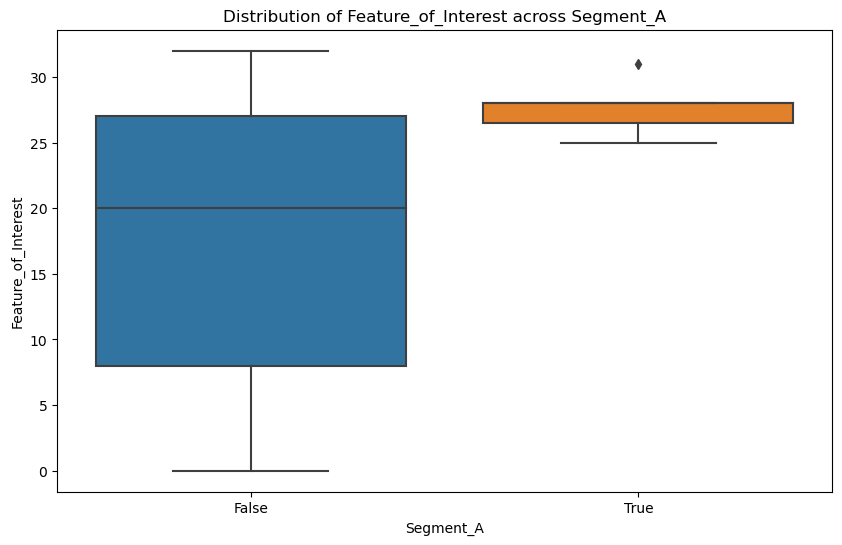

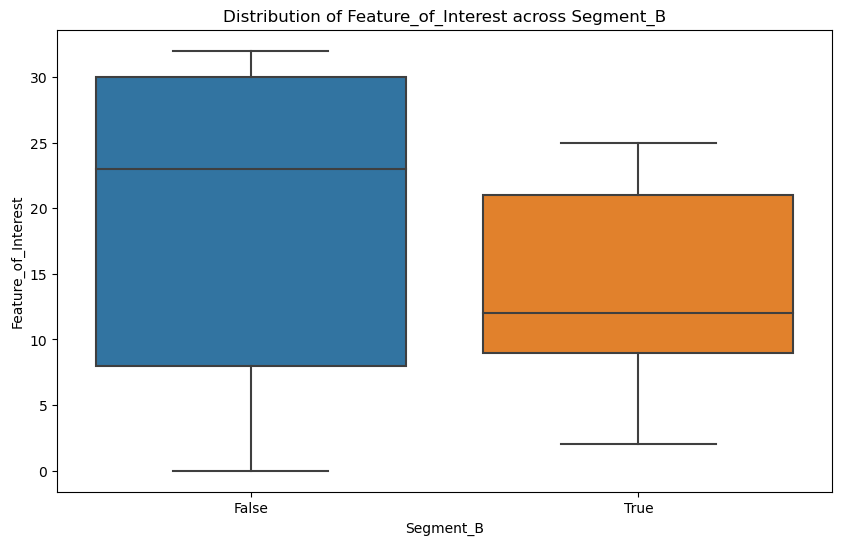

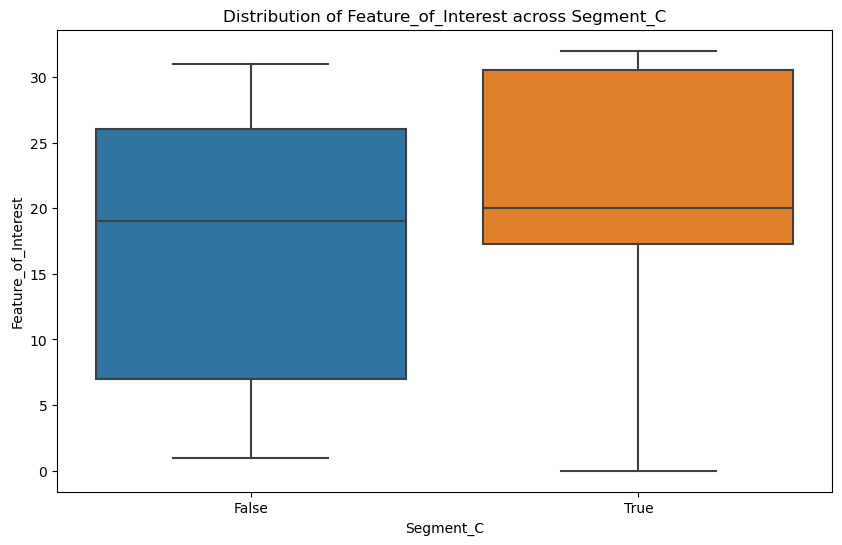

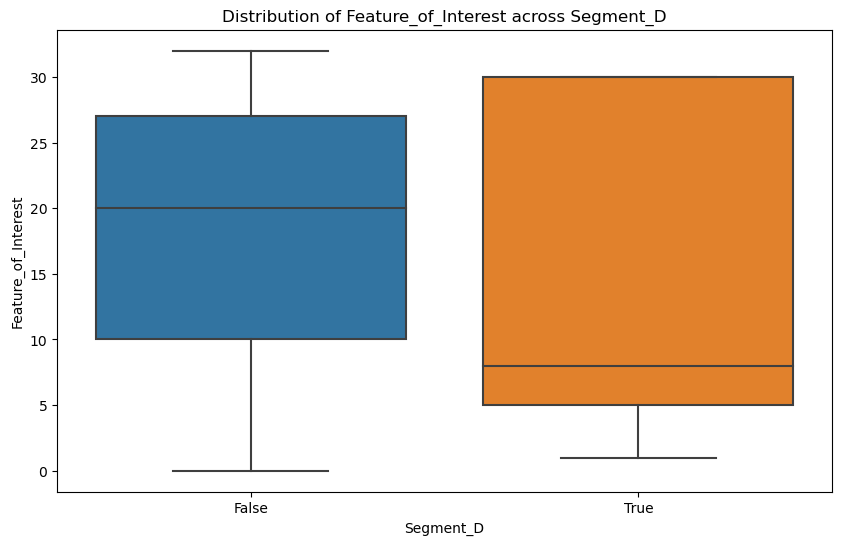

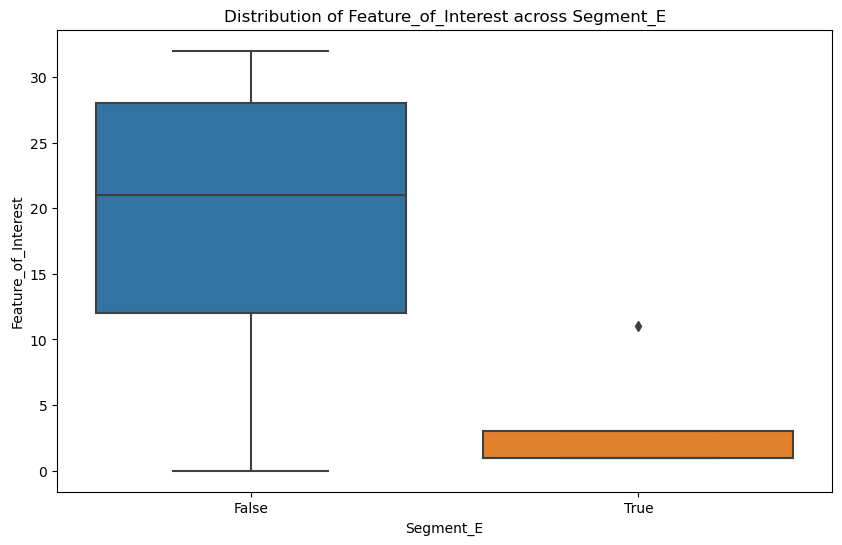

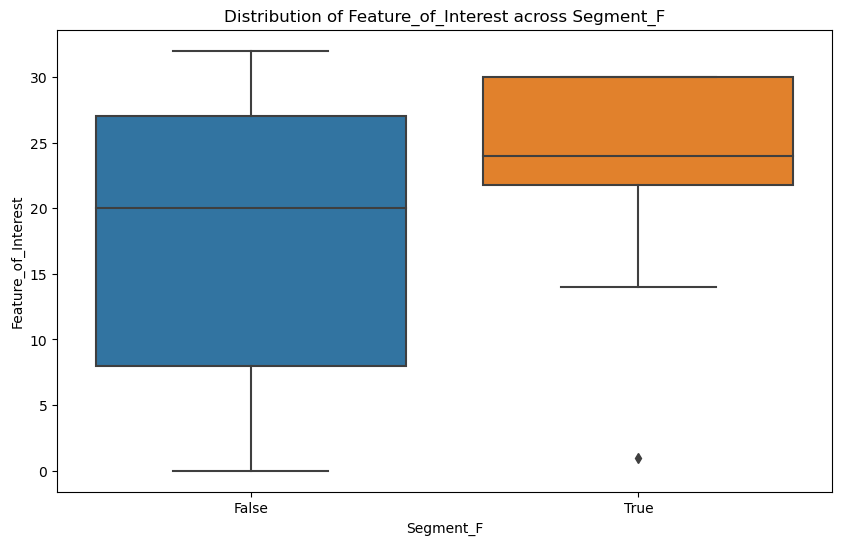

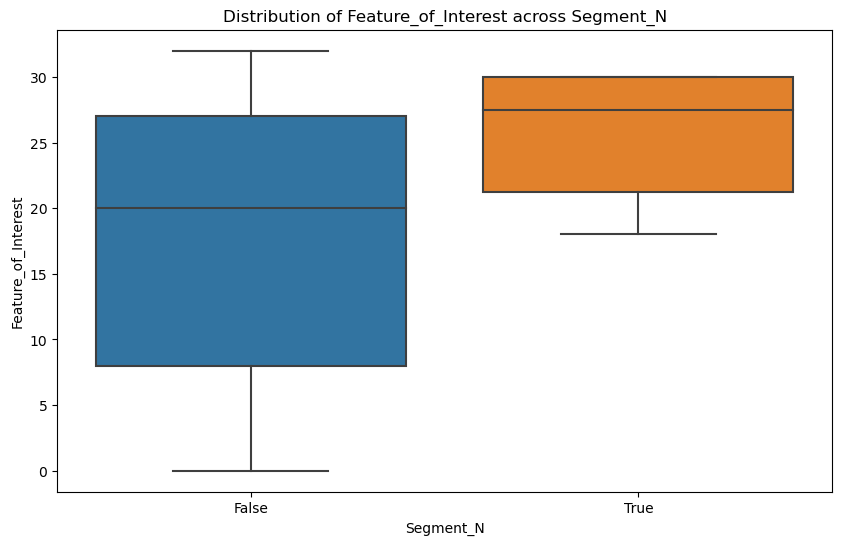

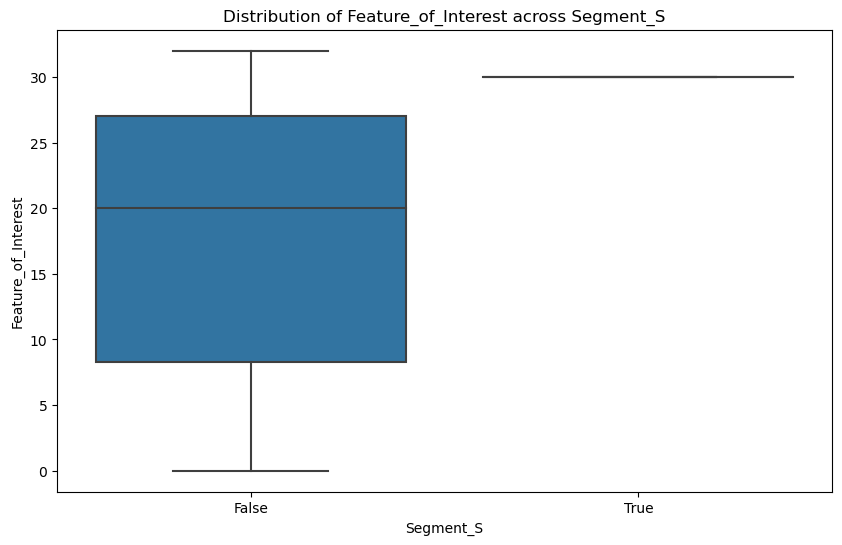

In [135]:
# Select the columns representing the segments
segment_columns = ['Segment_A', 'Segment_B', 'Segment_C', 'Segment_D', 'Segment_E', 'Segment_F', 'Segment_N',"Segment_S"]  # Adjust as per your DataFrame

# Visualize feature distributions within each segment
for column in segment_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=ev_features_df, x=column, y='Brand_encoded')  # Replace 'Feature_of_Interest' with the feature you want to analyze
    plt.title(f'Distribution of Feature_of_Interest across {column}')
    plt.xlabel(column)
    plt.ylabel('Feature_of_Interest')
    plt.show()


In [136]:

# Define the segment columns
segment_columns = [col for col in ev_features_df.columns if 'Segment' in col]

# Define the numerical features for profiling
numerical_features = ['Accel', 'Efficiency', 'FastCharge', 'Seats', 'PriceEuro']

# Profile each segment
for segment in segment_columns:
    print(f"Segment: {segment}")
    segment_data = ev_features_df[ev_features_df[segment] == 1]
    segment_profile = segment_data[numerical_features].describe()
    print(segment_profile)
    print("\n")


Segment: Segment_A
           Accel  Efficiency  FastCharge     Seats     PriceEuro
count   7.000000    7.000000         3.0  7.000000      7.000000
mean   12.185714  168.714286       170.0  3.428571  22693.714286
std     0.401782    5.056820         0.0  0.975900   1898.611573
min    11.600000  164.000000       170.0  2.000000  20129.000000
25%    11.900000  166.000000       170.0  3.000000  21404.000000
50%    12.300000  166.000000       170.0  4.000000  22030.000000
75%    12.450000  171.500000       170.0  4.000000  24549.500000
max    12.700000  176.000000       170.0  4.000000  24790.000000


Segment: Segment_B
           Accel  Efficiency  FastCharge      Seats     PriceEuro
count  22.000000   22.000000   22.000000  22.000000     22.000000
mean    8.659091  168.727273  293.181818   4.681818  34799.227273
std     1.217593    8.848900   77.483415   0.476731   3859.359914
min     6.900000  154.000000  190.000000   4.000000  29146.000000
25%     7.900000  164.000000  230.000000   4.

In [137]:
from sklearn.cluster import KMeans

import warnings

# Suppress FutureWarning and UserWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


# Select features for clustering
X = ev_features_df[['Accel','Efficiency','PriceEuro']]

# Define the number of clusters
num_clusters = 5

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_




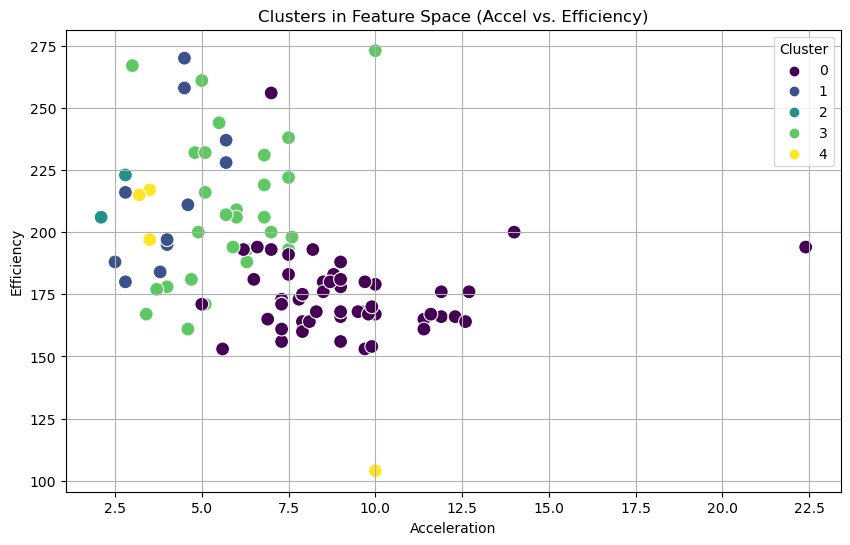

Cluster Characteristics:
      Accel  Efficiency      PriceEuro  Cluster
0  9.124138  174.034483   35120.706897        1
1  4.081818  214.909091   94012.818182        2
2  2.450000  214.500000  197890.500000        3
3  5.807143  209.428571   61048.821429        4
4  5.050000  183.250000  143075.250000        5


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add cluster labels to the DataFrame
ev_features_df['Cluster'] = cluster_labels

# Visualize clusters in 2D feature space (Accel vs. Efficiency)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ev_features_df, x='Accel', y='Efficiency', hue='Cluster', palette='viridis', s=100)
plt.title('Clusters in Feature Space (Accel vs. Efficiency)')
plt.xlabel('Acceleration')
plt.ylabel('Efficiency')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Analyze cluster characteristics
cluster_centers = kmeans.cluster_centers_
cluster_characteristics = pd.DataFrame(cluster_centers, columns=['Accel', 'Efficiency', 'PriceEuro'])
cluster_characteristics['Cluster'] = range(1, num_clusters+1)

# Display cluster characteristics
print("Cluster Characteristics:")
print(cluster_characteristics)


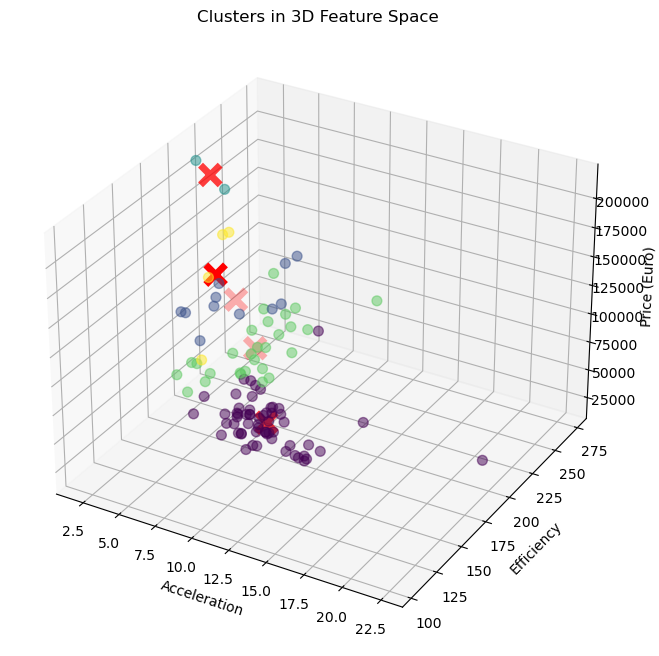

In [139]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize clusters in 3D space
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points colored by cluster labels
ax.scatter(X['Accel'], X['Efficiency'], X['PriceEuro'], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

# Plot centroids of clusters
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=200, linewidths=5, color='r')

ax.set_xlabel('Acceleration')
ax.set_ylabel('Efficiency')
ax.set_zlabel('Price (Euro)')

plt.title('Clusters in 3D Feature Space')
plt.show()



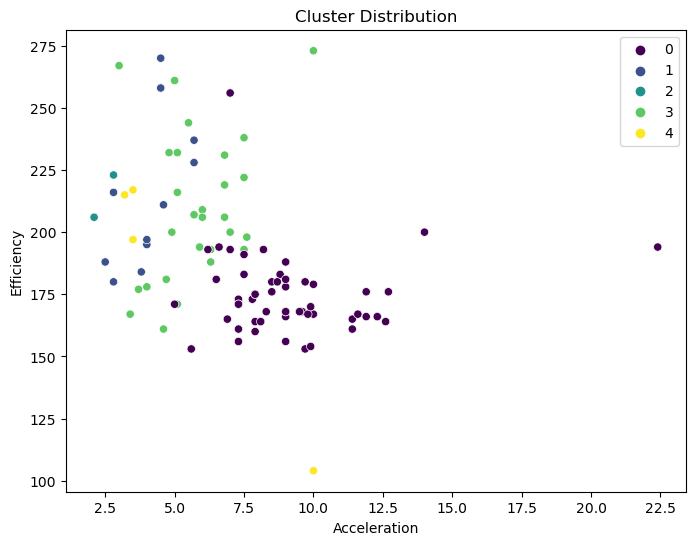

<Figure size 1000x800 with 0 Axes>

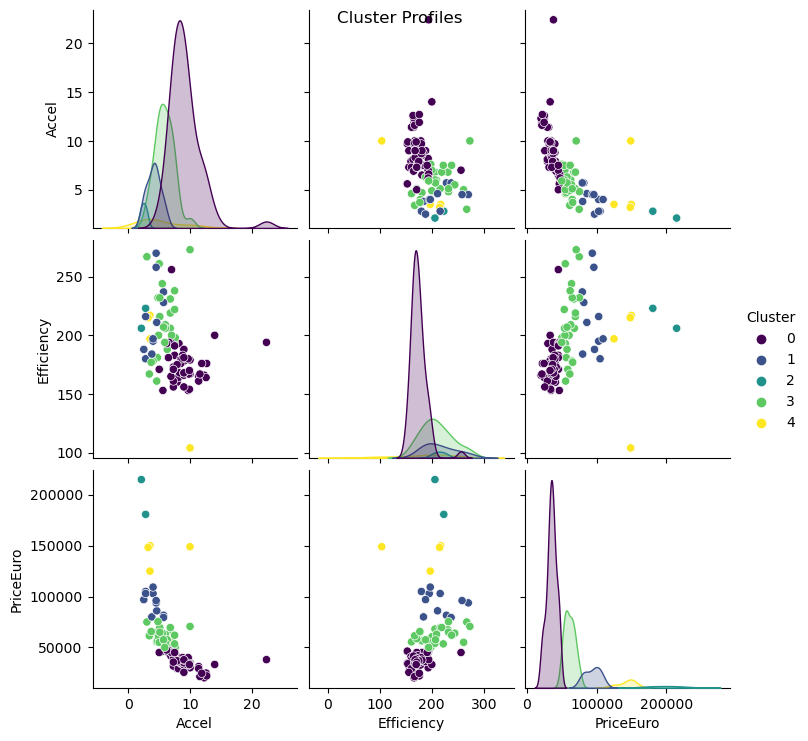

Cluster Centroids:
      Accel  Efficiency      PriceEuro  Cluster
0  9.124138  174.034483   35120.706897        1
1  4.081818  214.909091   94012.818182        2
2  2.450000  214.500000  197890.500000        3
3  5.807143  209.428571   61048.821429        4
4  5.050000  183.250000  143075.250000        5
Insights:
Cluster 1: Size=58
Cluster 2: Size=11
Cluster 3: Size=2
Cluster 4: Size=28
Cluster 5: Size=4
Silhouette Score: 0.6264802890351127


In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Cluster Distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(data=X, x='Accel', y='Efficiency', hue=cluster_labels, palette='viridis', legend='full')
plt.title('Cluster Distribution')
plt.xlabel('Acceleration')
plt.ylabel('Efficiency')
plt.show()

# Visualize Cluster Profiles
cluster_data = pd.concat([X, pd.Series(cluster_labels, name='Cluster')], axis=1)
plt.figure(figsize=(10, 8))
sns.pairplot(data=cluster_data, hue='Cluster', palette='viridis')
plt.suptitle('Cluster Profiles')
plt.show()

# Analyze Cluster Centroids
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['Accel', 'Efficiency', 'PriceEuro'])
cluster_centroids['Cluster'] = range(1, num_clusters+1)
print("Cluster Centroids:")
print(cluster_centroids)

# Generate Insights
print("Insights:")
for i in range(num_clusters):
    cluster_size = (cluster_labels == i).sum()
    print(f"Cluster {i+1}: Size={cluster_size}")

# Validate Clustering Solution (Optional)
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Cluster Centroids:
      Accel  Efficiency      PriceEuro  Cluster
0  9.124138  174.034483   35120.706897        1
1  4.081818  214.909091   94012.818182        2
2  2.450000  214.500000  197890.500000        3
3  5.807143  209.428571   61048.821429        4
4  5.050000  183.250000  143075.250000        5


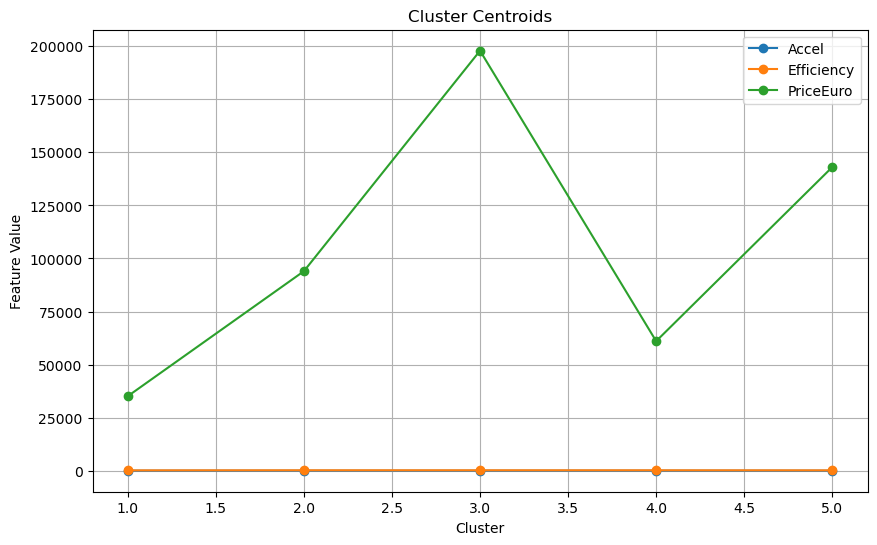

In [141]:
# Retrieve the cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Create a DataFrame to store the centroid values
centroid_df = pd.DataFrame(cluster_centroids, columns=X.columns)

# Add a column for cluster labels
centroid_df['Cluster'] = range(1, num_clusters + 1)

# Display the centroid values
print("Cluster Centroids:")
print(centroid_df)

# Visualize the centroid values
plt.figure(figsize=(10, 6))
for feature in X.columns:
    plt.plot(centroid_df['Cluster'], centroid_df[feature], marker='o', label=feature)
plt.title("Cluster Centroids")
plt.xlabel("Cluster")
plt.ylabel("Feature Value")
plt.legend()
plt.grid(True)
plt.show()


Cluster 1:
           Accel  Efficiency  FastCharge  RapidCharge  PowerTrain      Seats  \
count  58.000000   58.000000   53.000000    58.000000   58.000000  58.000000   
mean    9.124138  174.034483  346.792453     0.913793    1.310345   4.706897   
std     2.601707   15.608101  139.515282     0.283121    0.568374   0.749470   
min     5.000000  153.000000  170.000000     0.000000    0.000000   2.000000   
25%     7.500000  166.000000  230.000000     1.000000    1.000000   4.000000   
50%     8.750000  171.000000  330.000000     1.000000    1.000000   5.000000   
75%     9.875000  180.000000  440.000000     1.000000    2.000000   5.000000   
max    22.400000  256.000000  740.000000     1.000000    2.000000   7.000000   

          PriceEuro  Range_numerical  Brand_encoded  Model_encoded  \
count     58.000000        58.000000      58.000000      58.000000   
mean   35120.706897       274.741379      19.655172      48.672414   
std     6915.261048        88.488390       9.365018      3

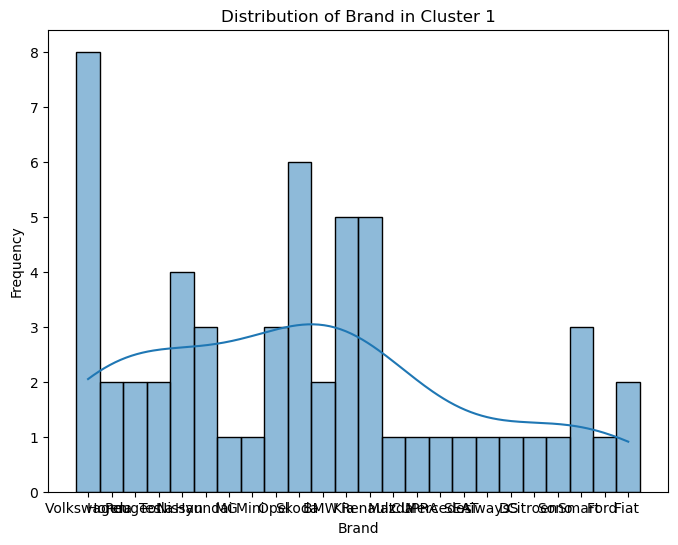

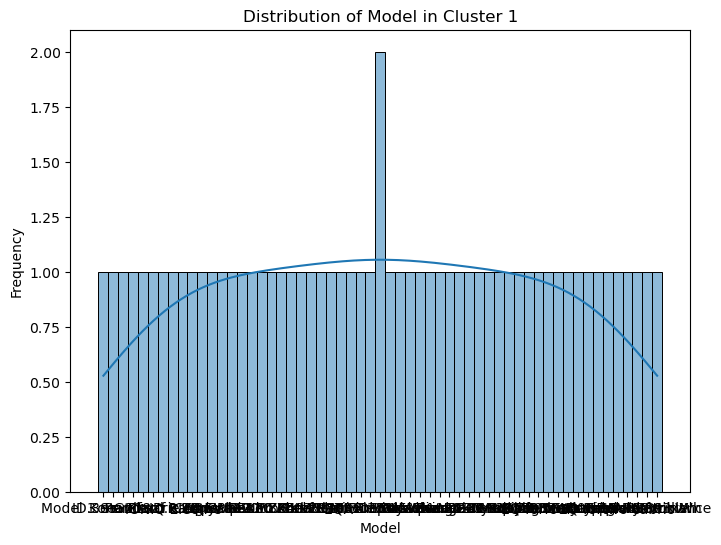

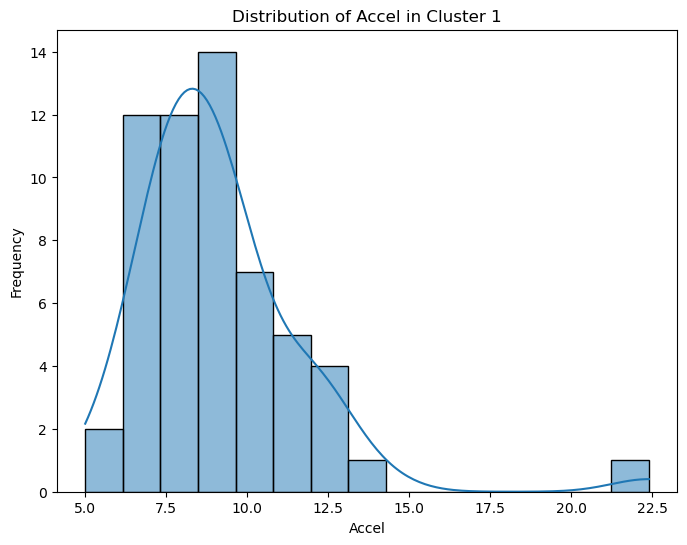

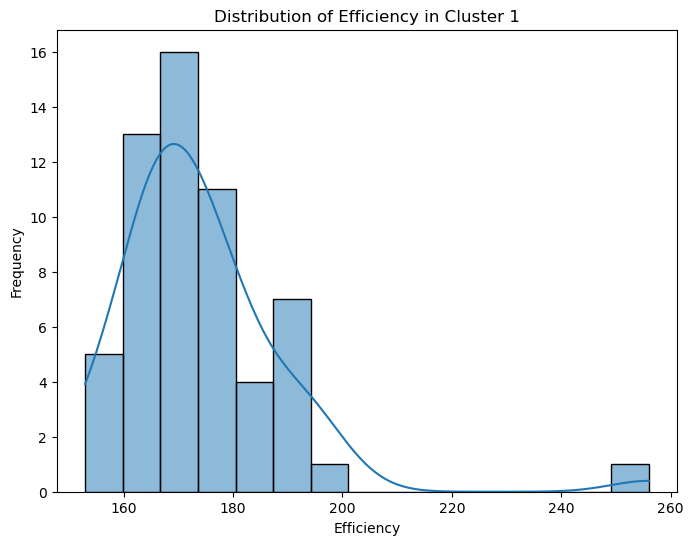

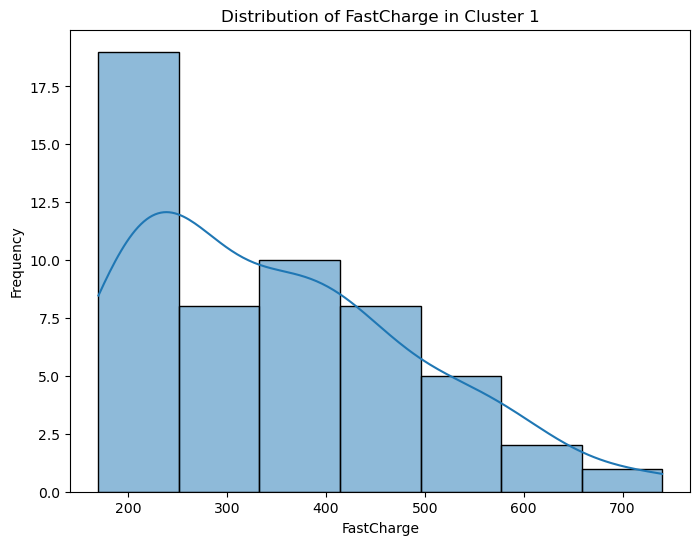

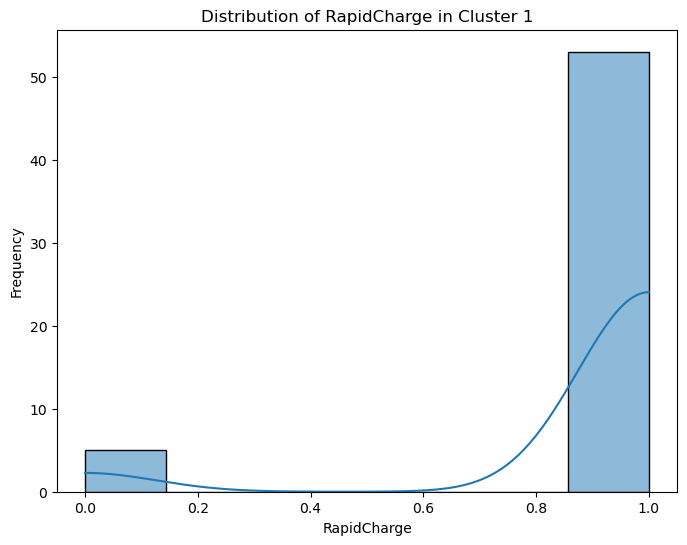

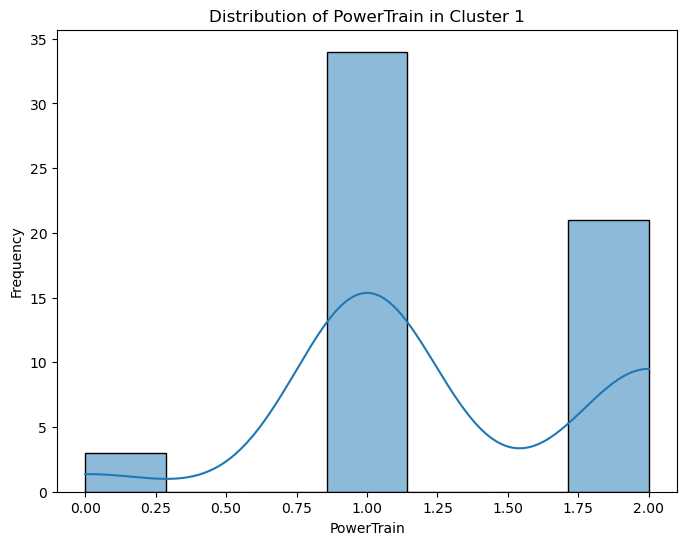

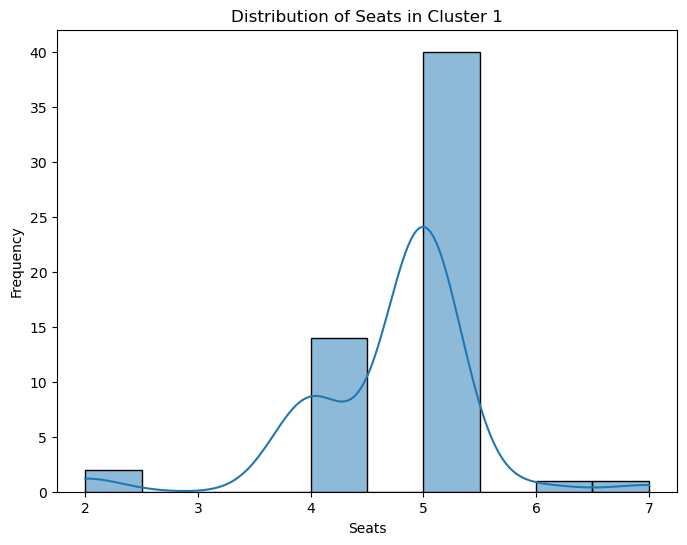

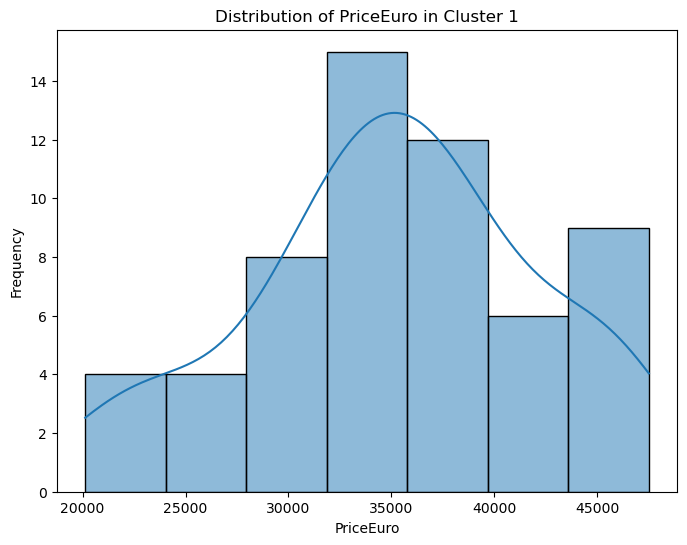

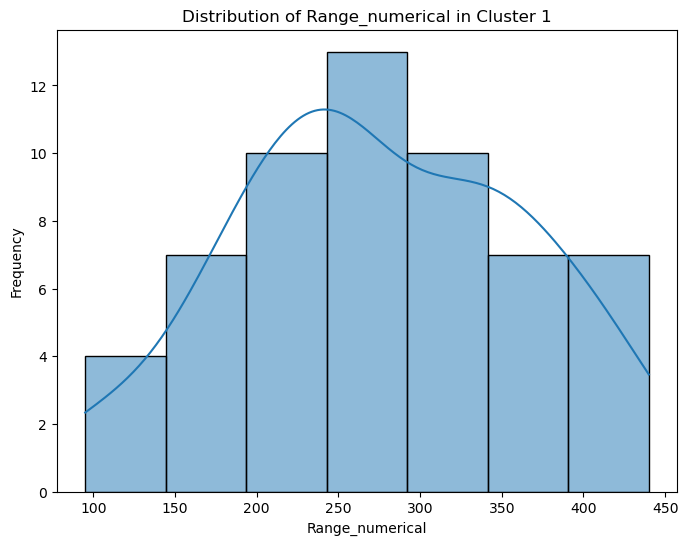

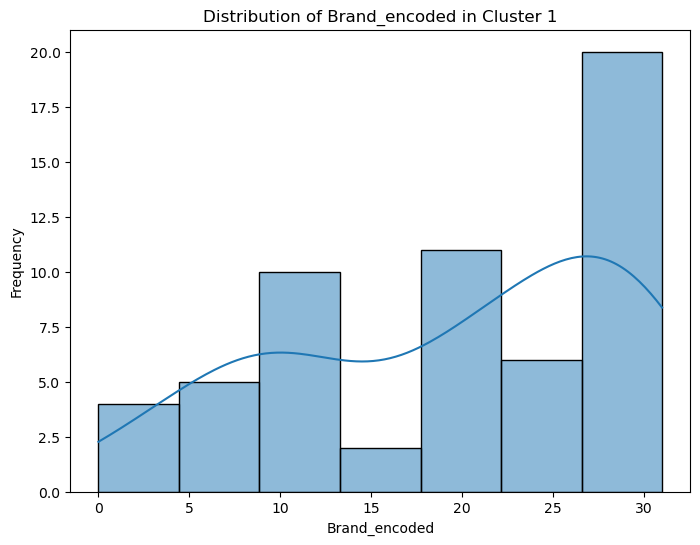

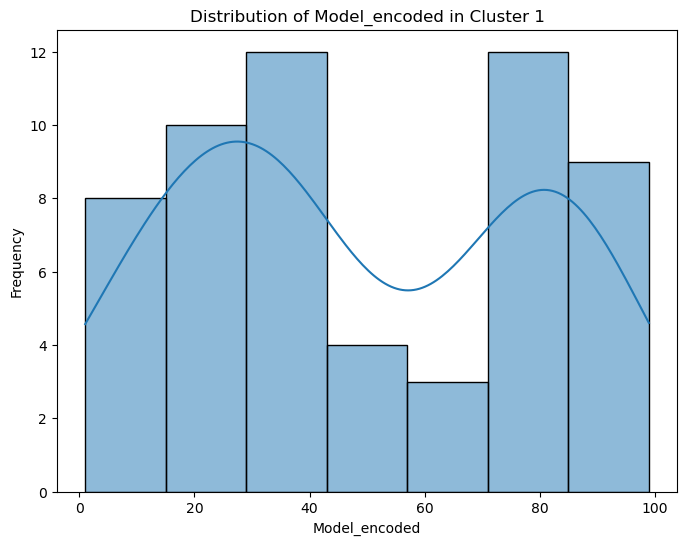

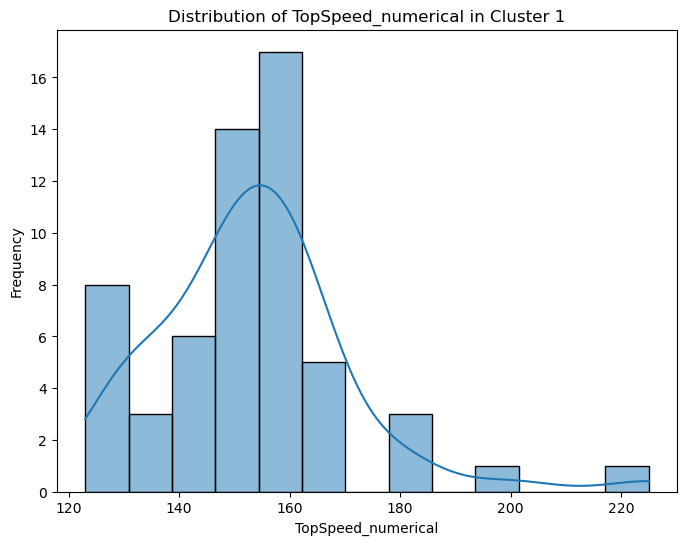

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


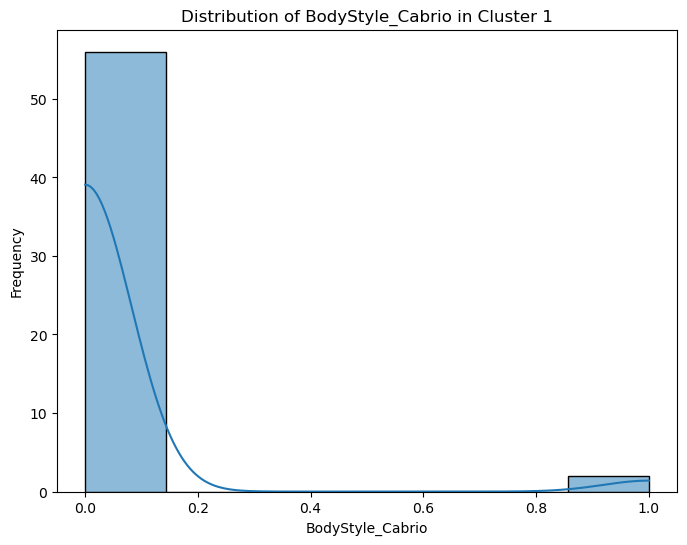

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


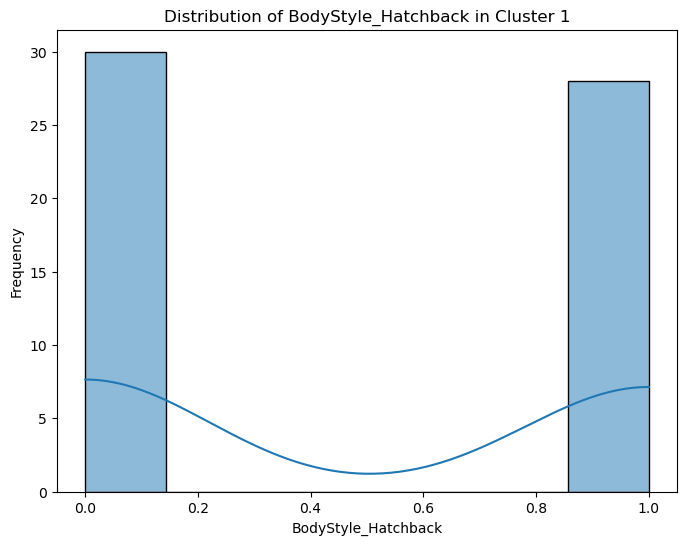

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


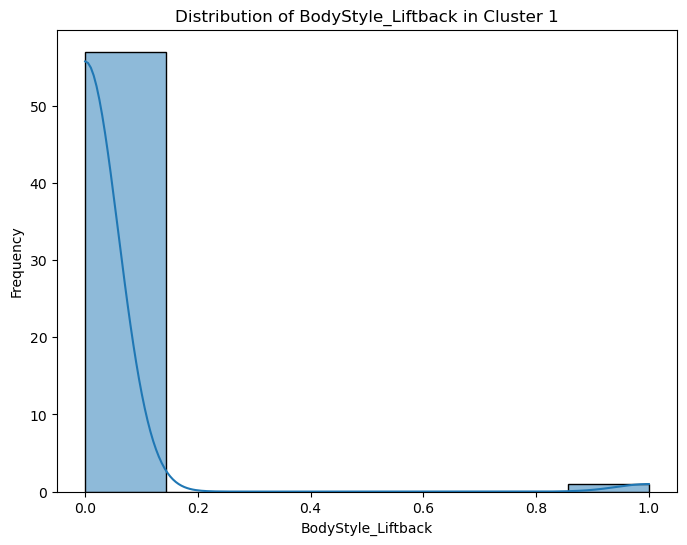

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


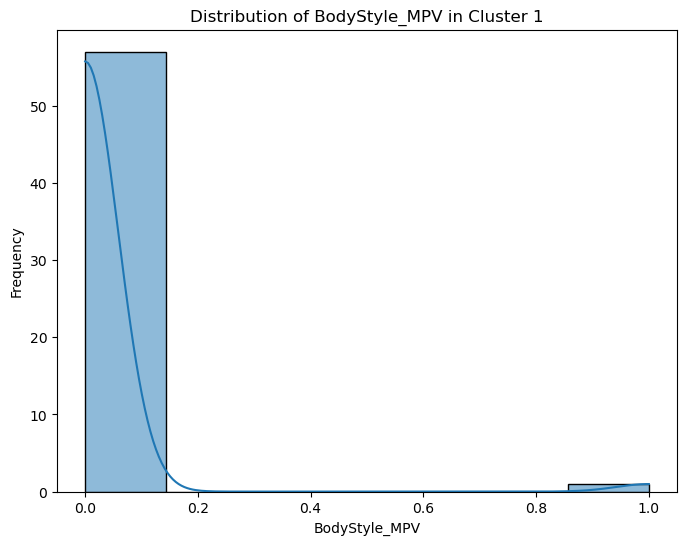

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


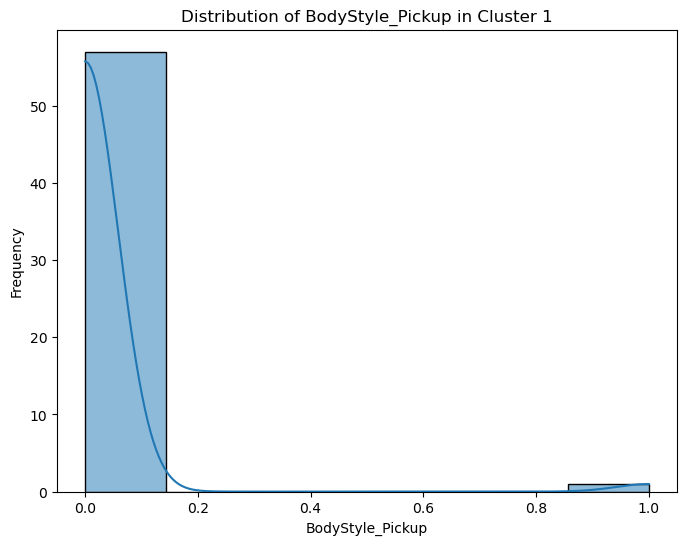

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


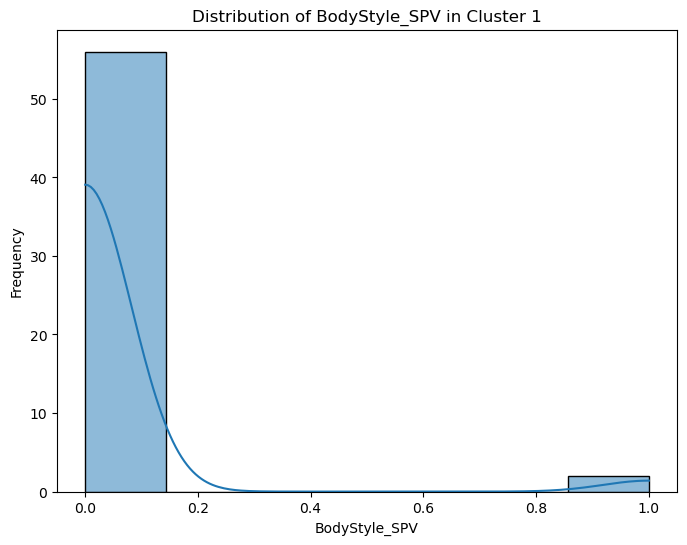

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


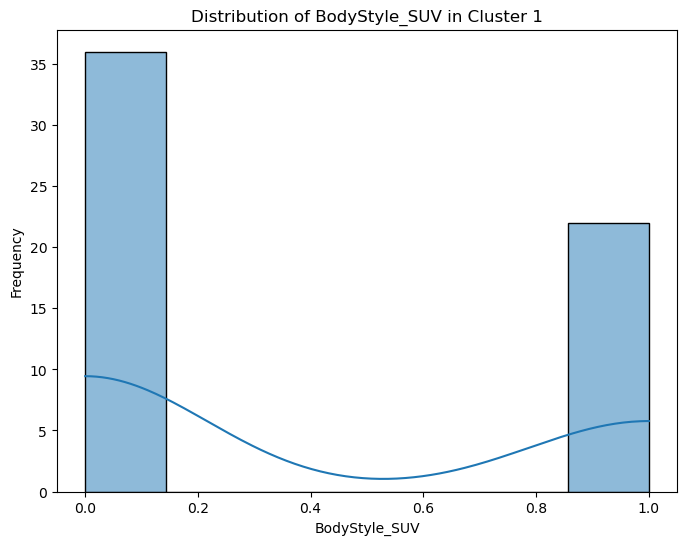

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


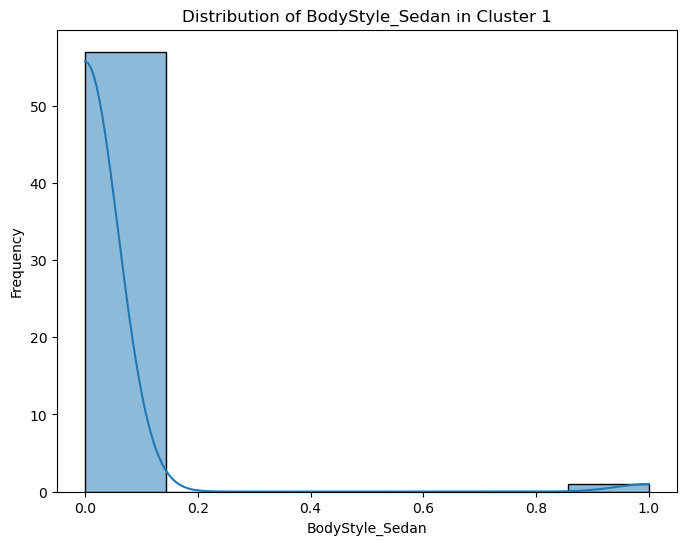

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


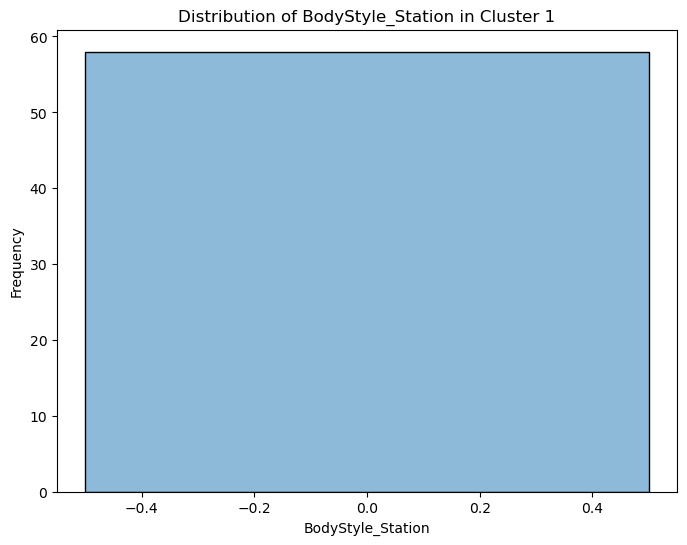

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


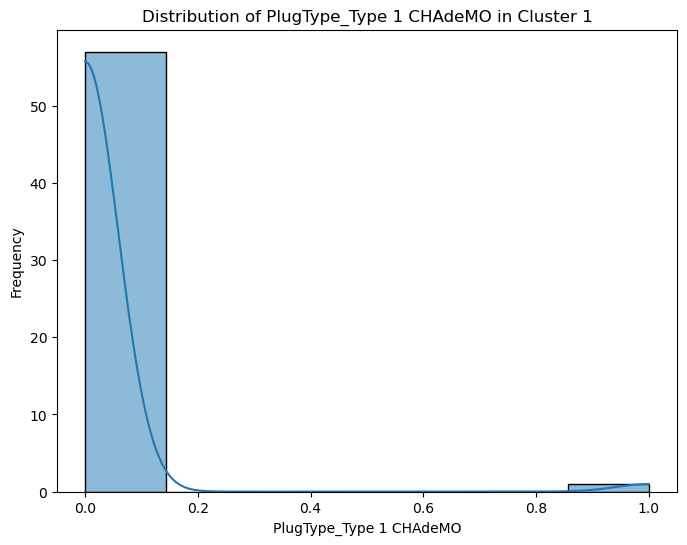

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


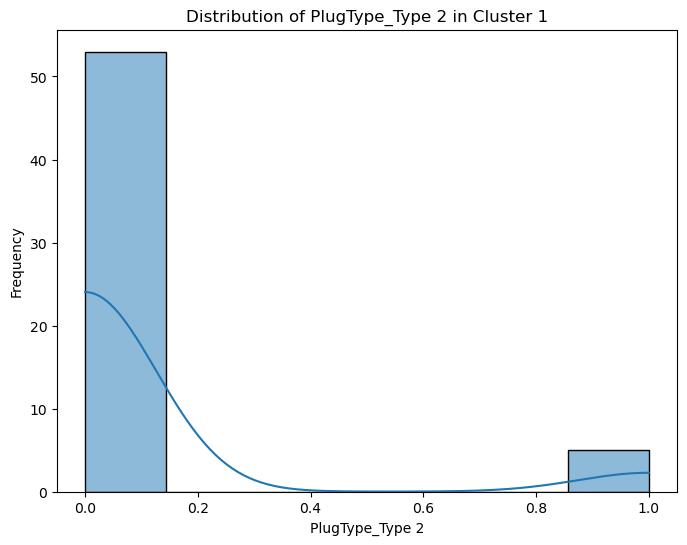

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


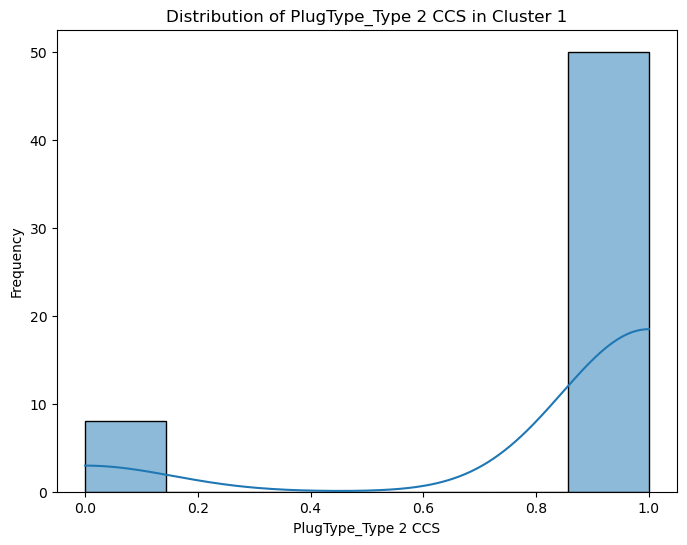

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


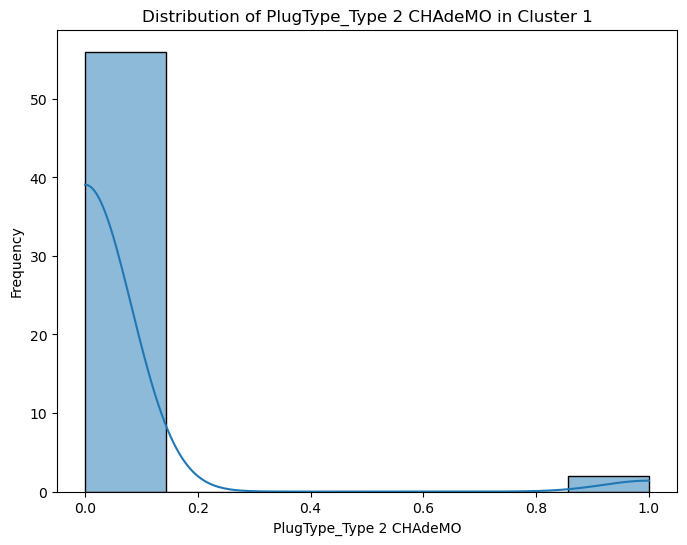

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


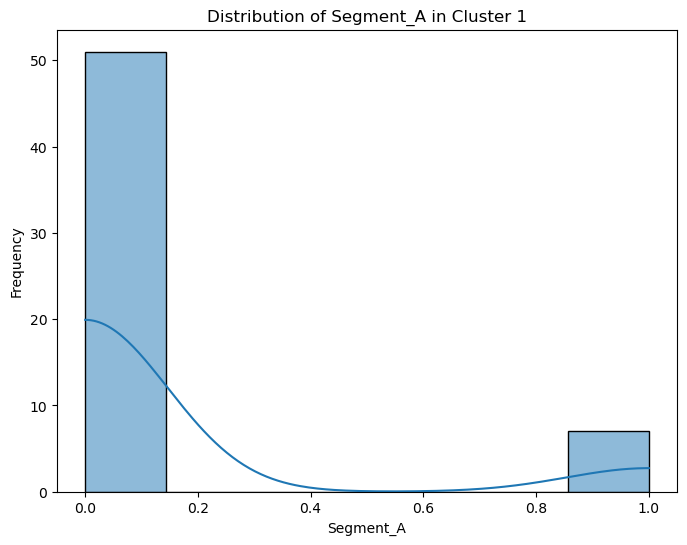

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


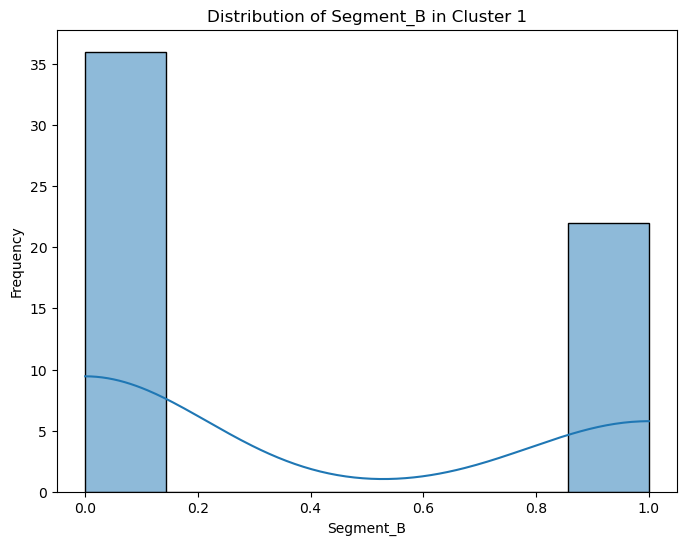

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


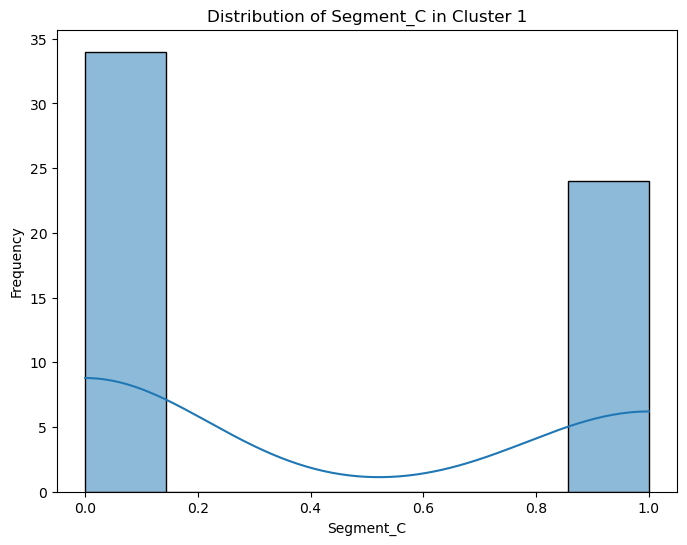

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


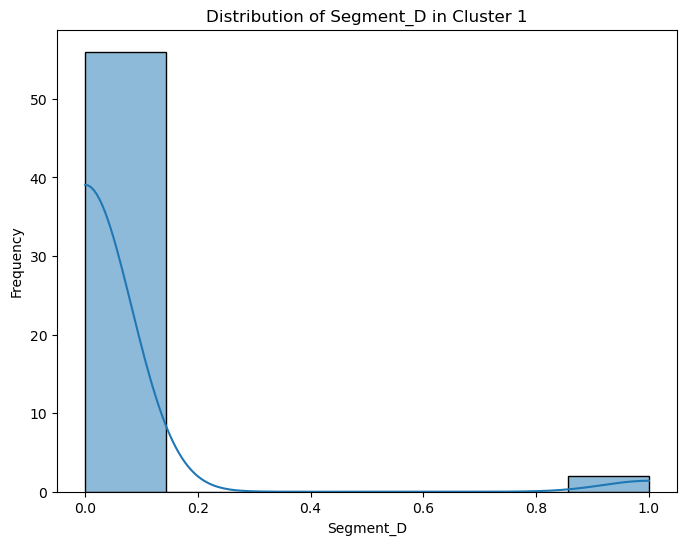

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


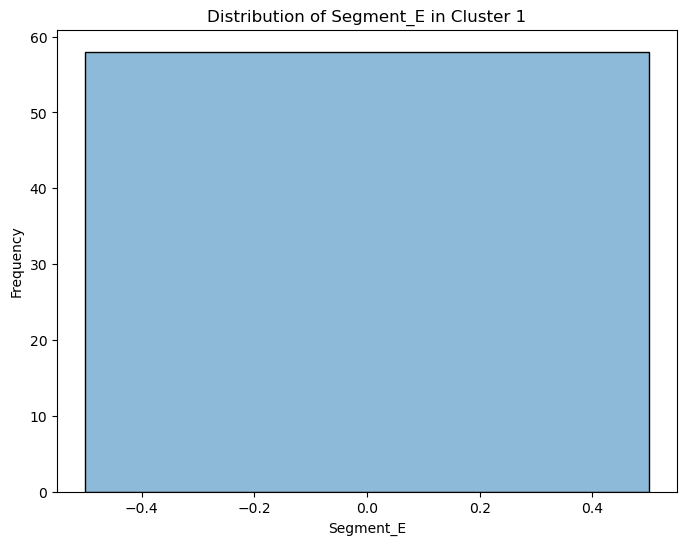

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


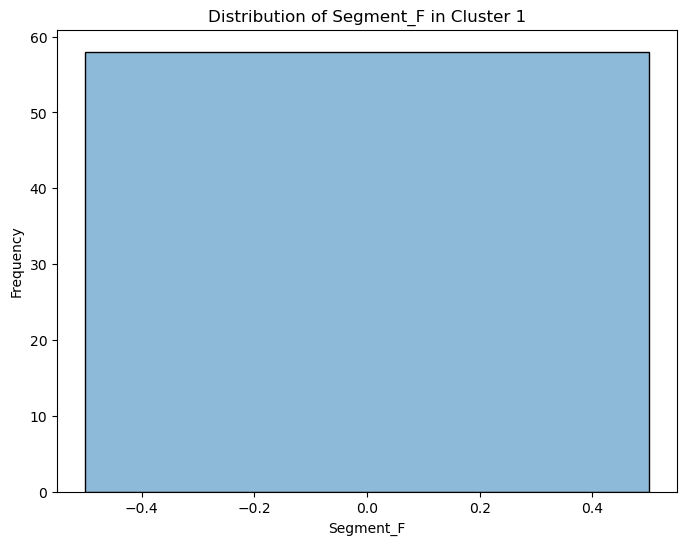

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


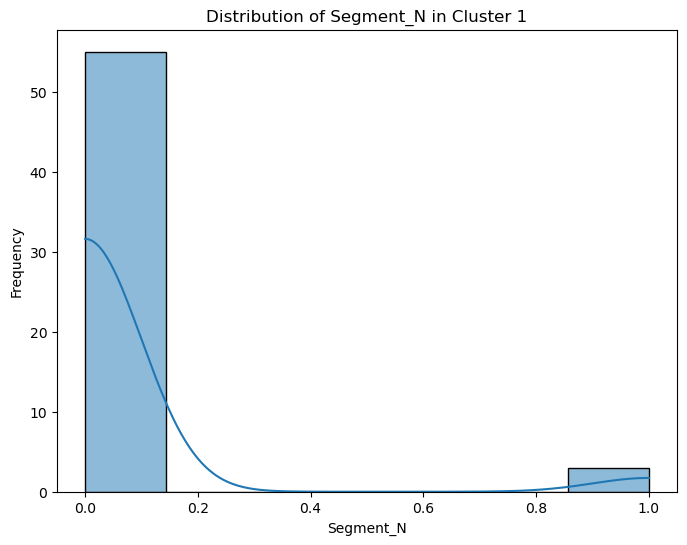

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


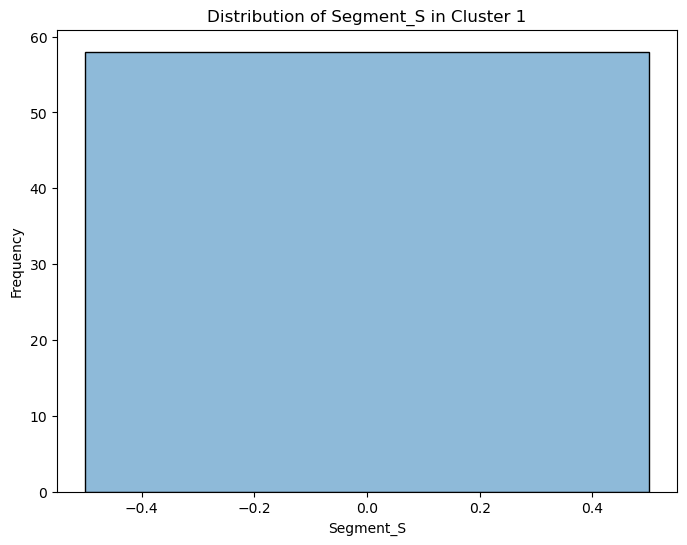

Cluster 2:
           Accel  Efficiency  FastCharge  RapidCharge  PowerTrain      Seats  \
count  11.000000   11.000000   11.000000         11.0        11.0  11.000000   
mean    4.081818  214.909091  597.272727          1.0         0.0   5.181818   
std     1.083345   30.303315  119.924218          0.0         0.0   0.981650   
min     2.500000  180.000000  480.000000          1.0         0.0   4.000000   
25%     3.300000  191.500000  525.000000          1.0         0.0   5.000000   
50%     4.000000  211.000000  560.000000          1.0         0.0   5.000000   
75%     4.550000  232.500000  615.000000          1.0         0.0   5.000000   
max     5.700000  270.000000  890.000000          1.0         0.0   7.000000   

           PriceEuro  Range_numerical  Brand_encoded  Model_encoded  \
count      11.000000        11.000000      11.000000      11.000000   
mean    94012.818182       428.181818      17.000000      64.636364   
std     10743.591893        88.212038      13.423859   

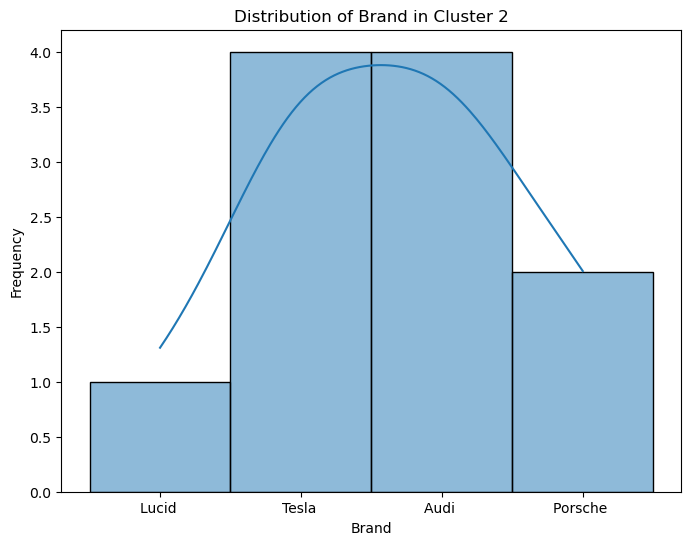

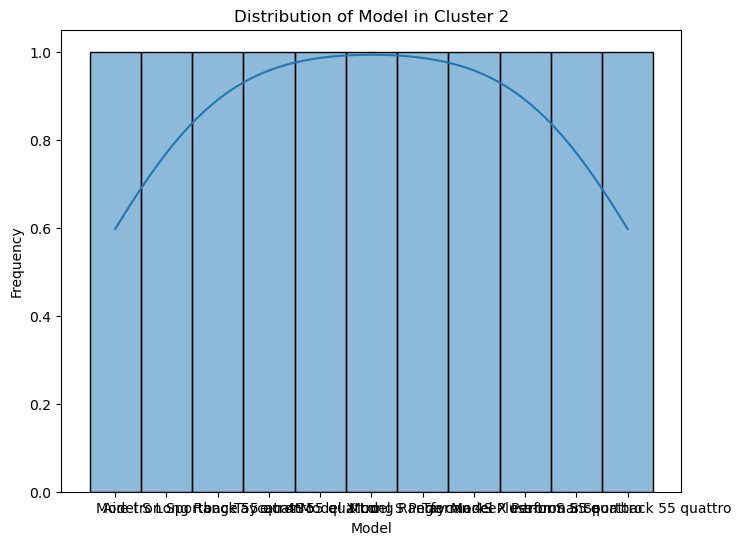

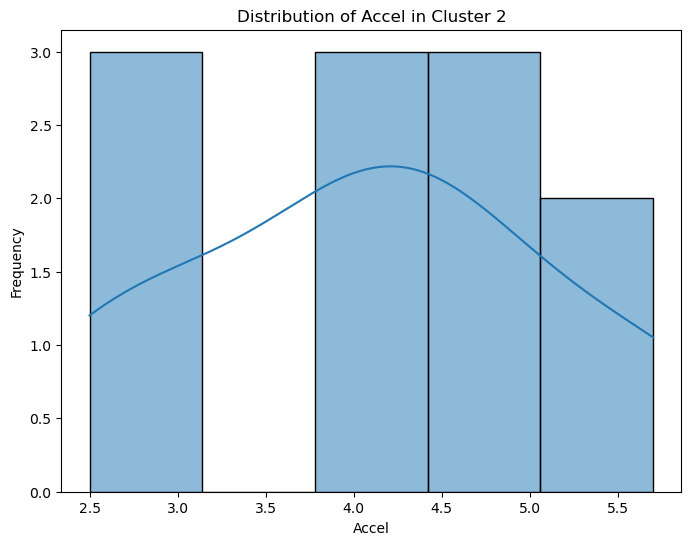

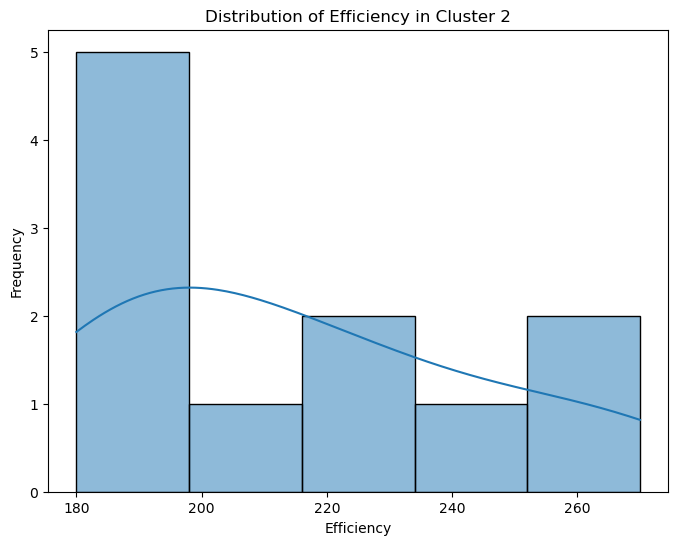

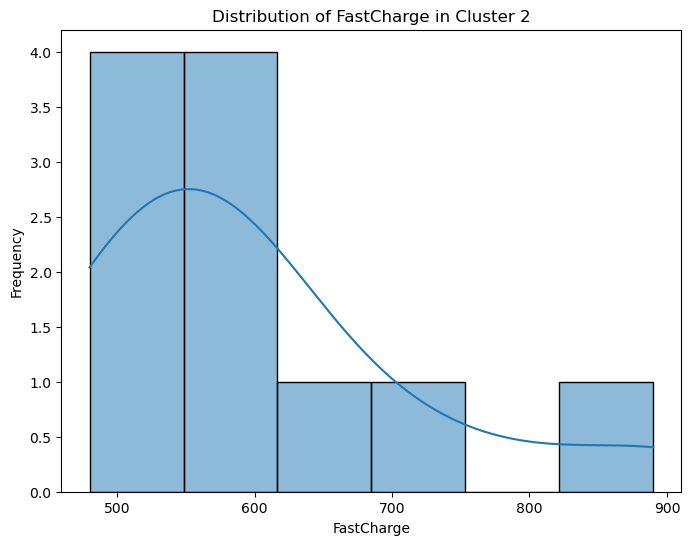

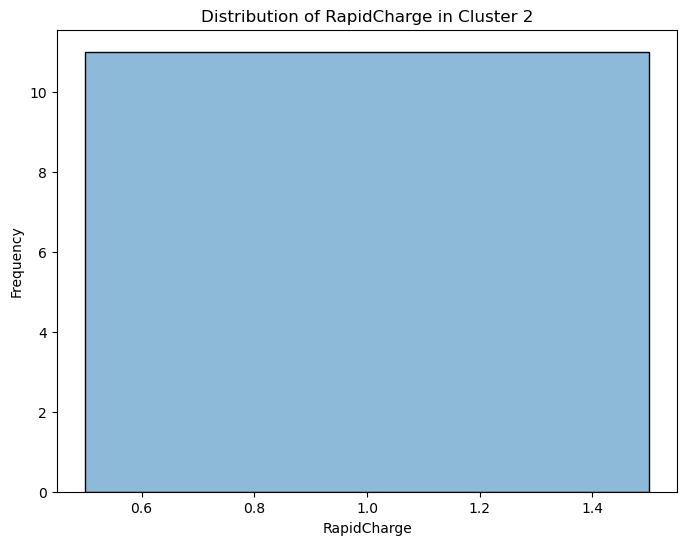

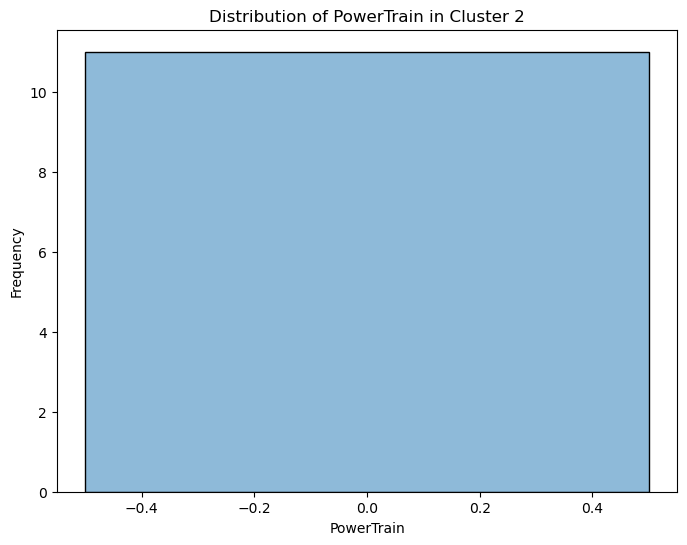

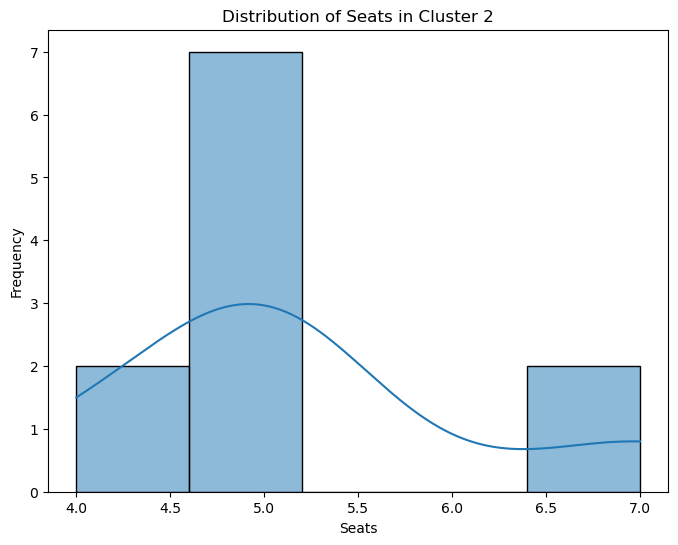

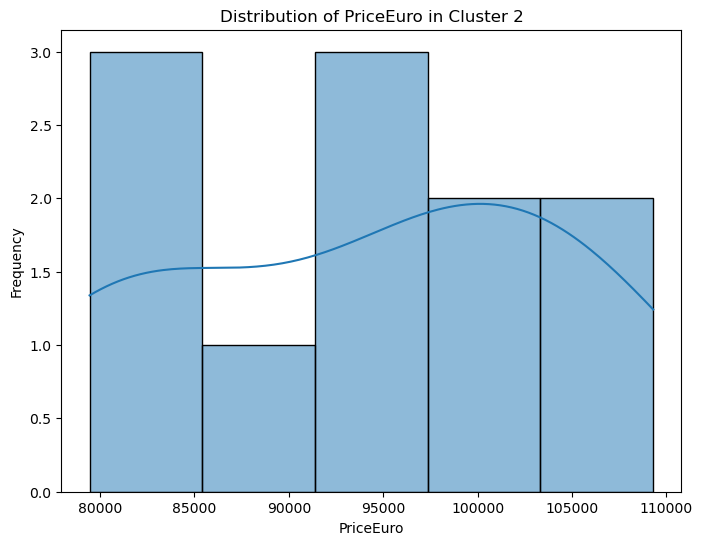

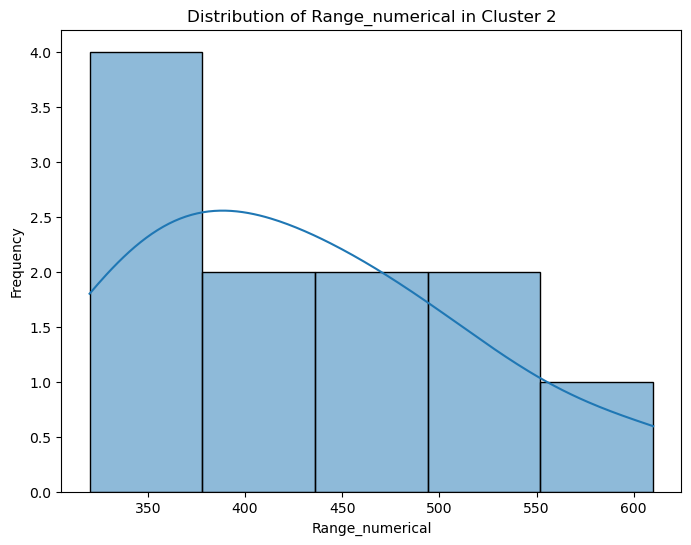

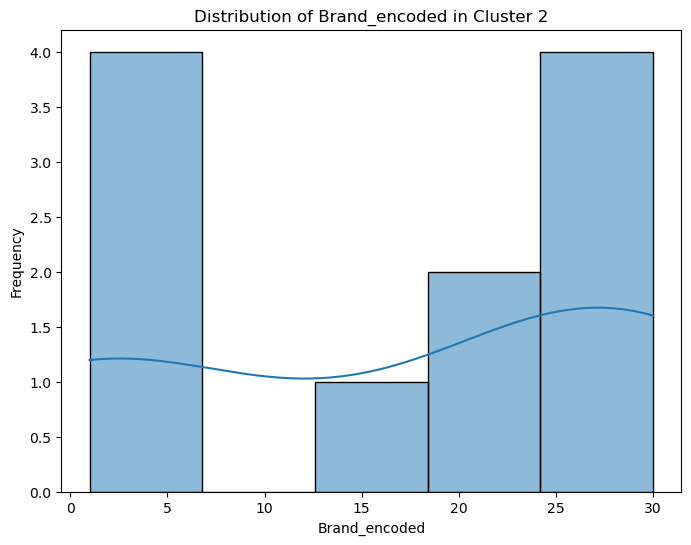

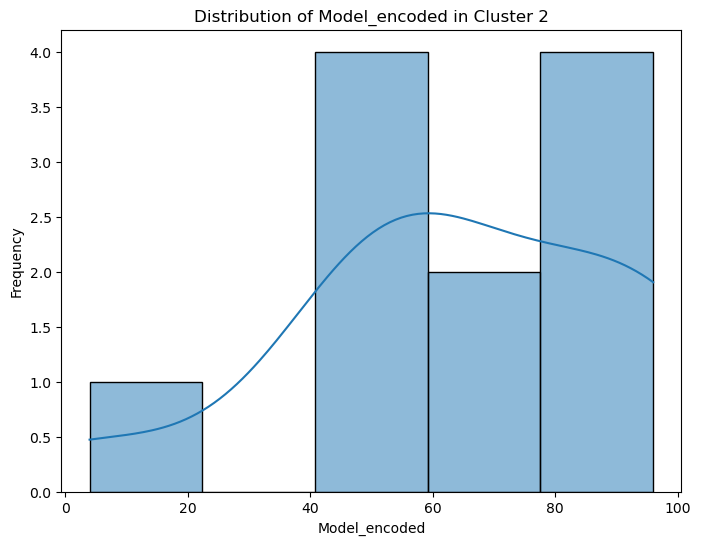

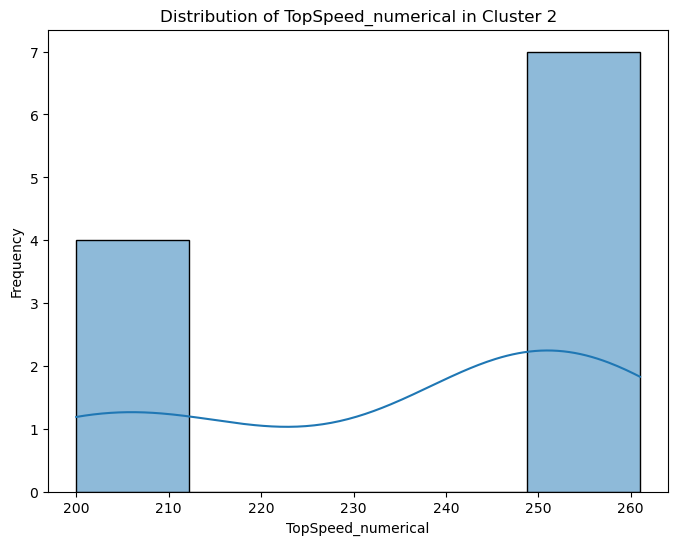

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


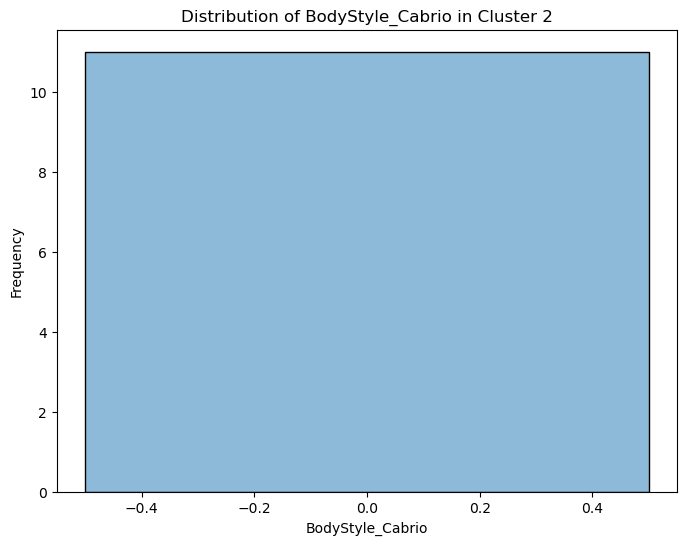

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


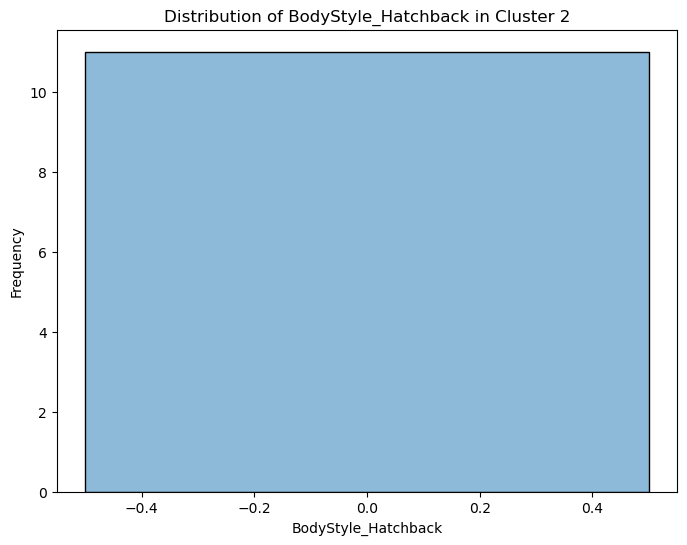

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


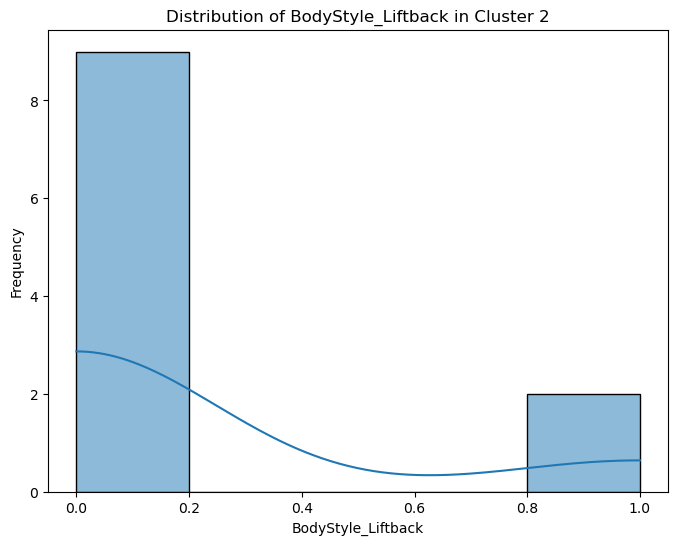

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


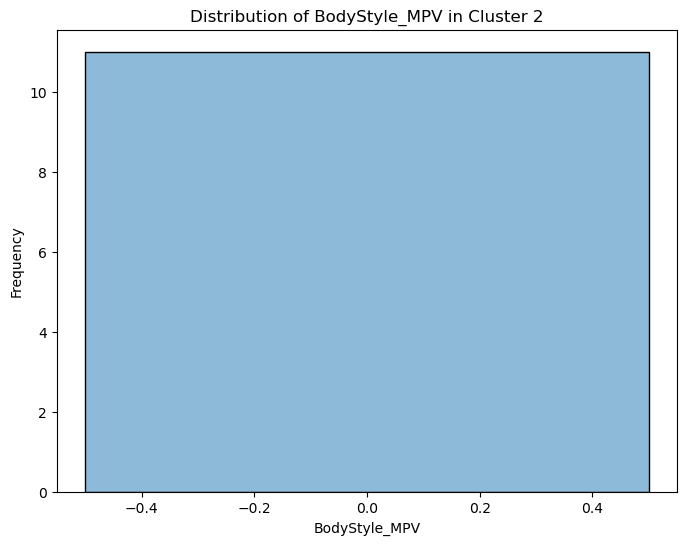

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


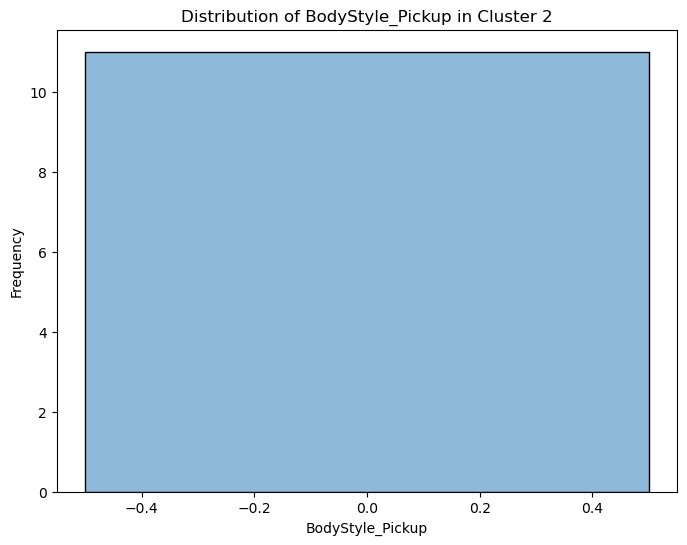

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


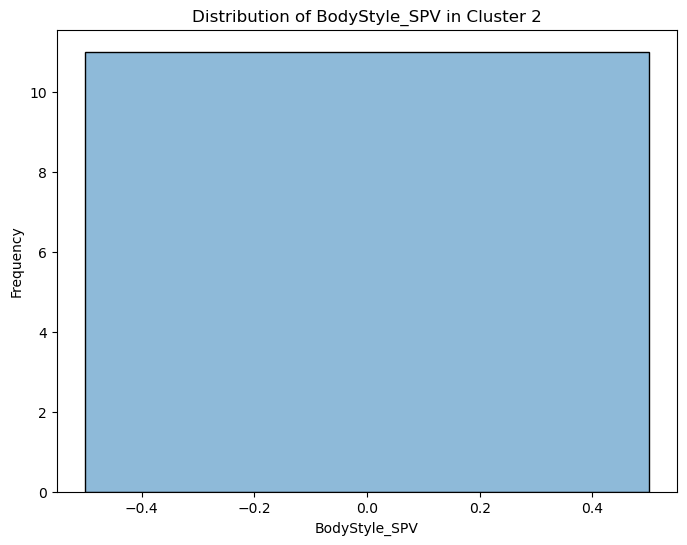

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


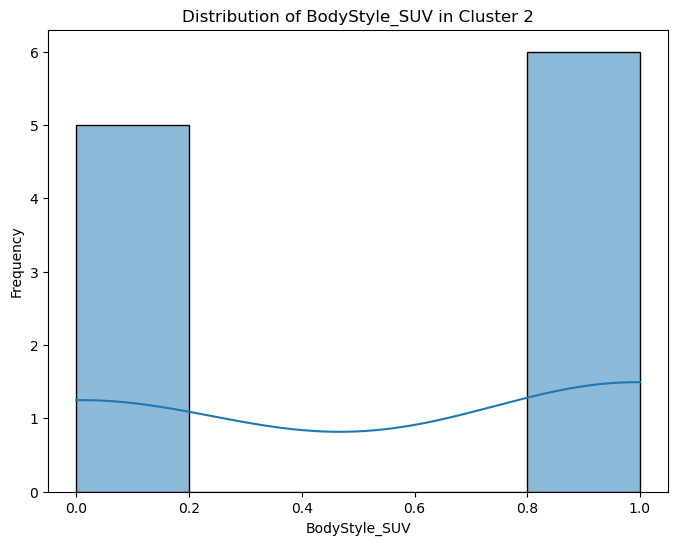

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


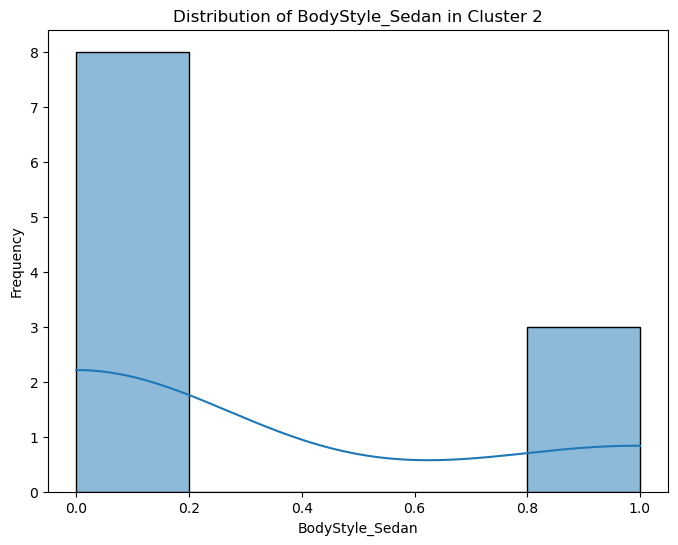

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


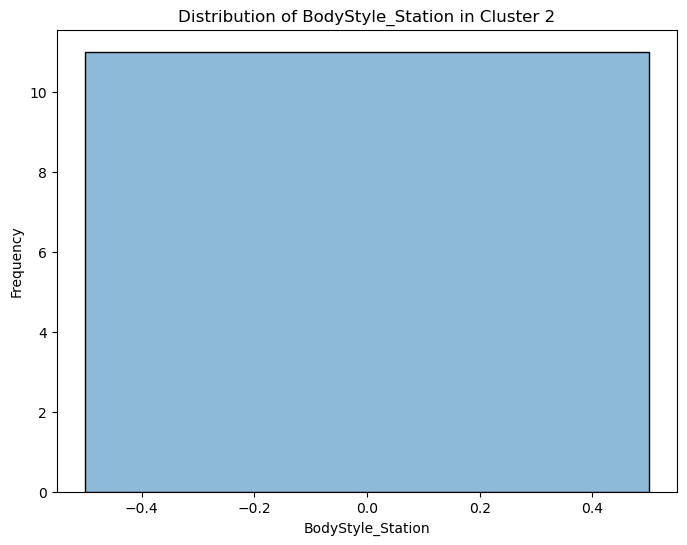

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


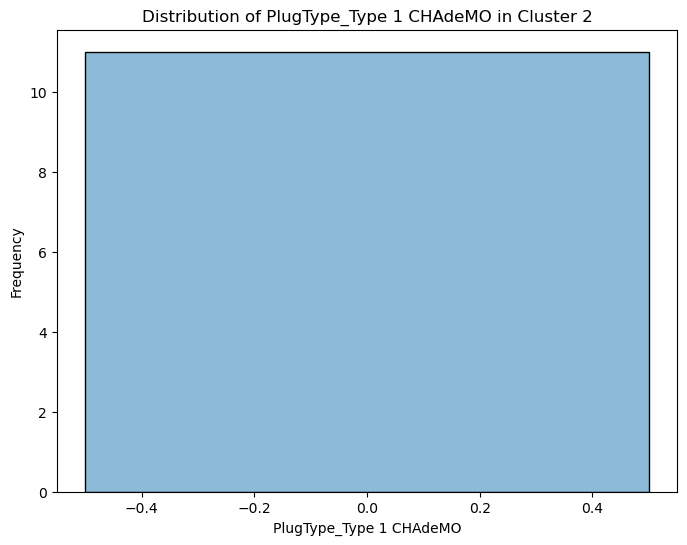

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


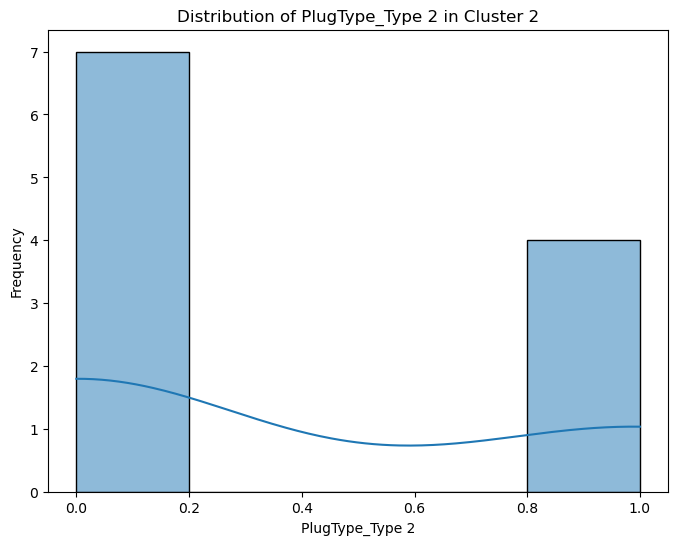

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


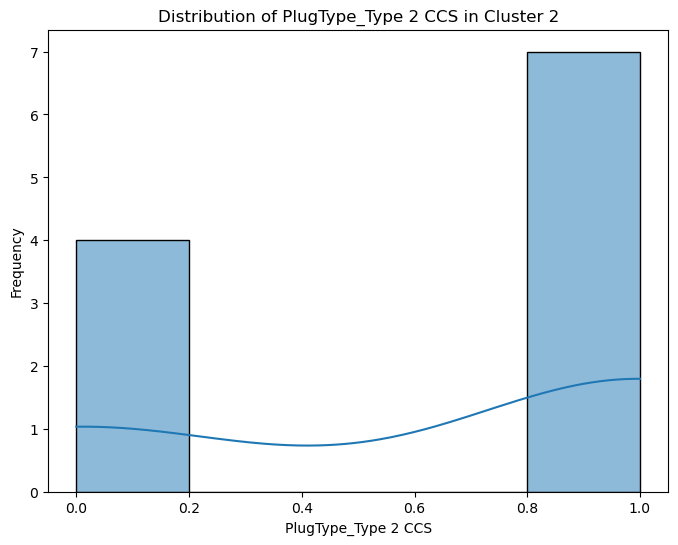

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


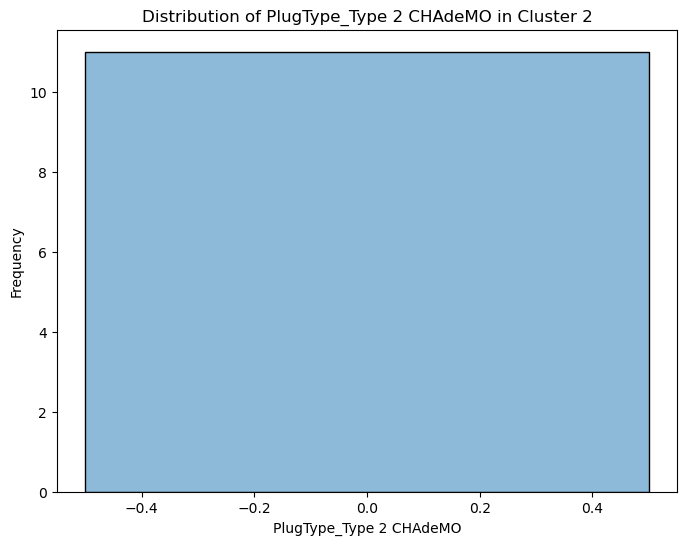

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


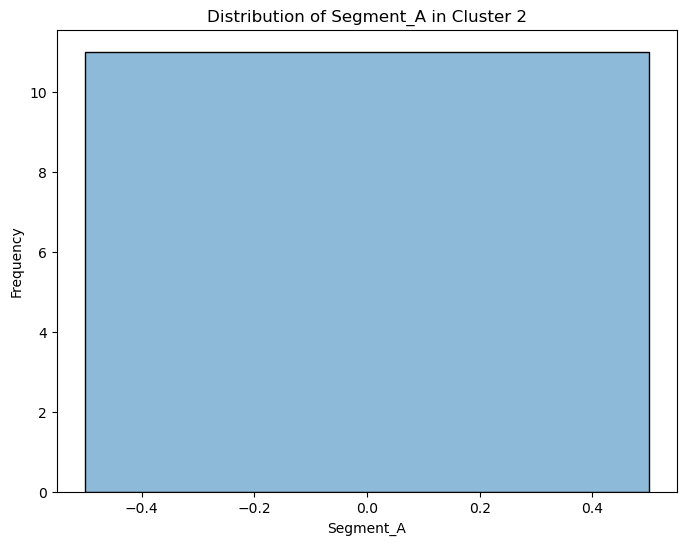

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


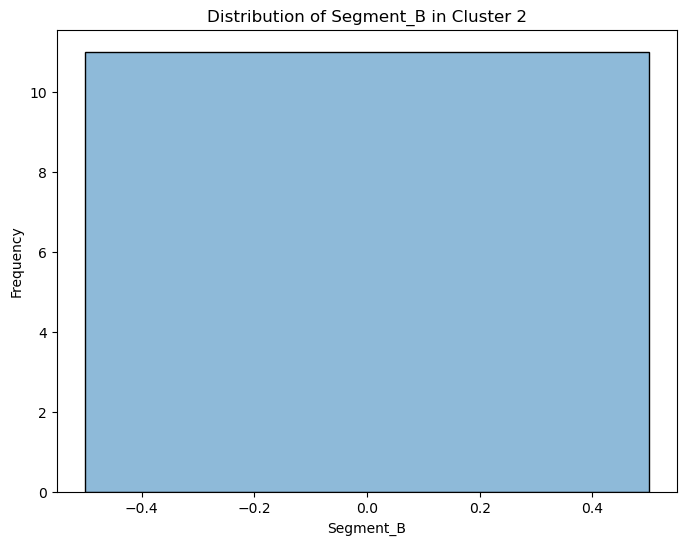

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


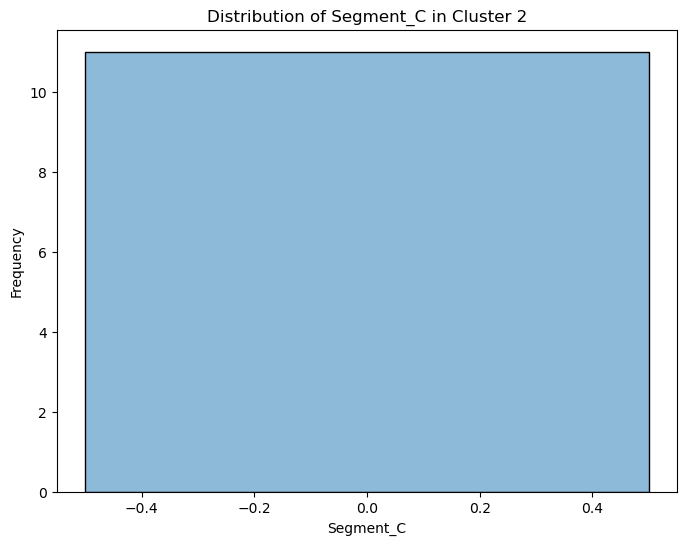

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


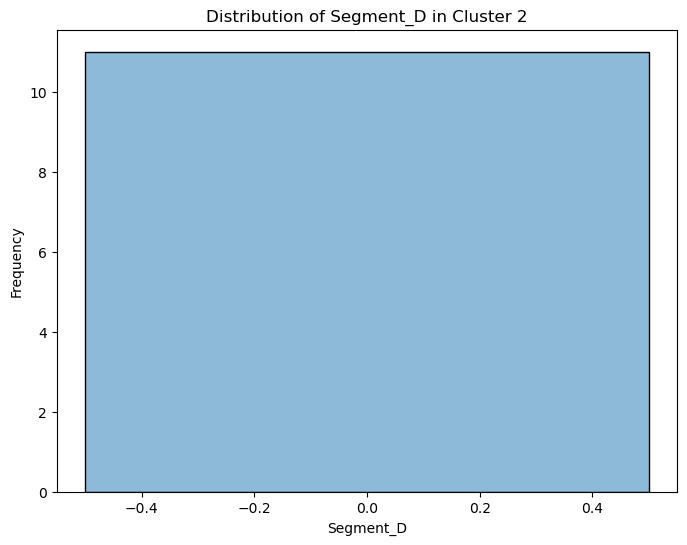

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


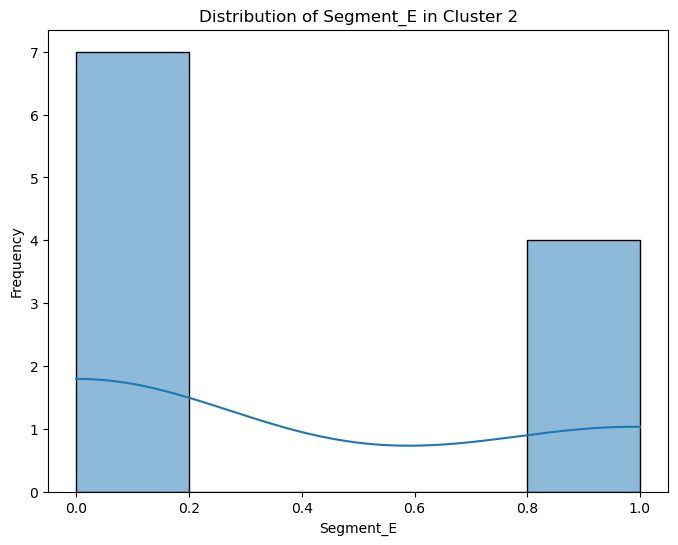

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


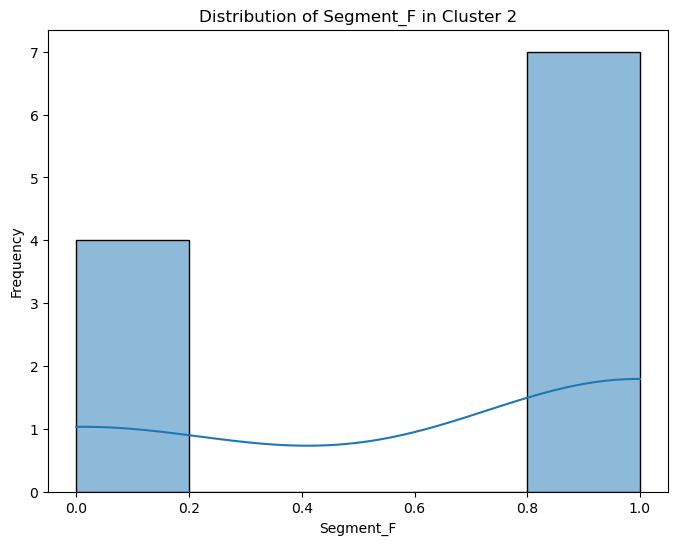

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


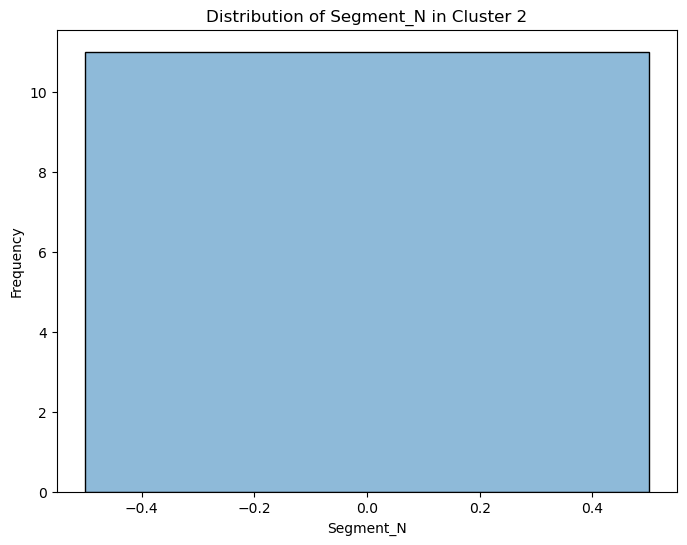

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


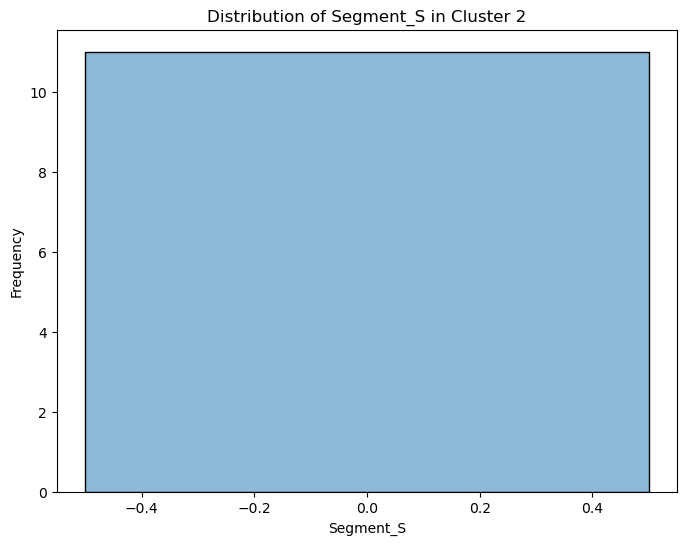

Cluster 3:
          Accel  Efficiency  FastCharge  RapidCharge  PowerTrain  Seats  \
count  2.000000    2.000000    2.000000          2.0         2.0    2.0   
mean   2.450000  214.500000  850.000000          1.0         0.0    4.0   
std    0.494975   12.020815   98.994949          0.0         0.0    0.0   
min    2.100000  206.000000  780.000000          1.0         0.0    4.0   
25%    2.275000  210.250000  815.000000          1.0         0.0    4.0   
50%    2.450000  214.500000  850.000000          1.0         0.0    4.0   
75%    2.625000  218.750000  885.000000          1.0         0.0    4.0   
max    2.800000  223.000000  920.000000          1.0         0.0    4.0   

           PriceEuro  Range_numerical  Brand_encoded  Model_encoded  \
count       2.000000         2.000000       2.000000       2.000000   
mean   197890.500000       672.500000      27.000000      66.000000   
std     24196.486945       420.728535       4.242641       4.242641   
min    180781.000000       37

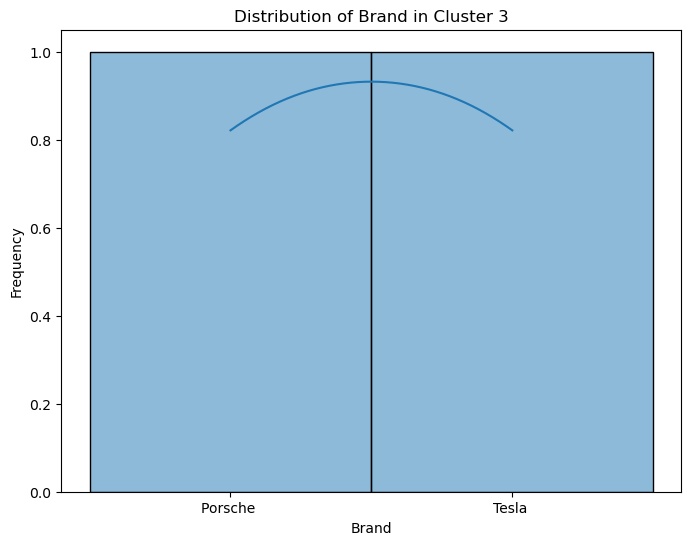

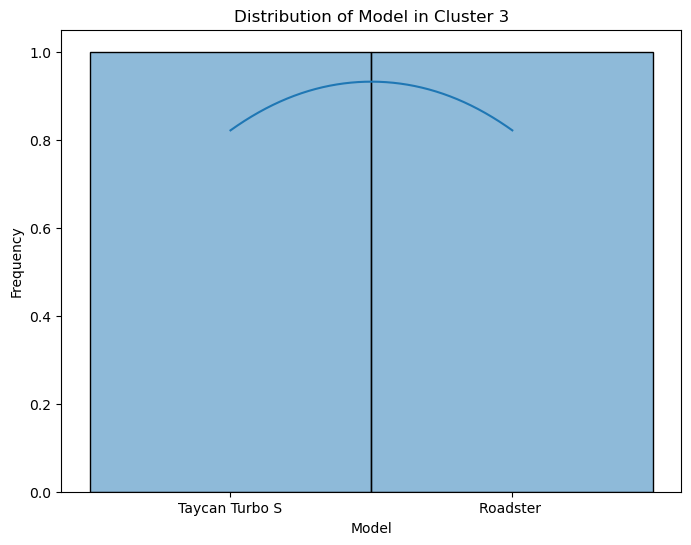

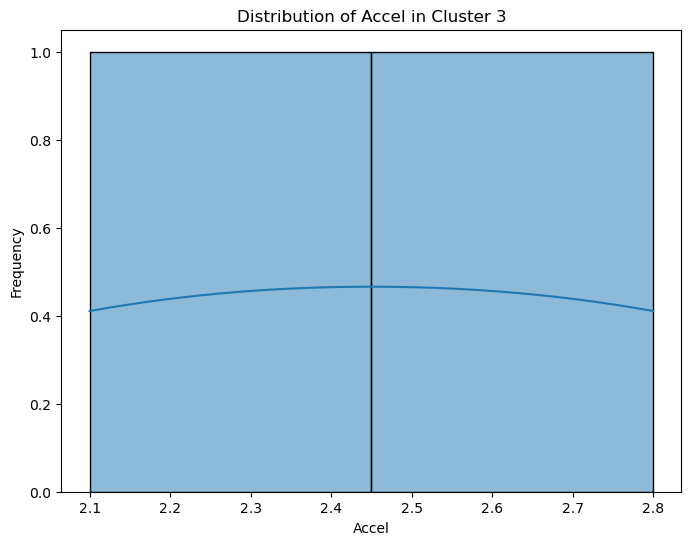

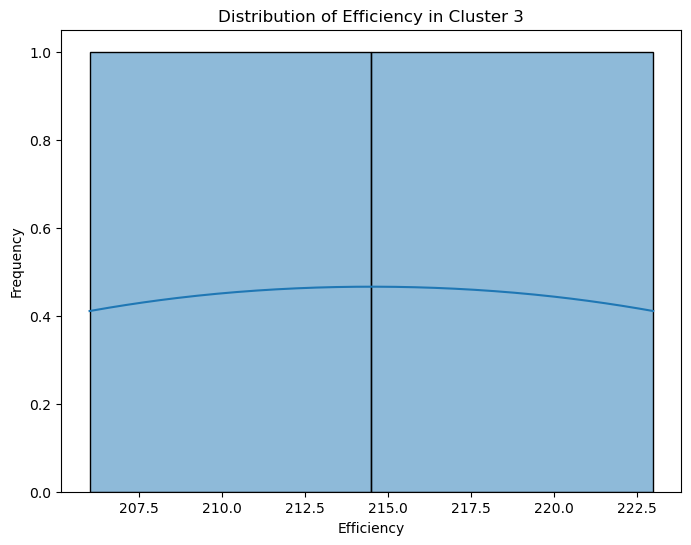

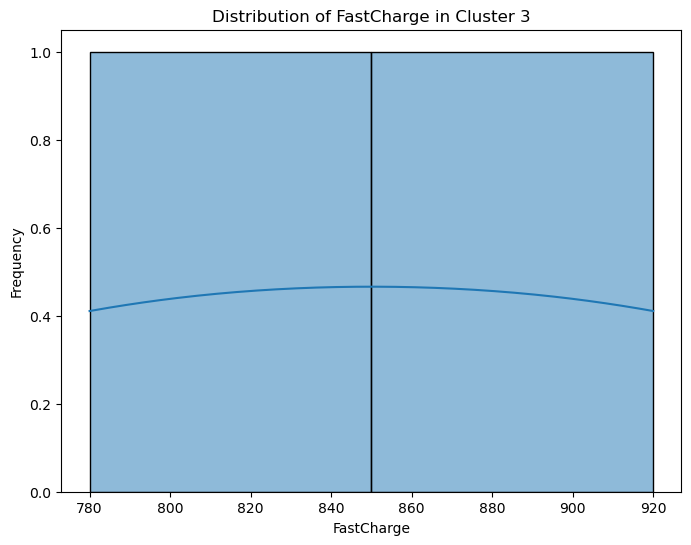

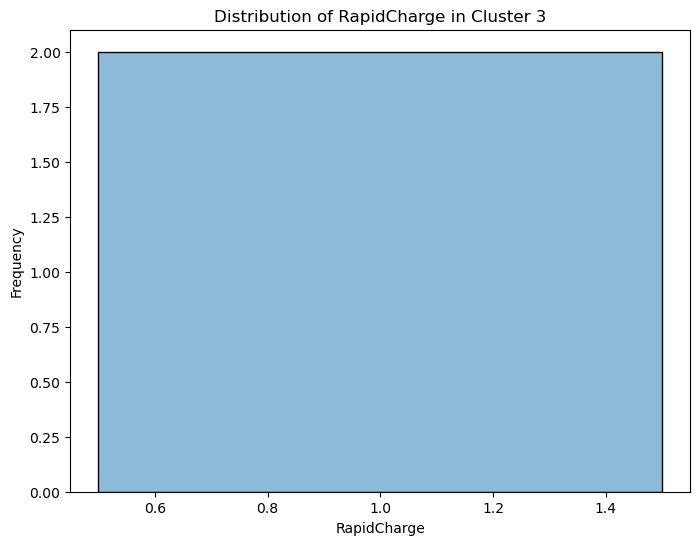

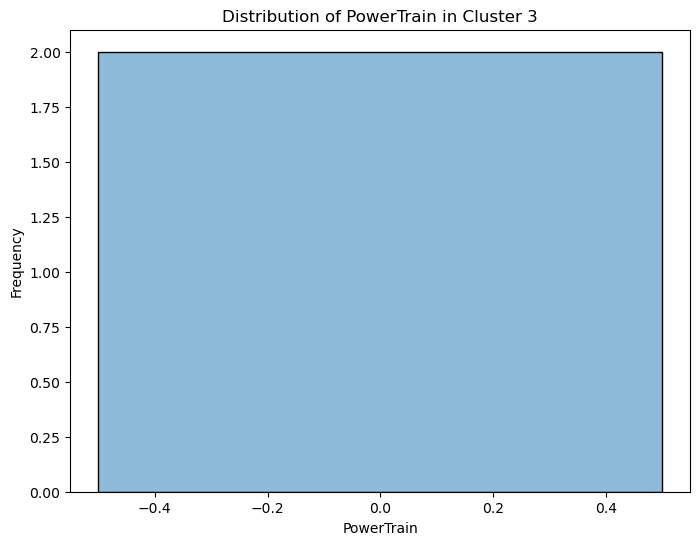

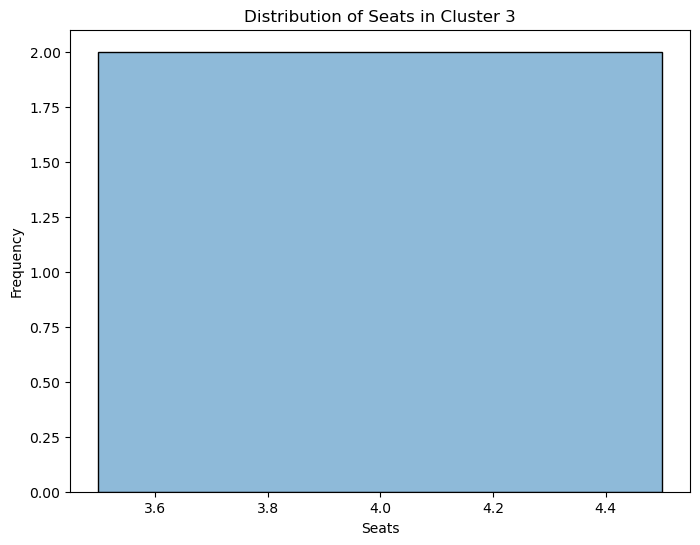

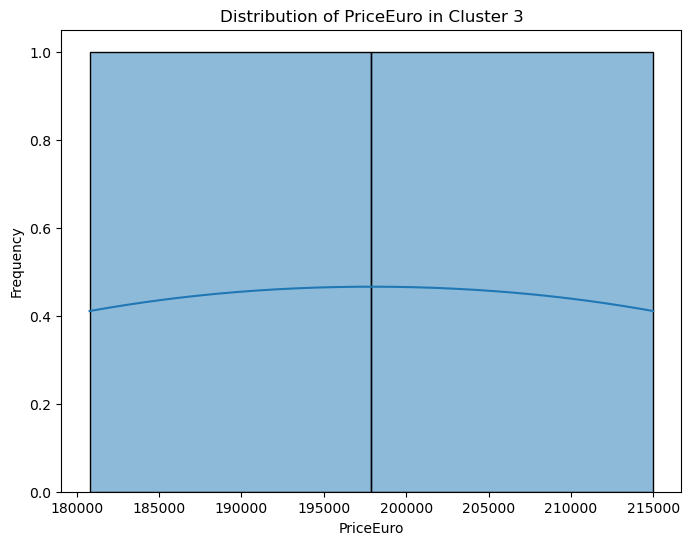

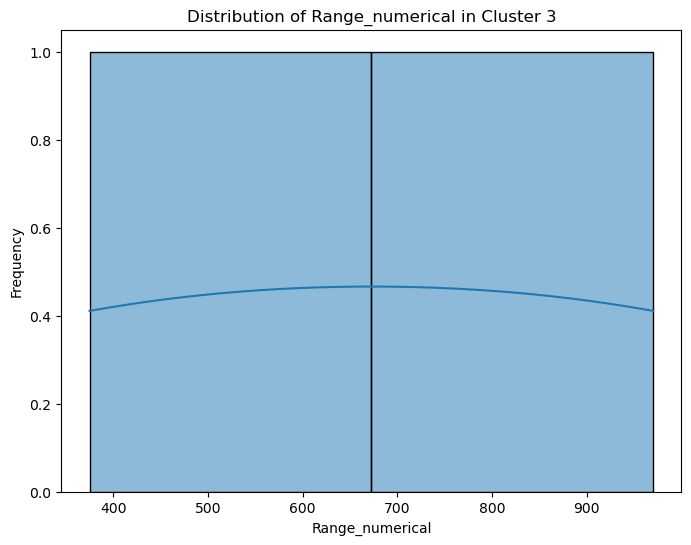

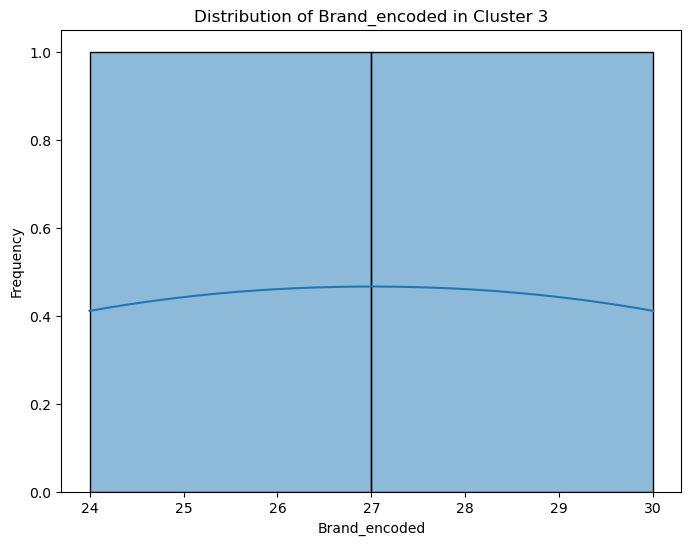

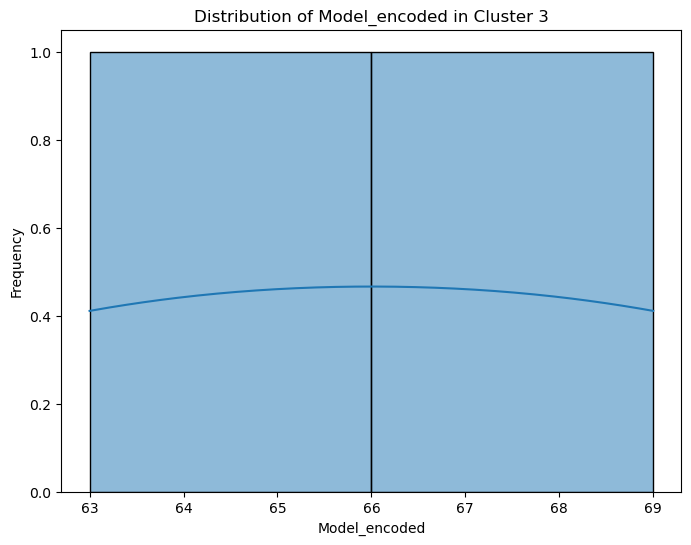

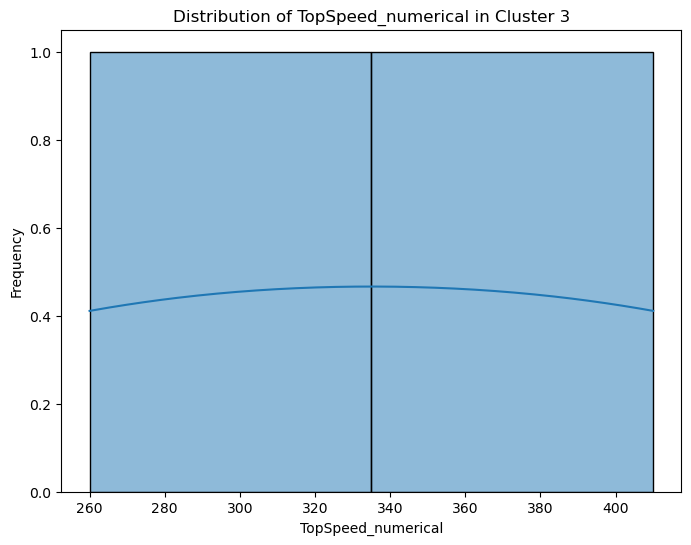

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


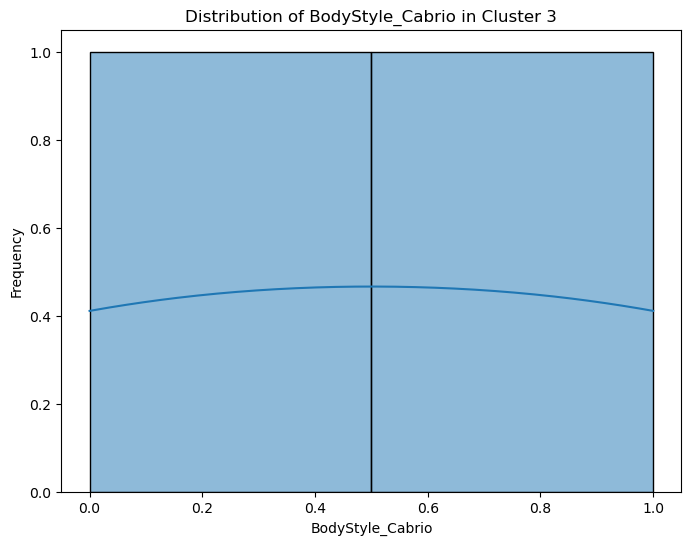

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


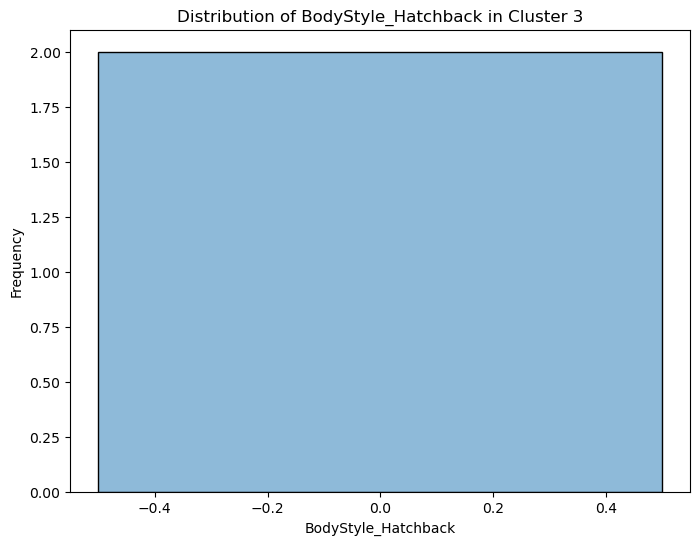

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


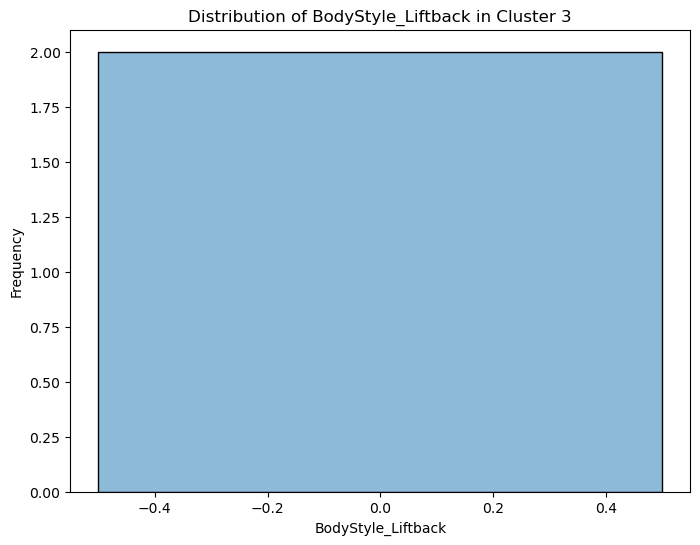

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


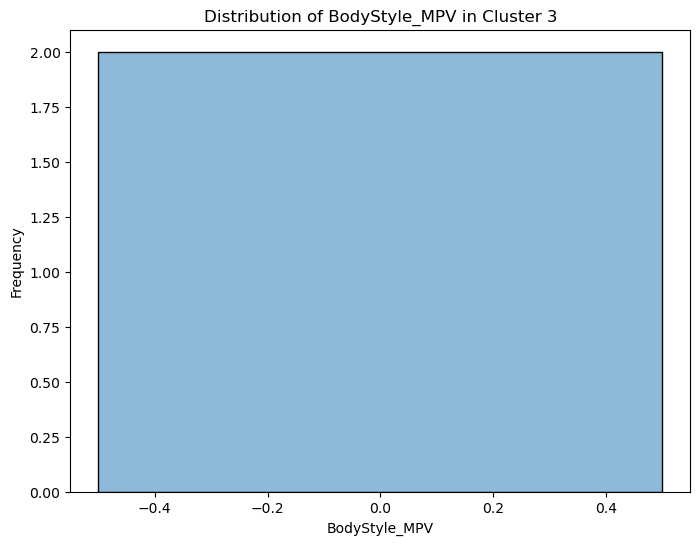

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


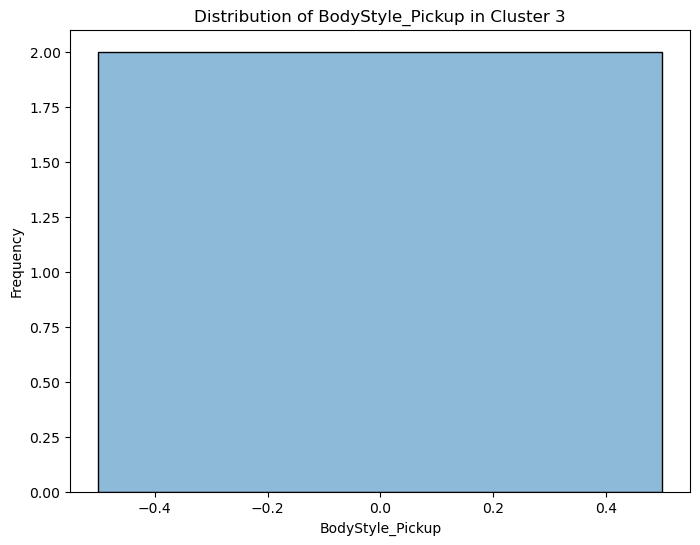

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


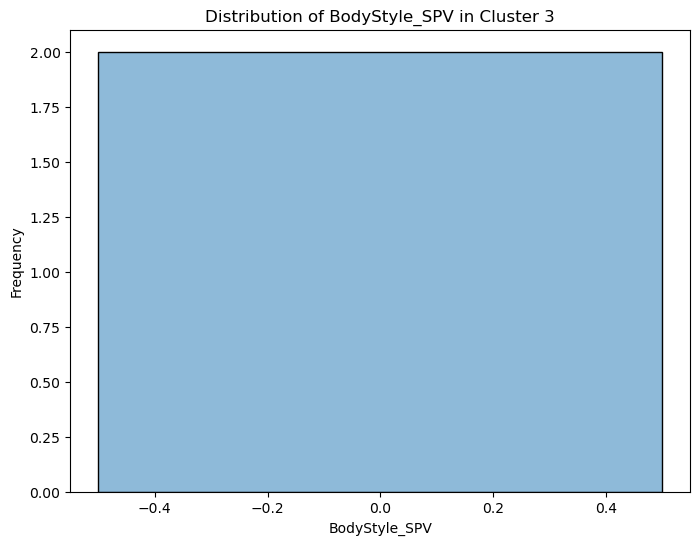

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


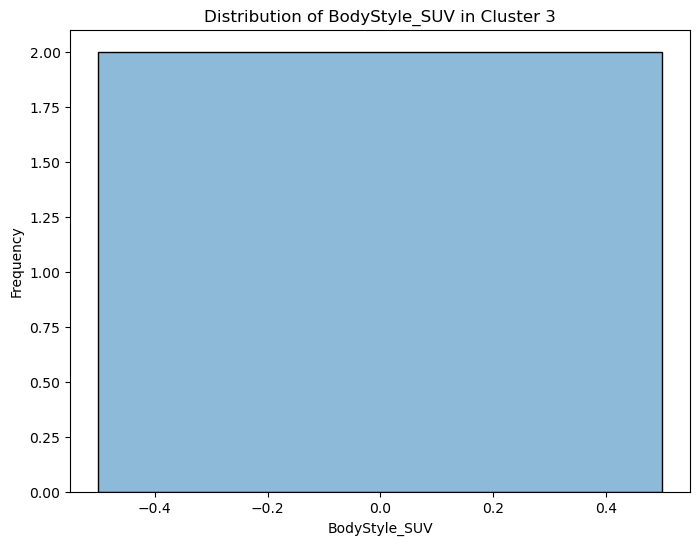

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


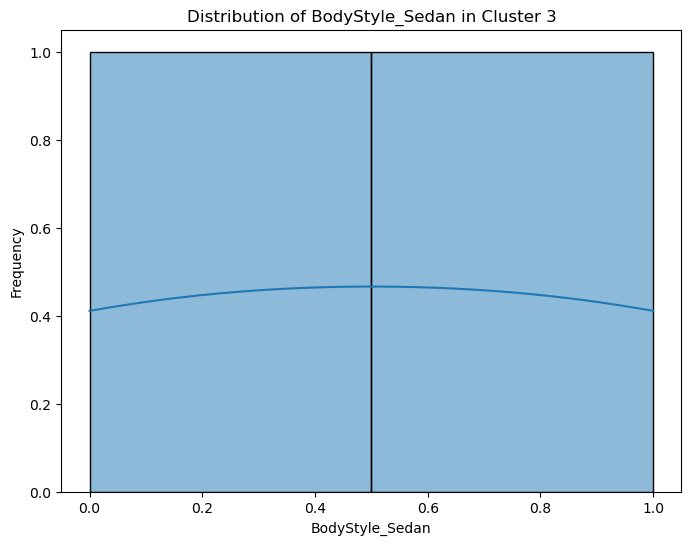

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


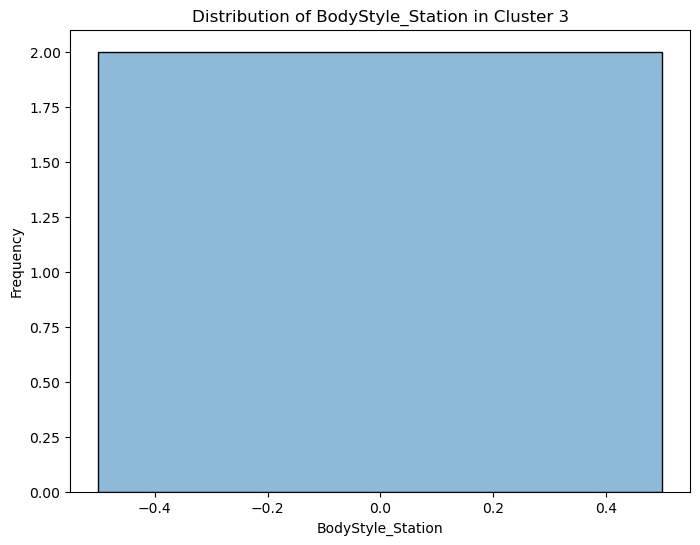

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


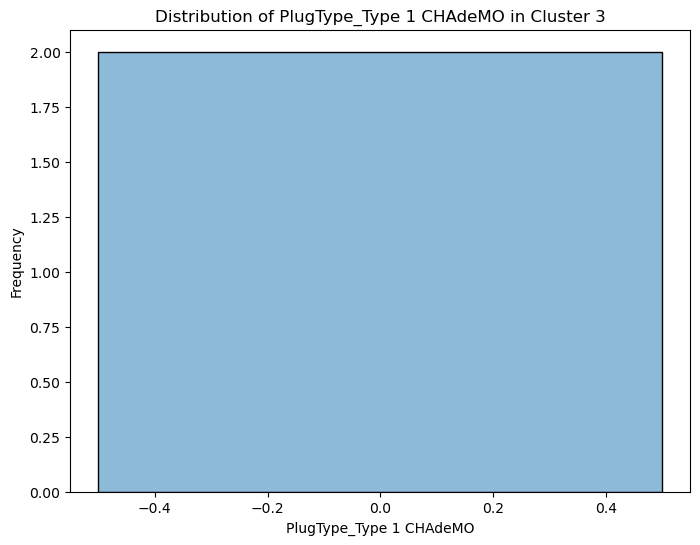

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


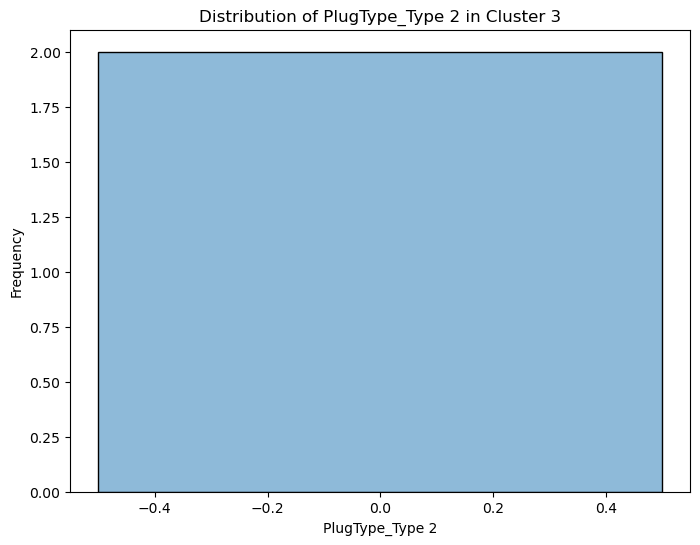

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


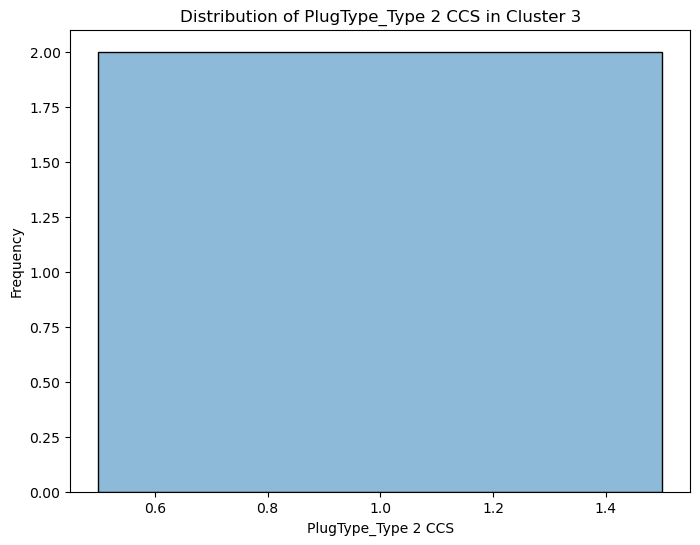

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


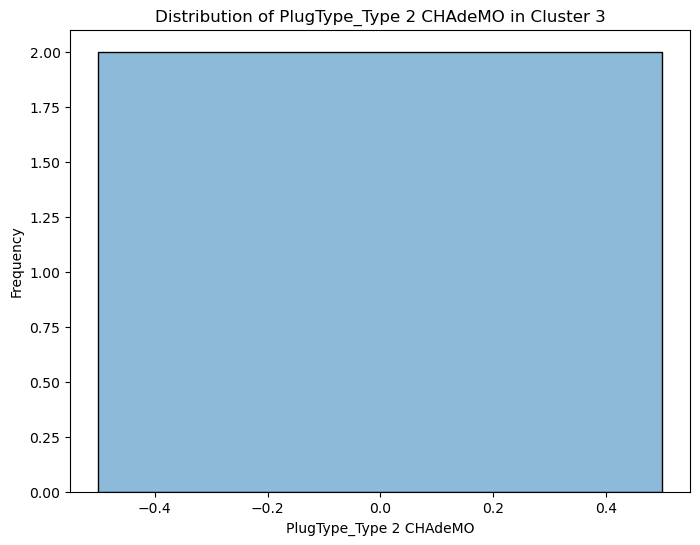

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


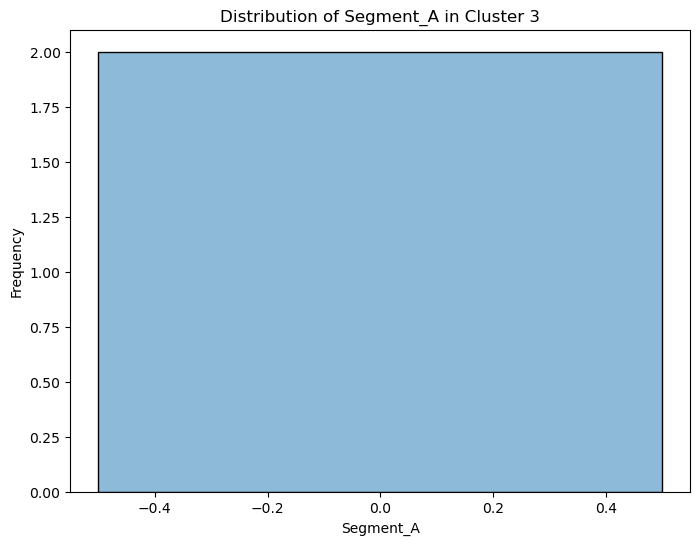

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


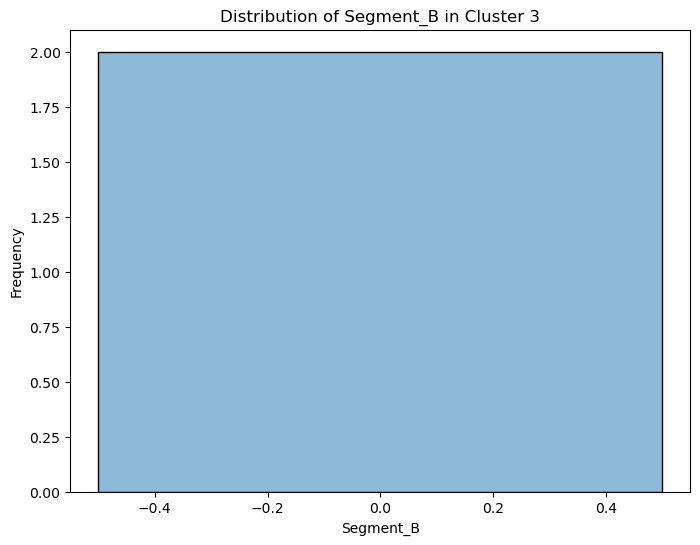

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


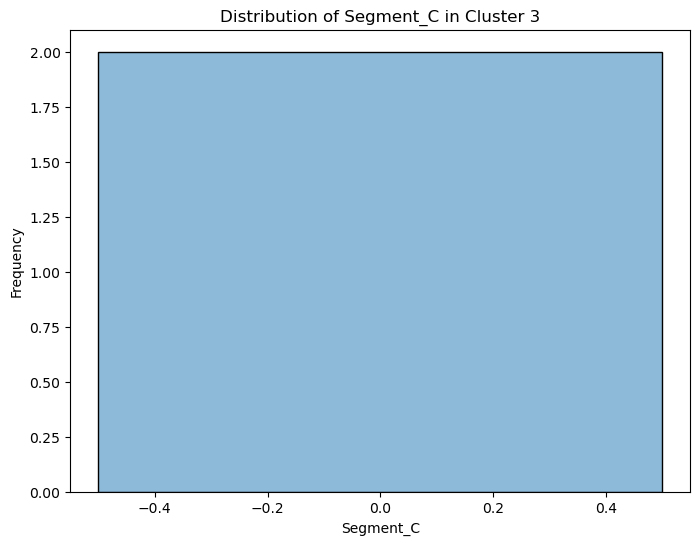

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


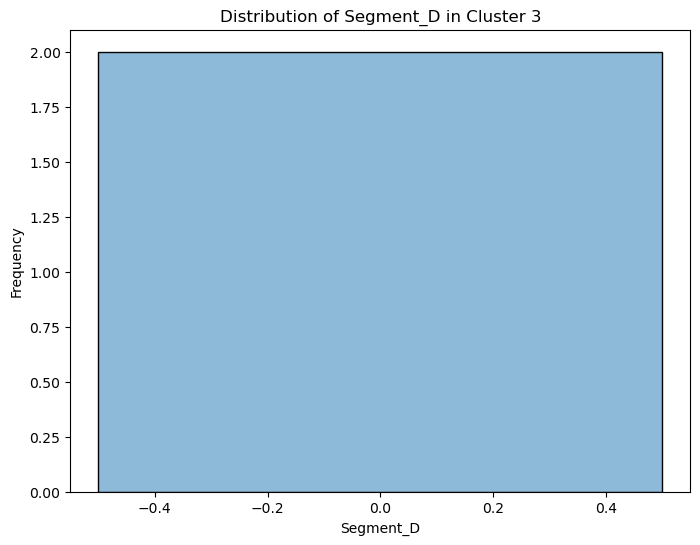

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


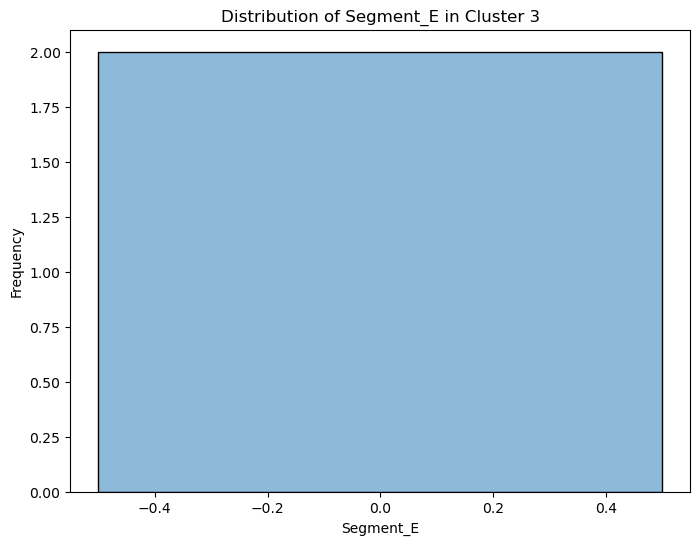

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


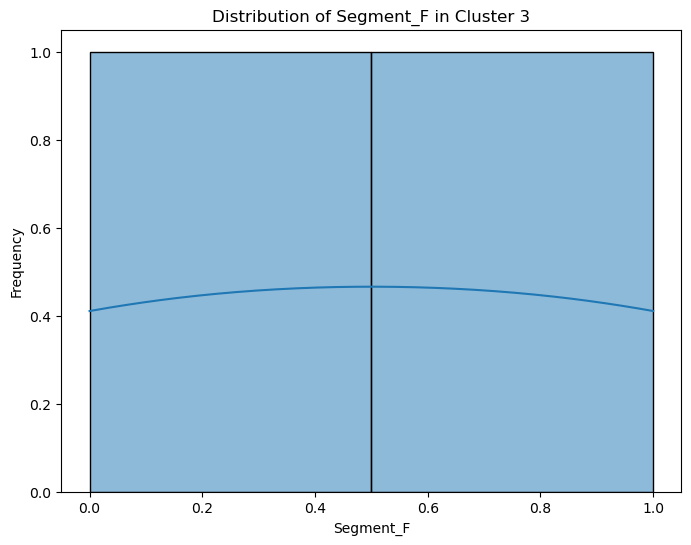

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


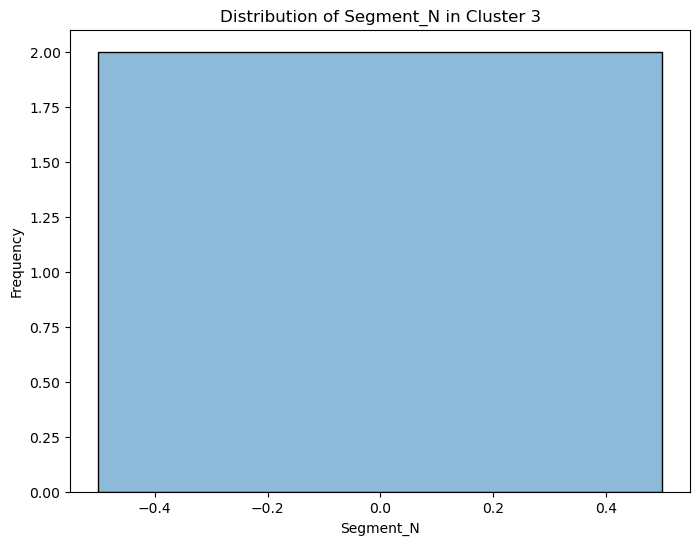

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


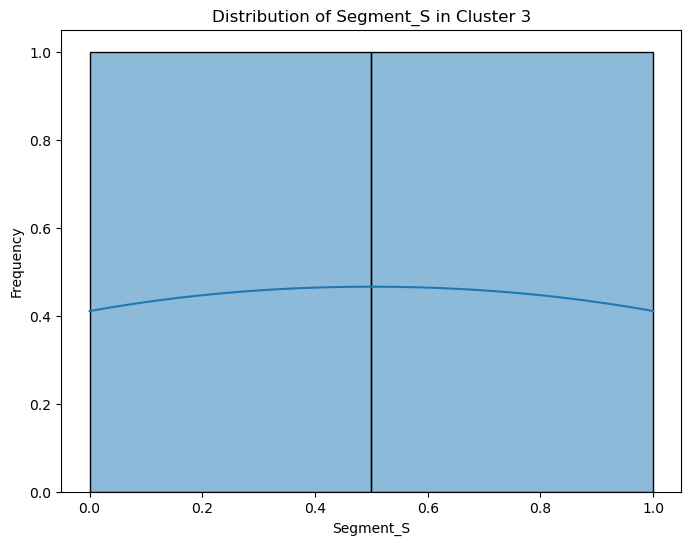

Cluster 4:
           Accel  Efficiency  FastCharge  RapidCharge  PowerTrain      Seats  \
count  28.000000   28.000000   28.000000         28.0   28.000000  28.000000   
mean    5.807143  209.428571  540.714286          1.0    0.392857   5.285714   
std     1.521434   29.720212  193.810304          0.0    0.737327   0.658682   
min     3.000000  161.000000  190.000000          1.0    0.000000   5.000000   
25%     4.875000  191.750000  437.500000          1.0    0.000000   5.000000   
50%     5.800000  206.000000  475.000000          1.0    0.000000   5.000000   
75%     6.800000  231.250000  627.500000          1.0    0.250000   5.000000   
max    10.000000  273.000000  940.000000          1.0    2.000000   7.000000   

          PriceEuro  Range_numerical  Brand_encoded  Model_encoded  \
count     28.000000        28.000000      28.000000      28.000000   
mean   61048.821429       397.500000      14.857143      45.928571   
std     7357.233876        87.246989      11.452686      2

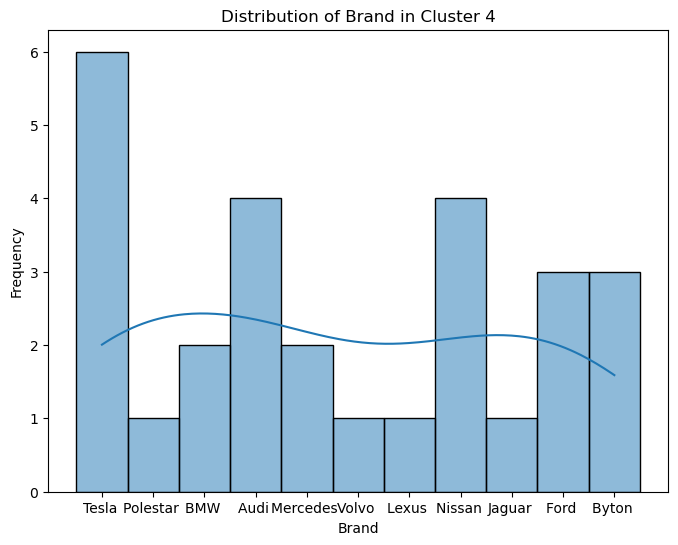

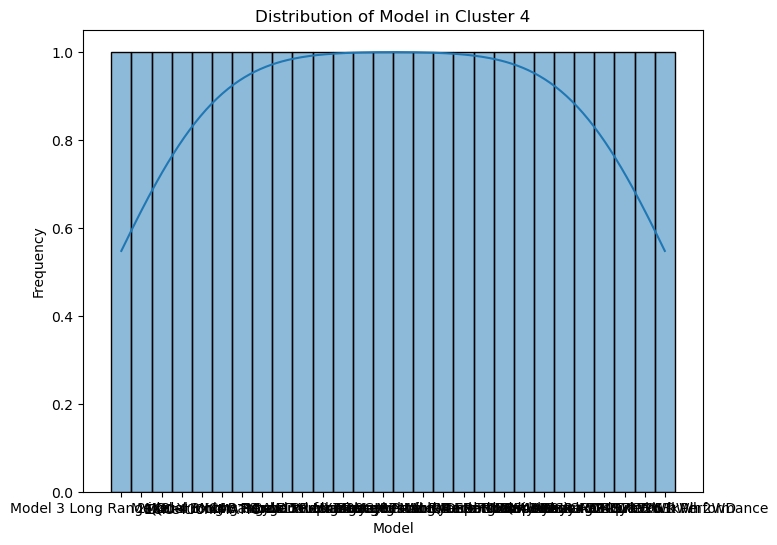

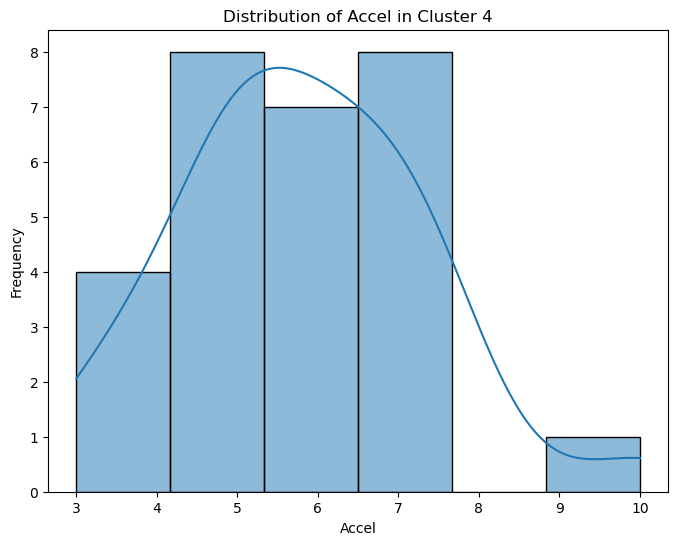

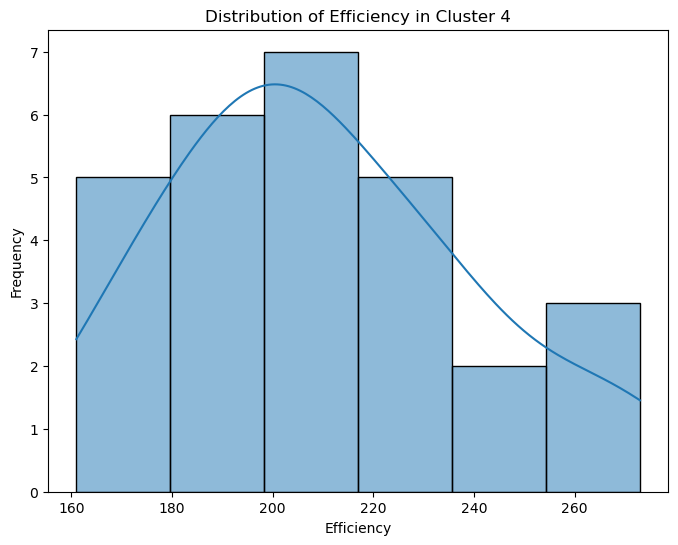

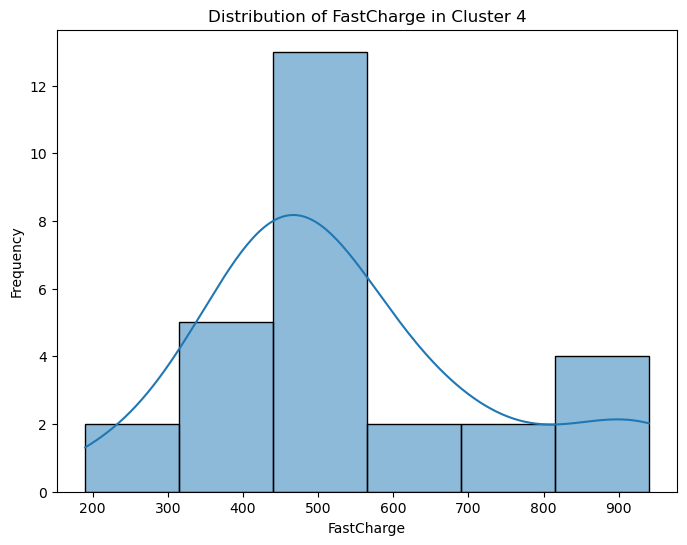

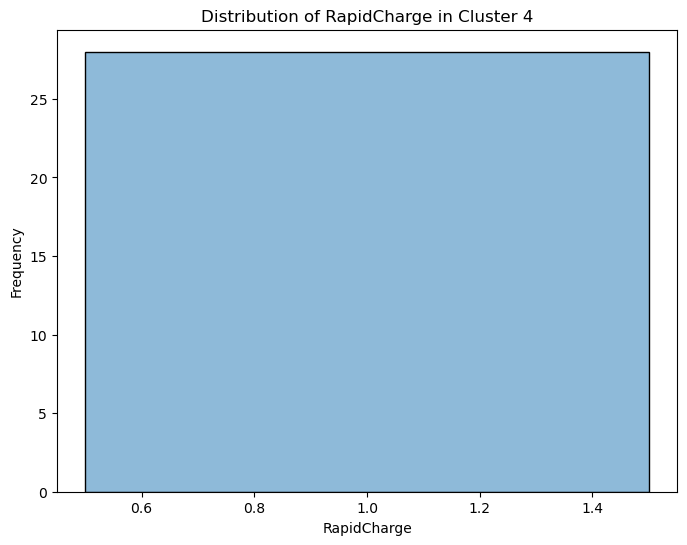

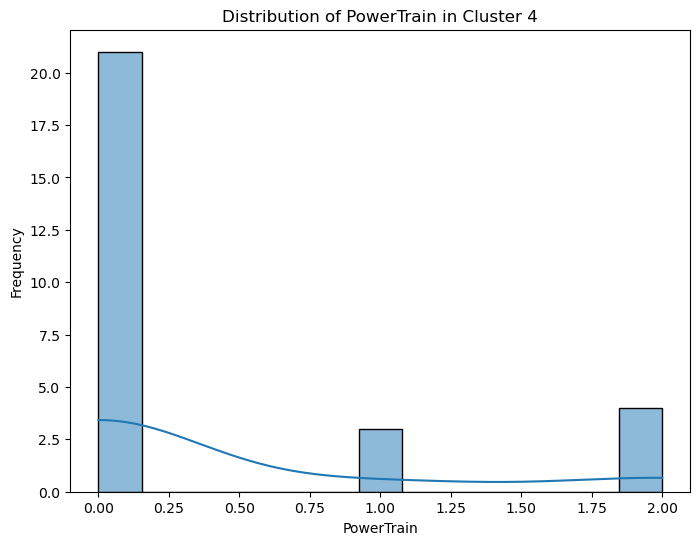

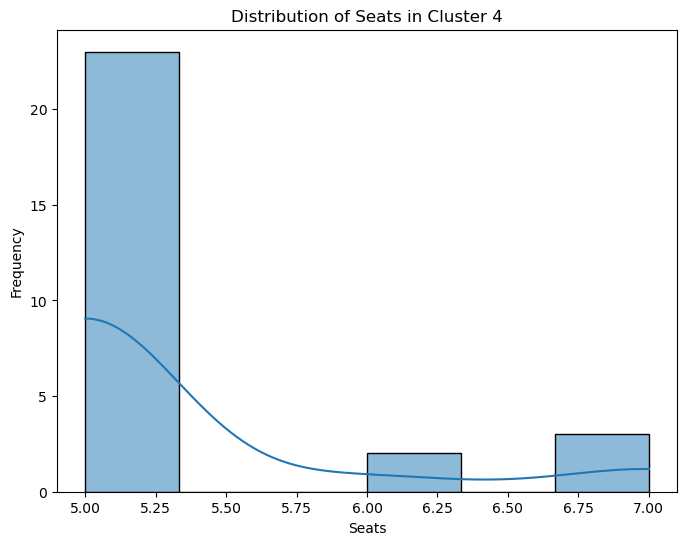

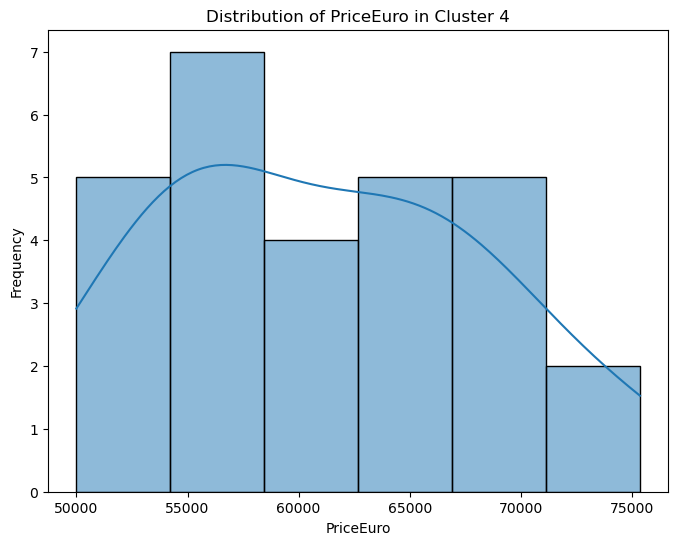

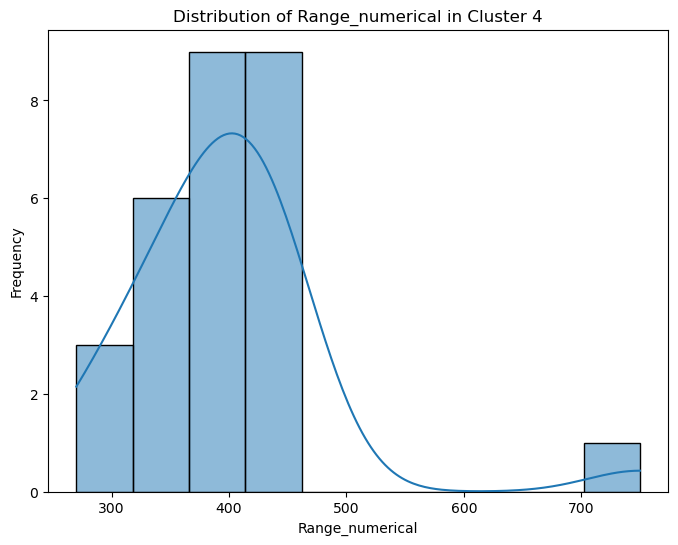

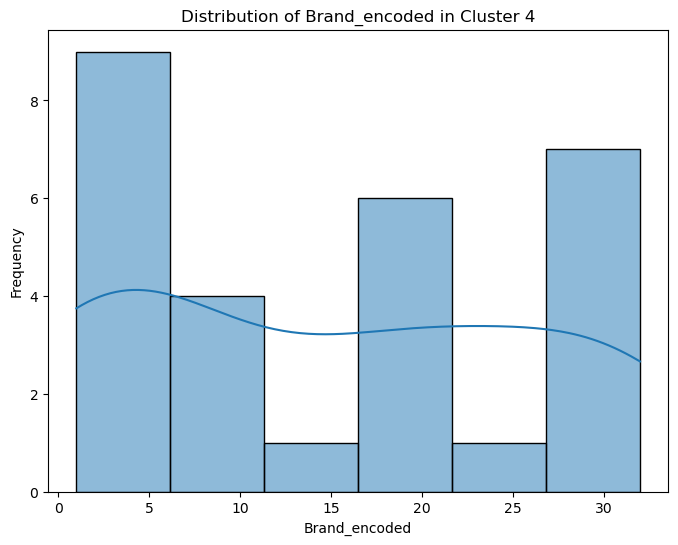

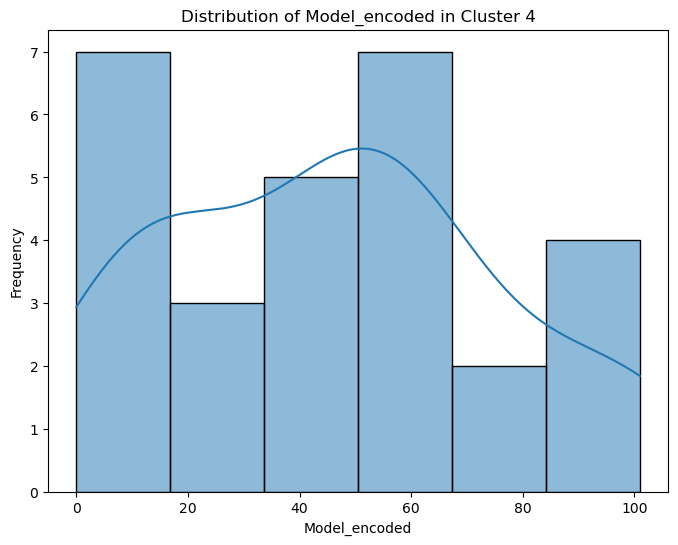

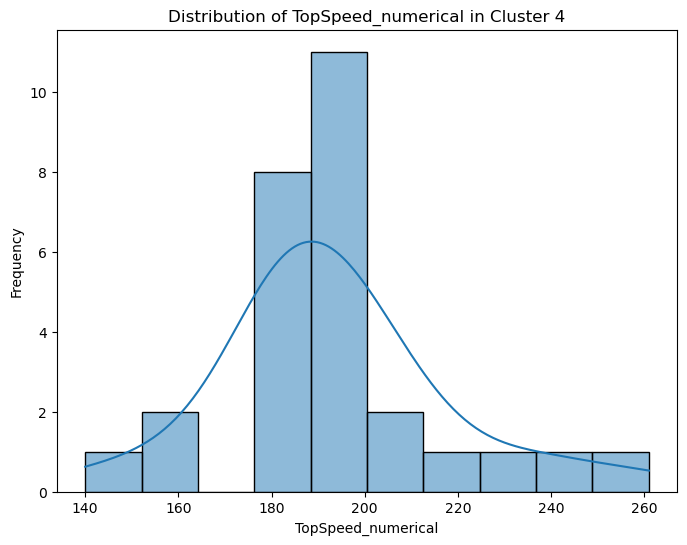

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


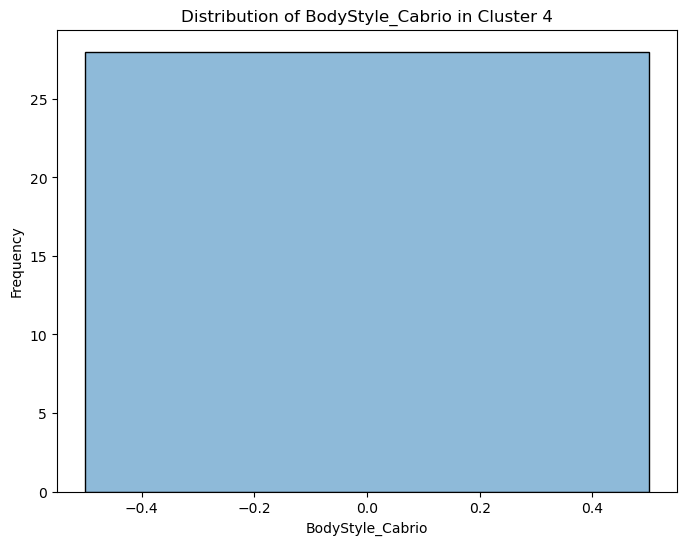

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


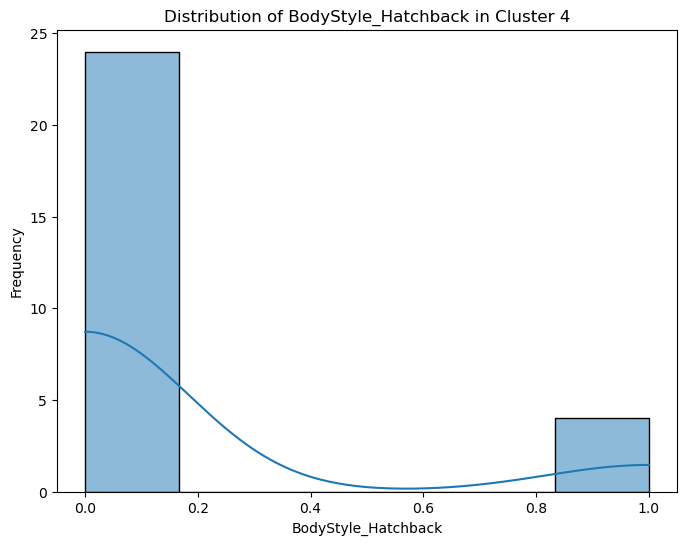

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


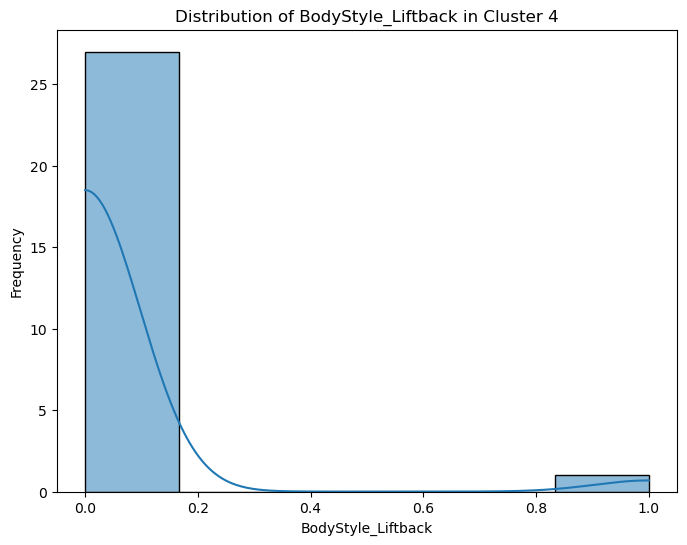

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


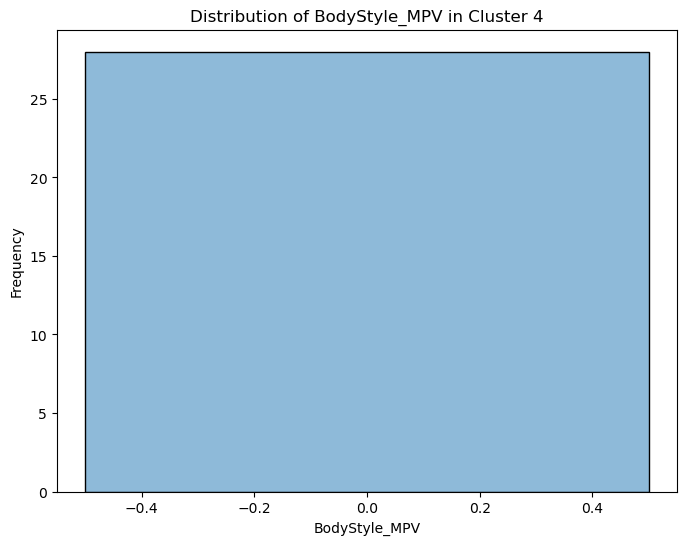

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


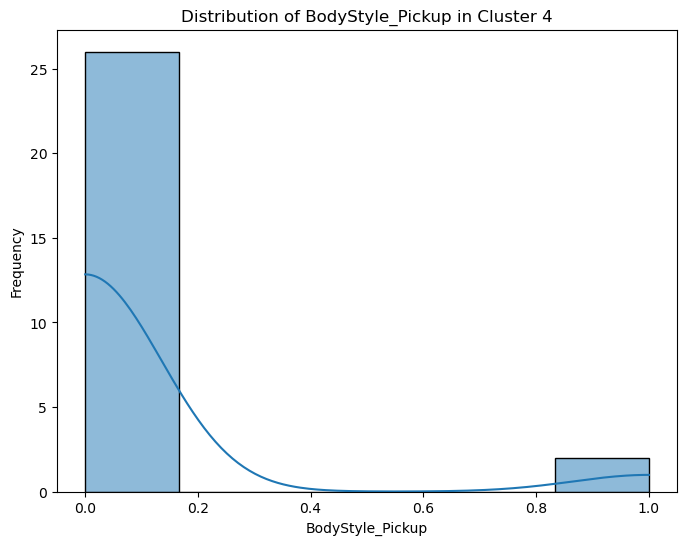

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


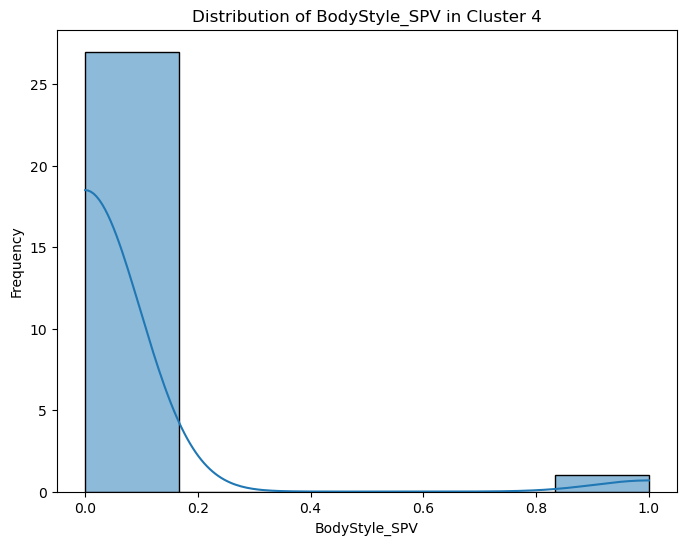

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


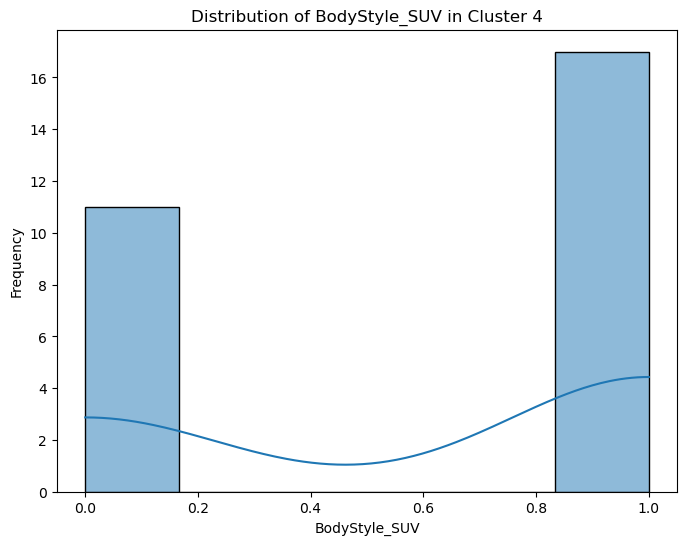

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


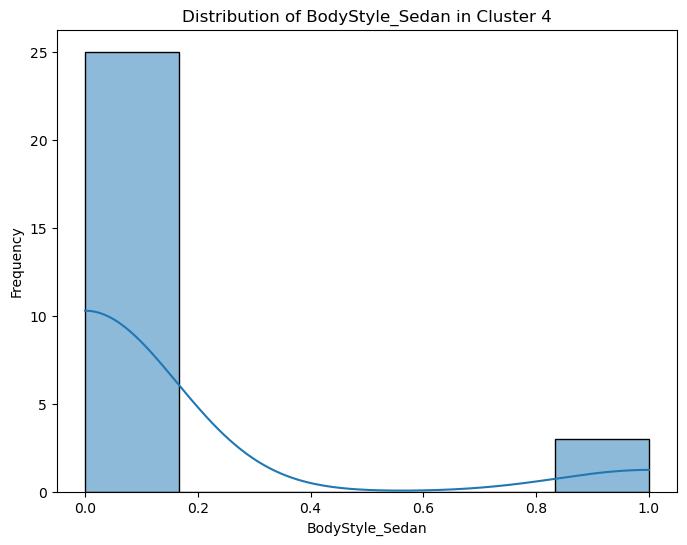

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


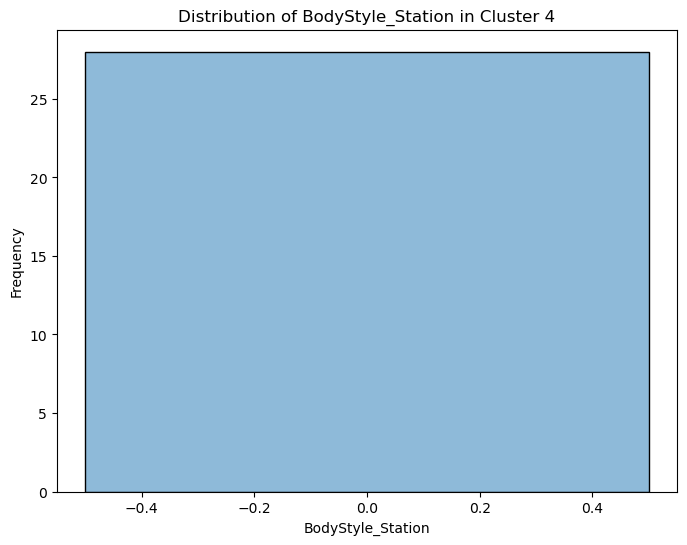

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


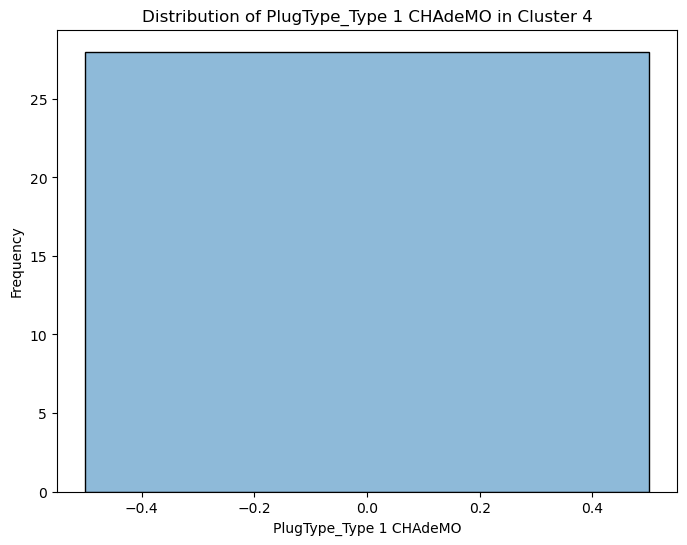

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


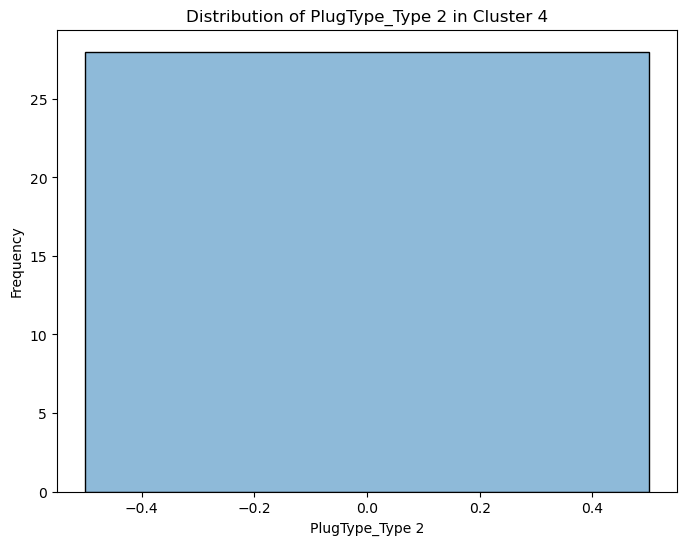

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


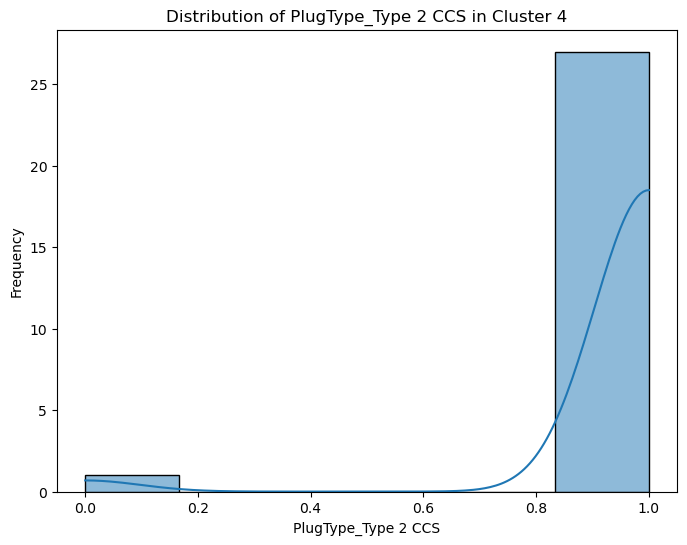

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


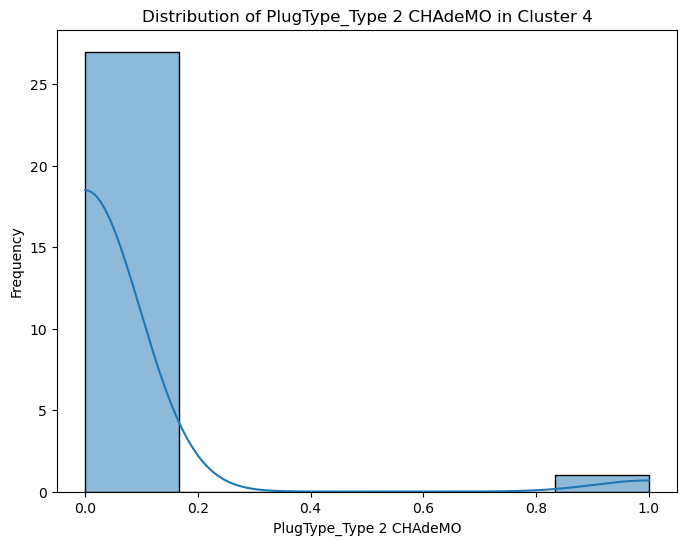

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


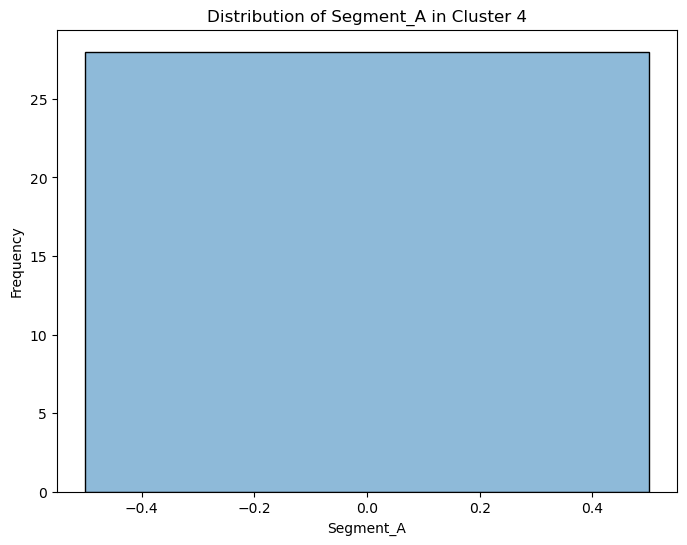

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


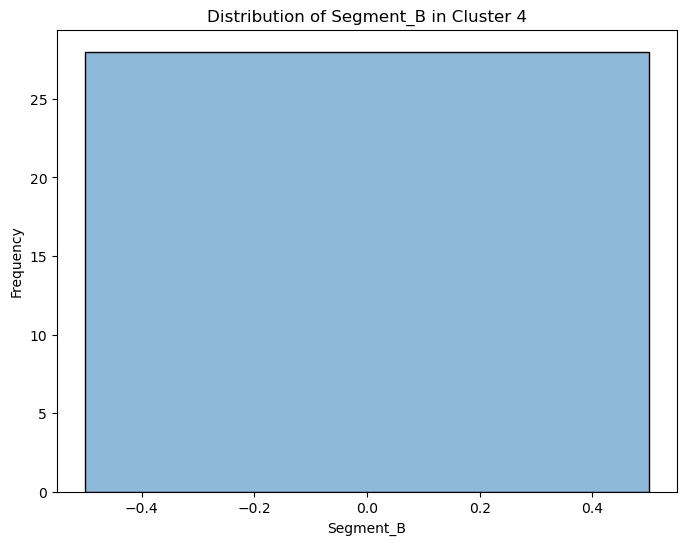

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


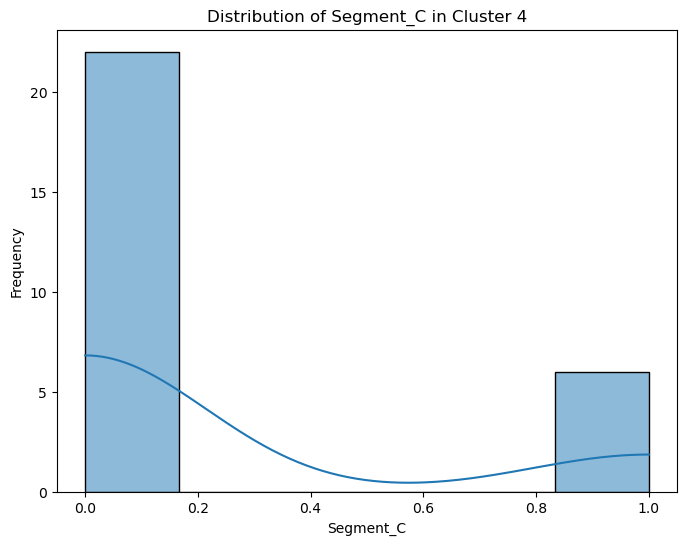

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


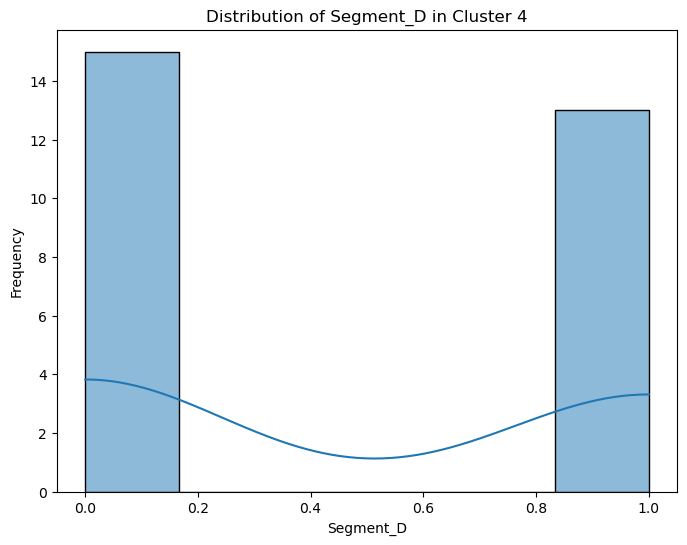

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


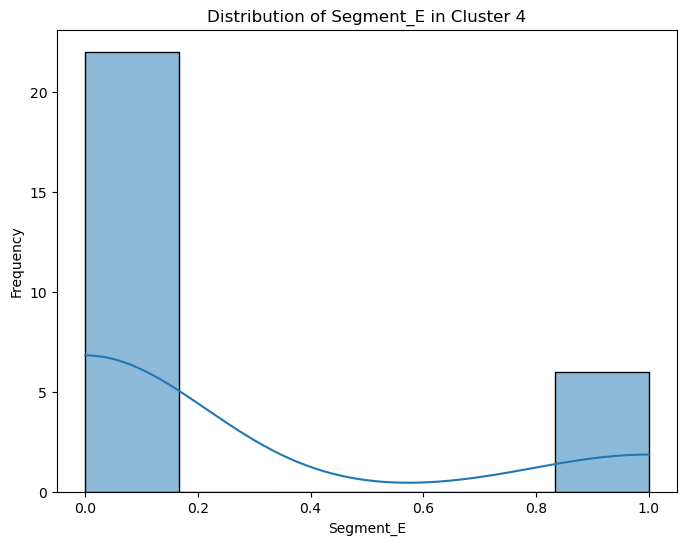

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


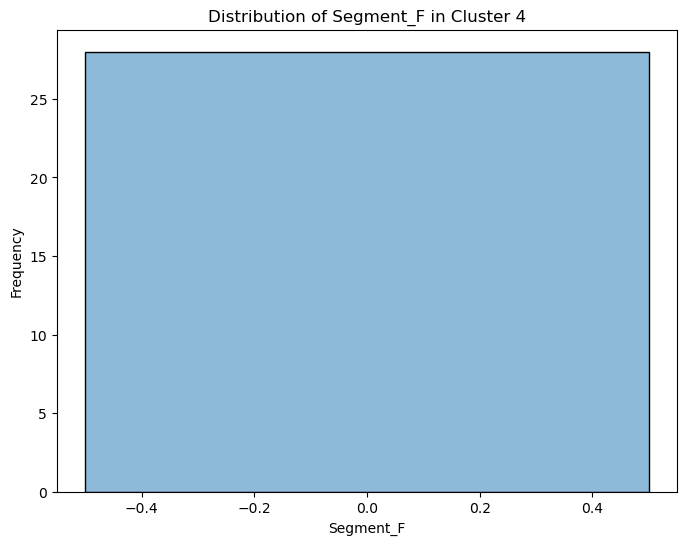

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


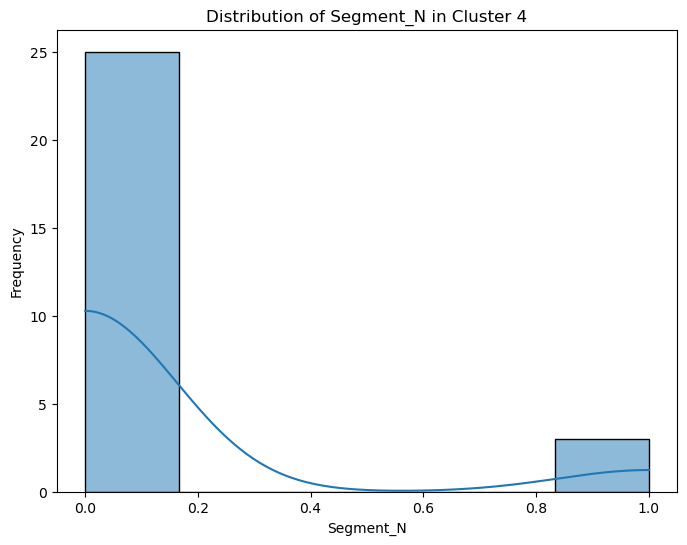

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


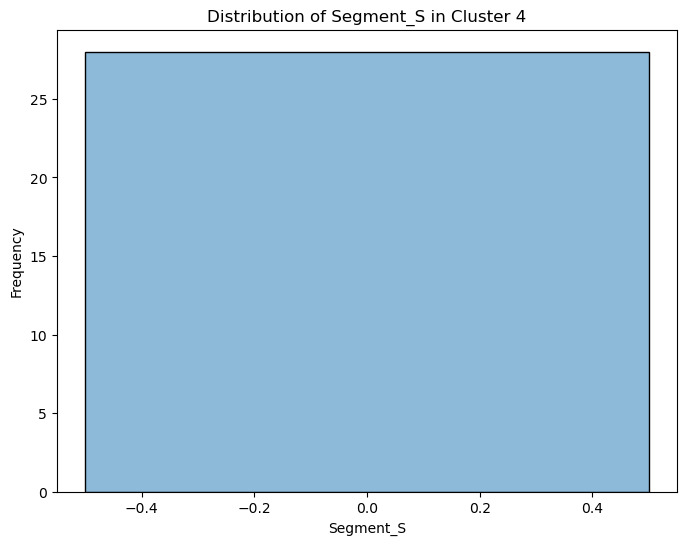

Cluster 5:
           Accel  Efficiency  FastCharge  RapidCharge  PowerTrain  Seats  \
count   4.000000    4.000000    4.000000          4.0         4.0   4.00   
mean    5.050000  183.250000  742.500000          1.0         0.0   4.25   
std     3.303029   53.593376  138.894444          0.0         0.0   0.50   
min     3.200000  104.000000  540.000000          1.0         0.0   4.00   
25%     3.425000  173.750000  712.500000          1.0         0.0   4.00   
50%     3.500000  206.000000  790.000000          1.0         0.0   4.00   
75%     5.125000  215.500000  820.000000          1.0         0.0   4.25   
max    10.000000  217.000000  850.000000          1.0         0.0   5.00   

          PriceEuro  Range_numerical  Brand_encoded  Model_encoded  \
count       4.00000          4.00000       4.000000       4.000000   
mean   143075.25000        443.75000      15.750000      71.750000   
std     12070.32105         89.29119      10.904892      13.961256   
min    125000.00000     

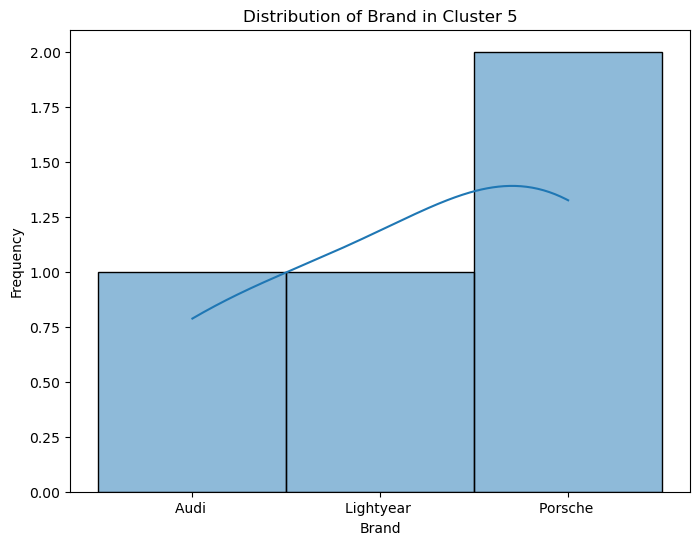

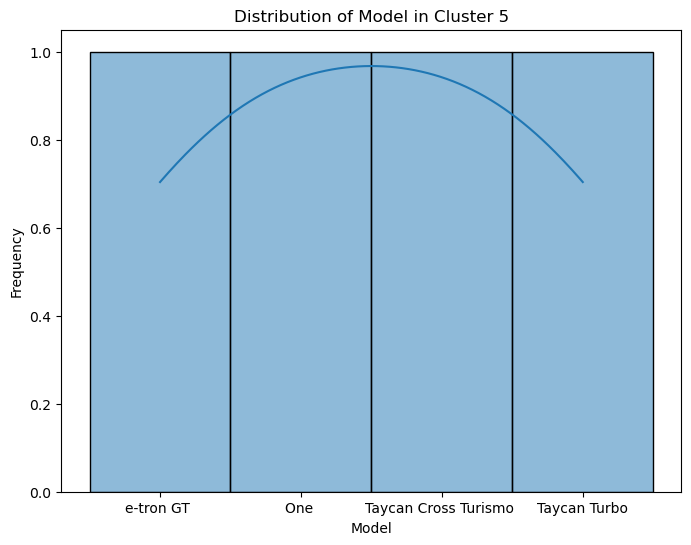

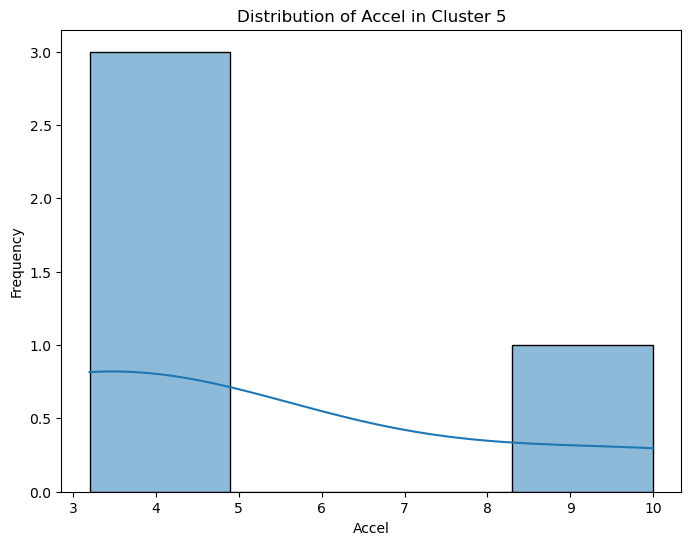

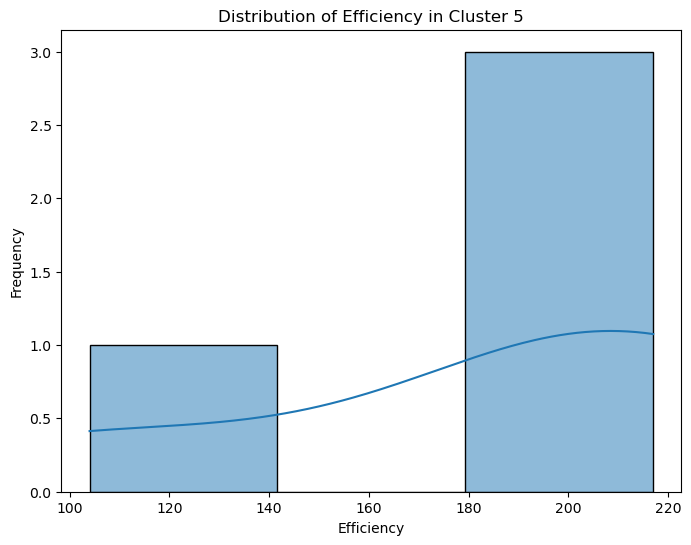

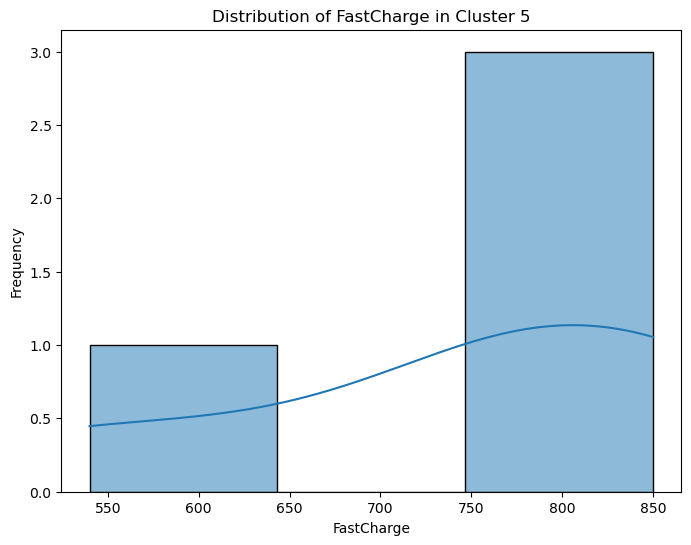

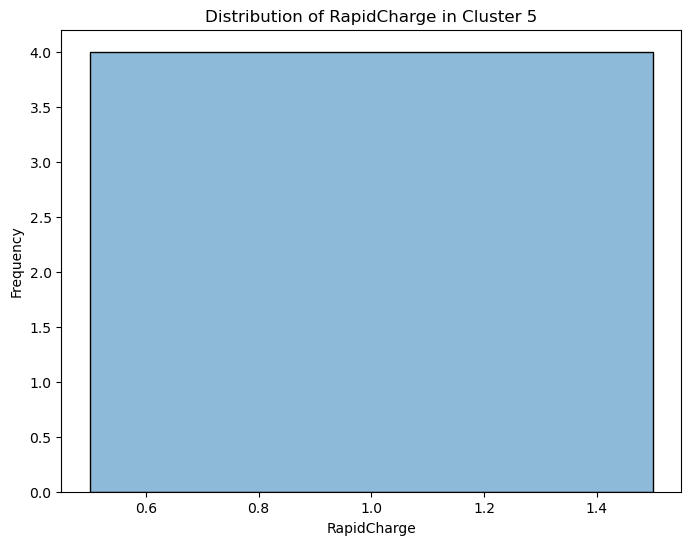

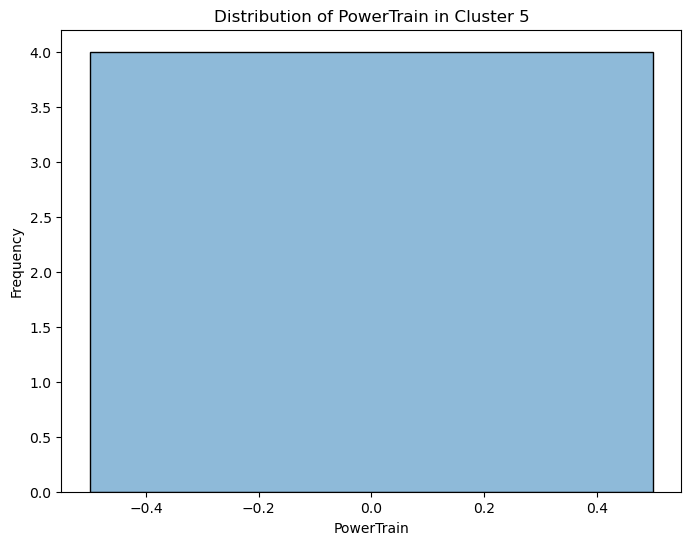

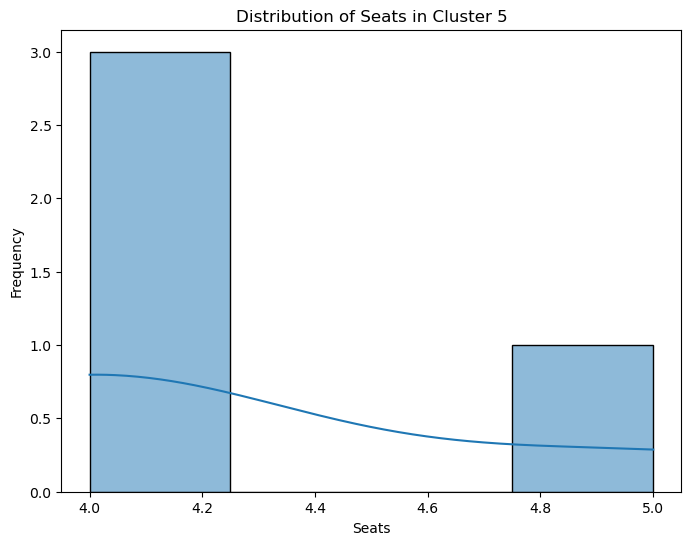

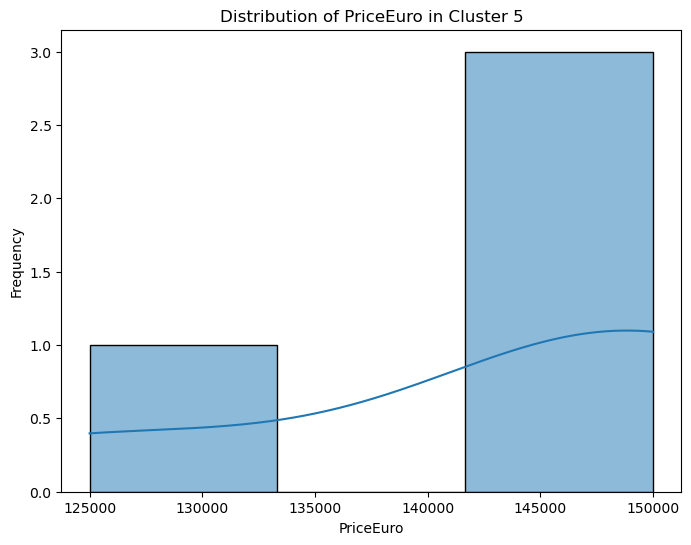

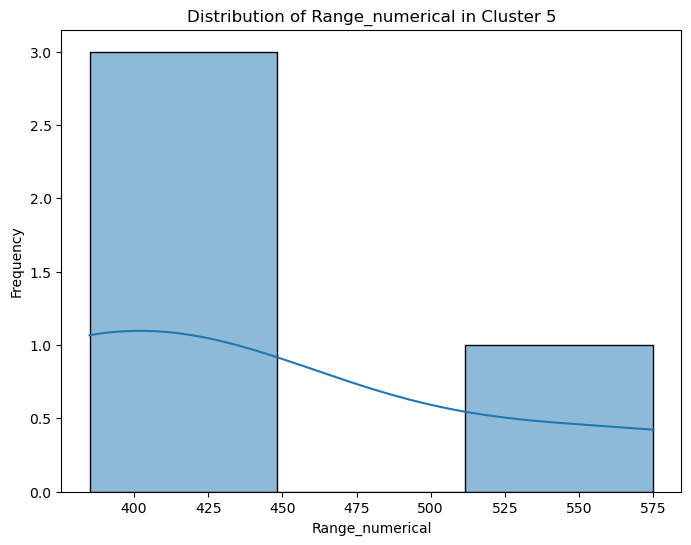

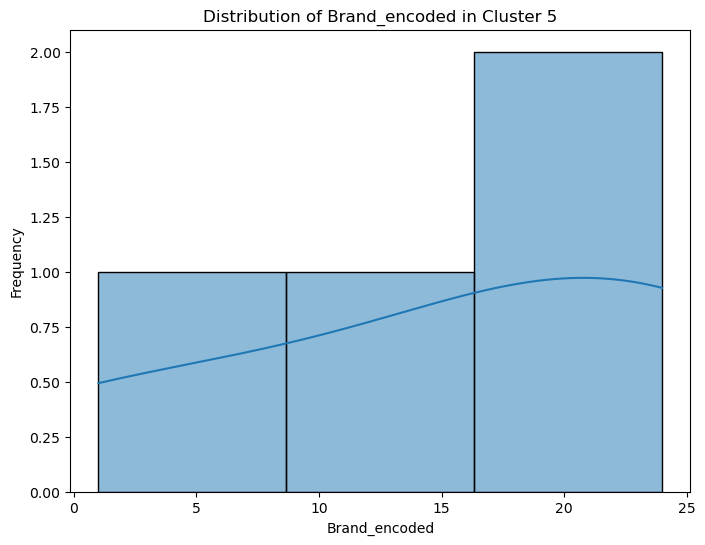

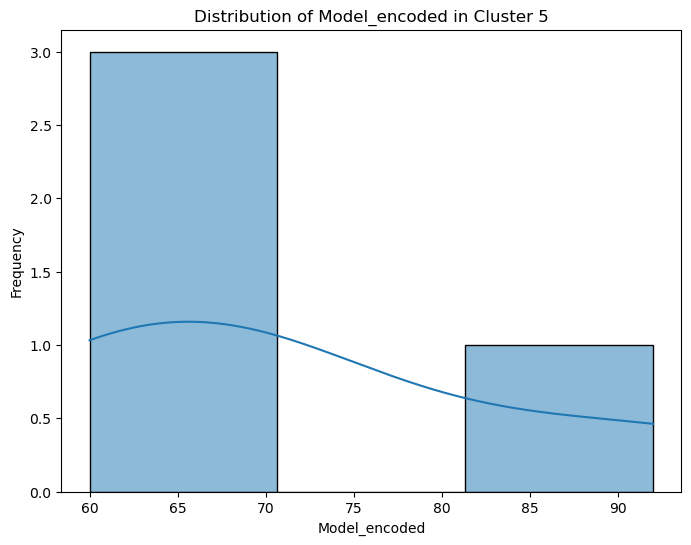

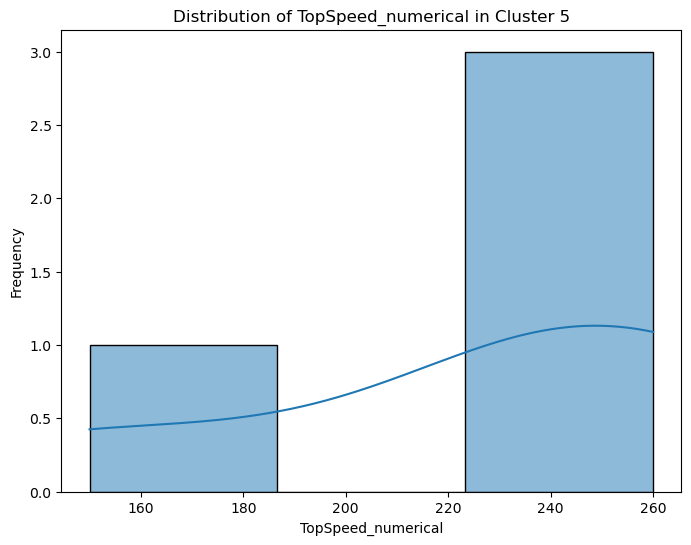

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


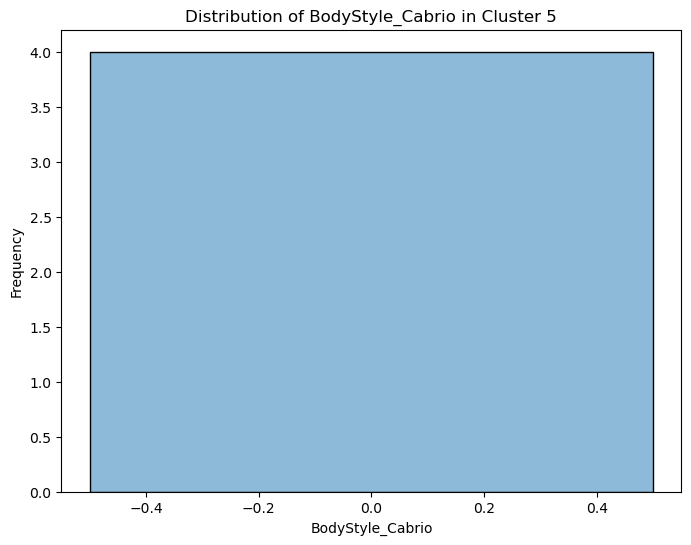

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


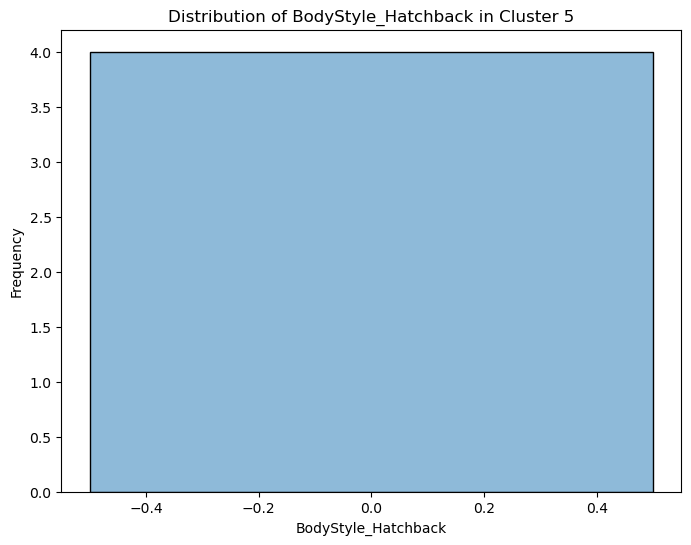

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


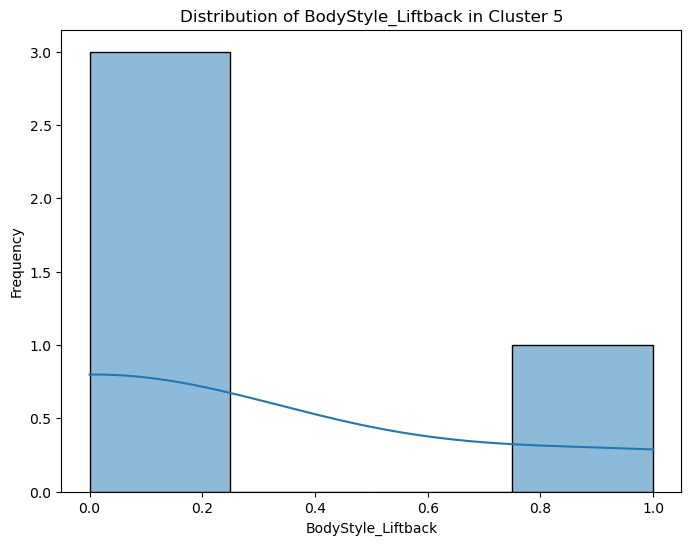

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


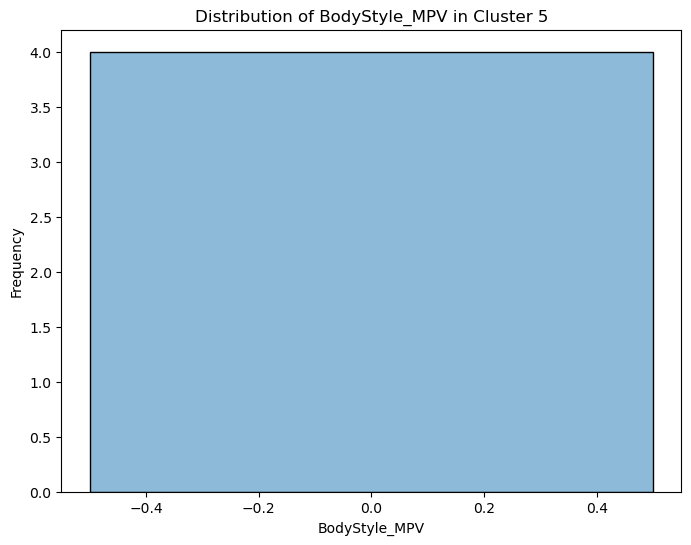

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


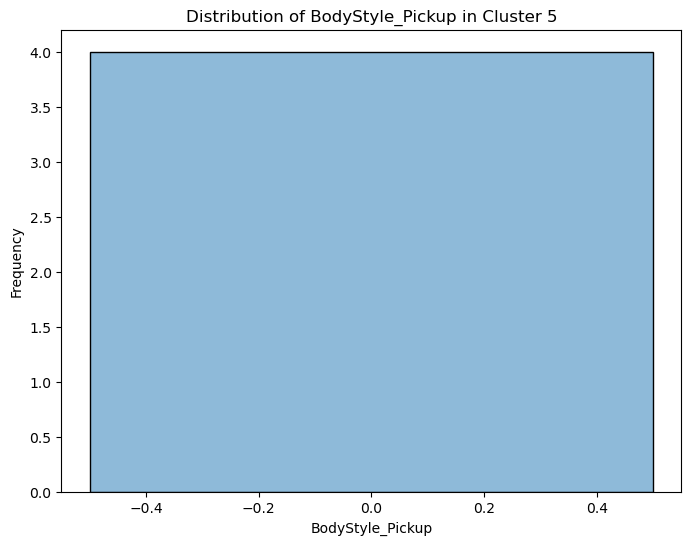

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


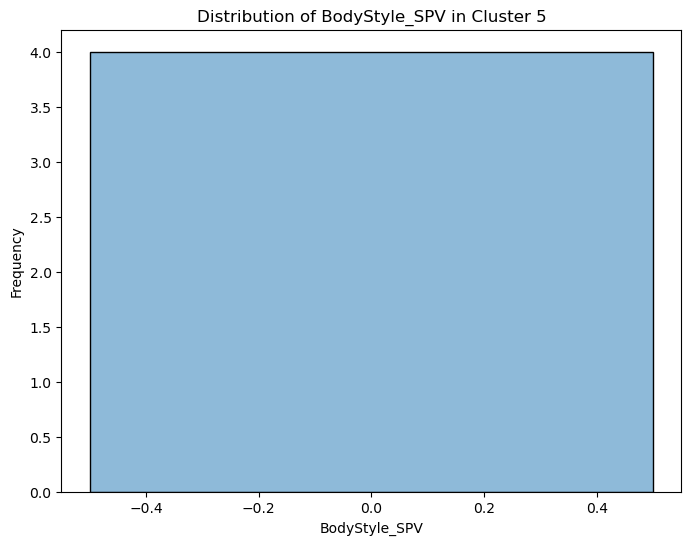

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


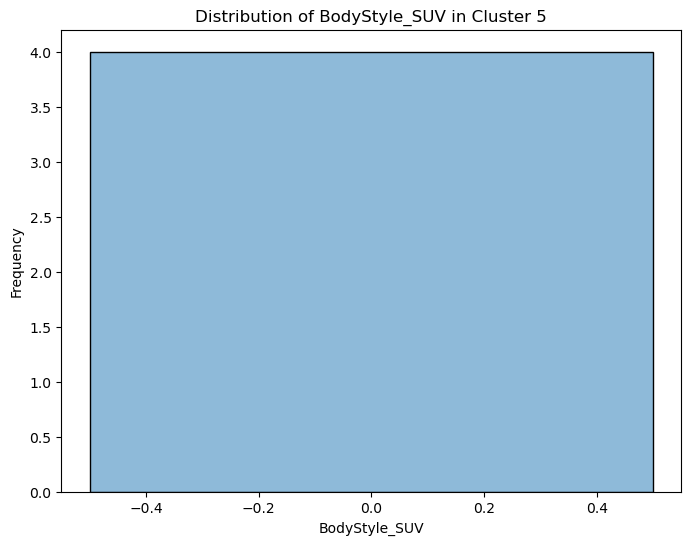

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


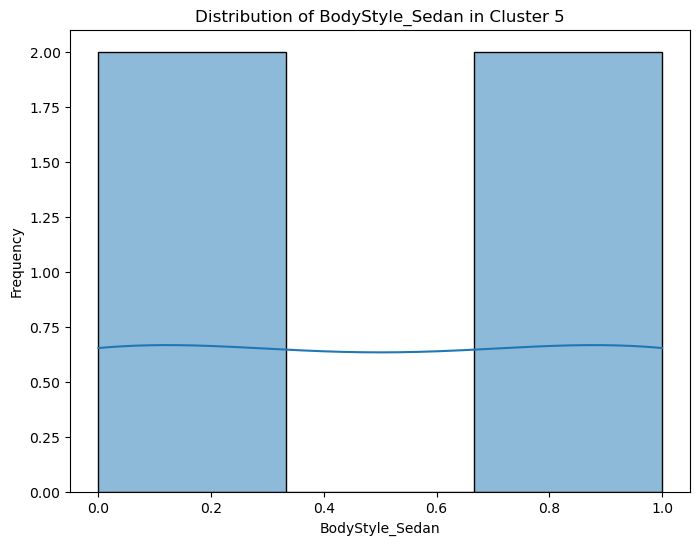

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


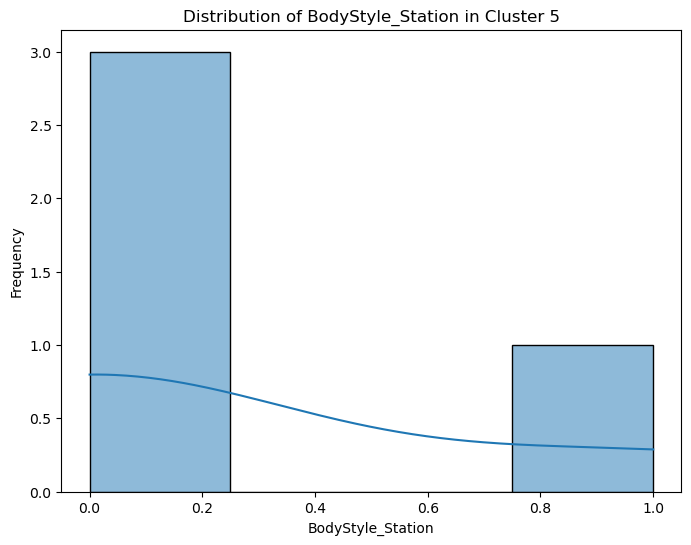

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


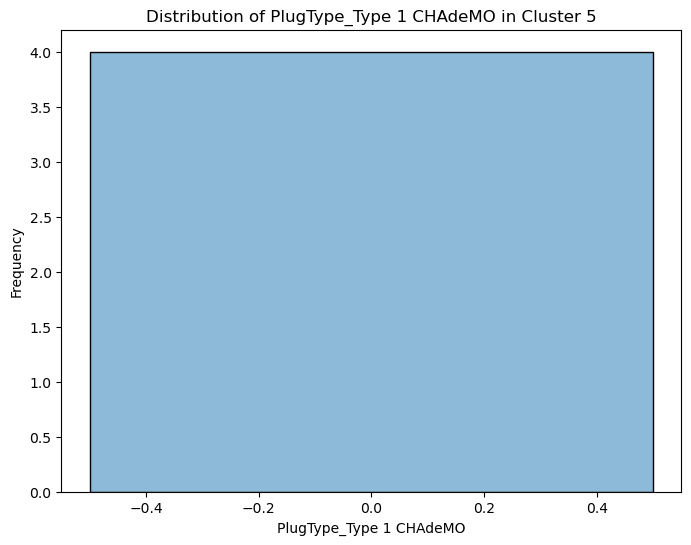

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


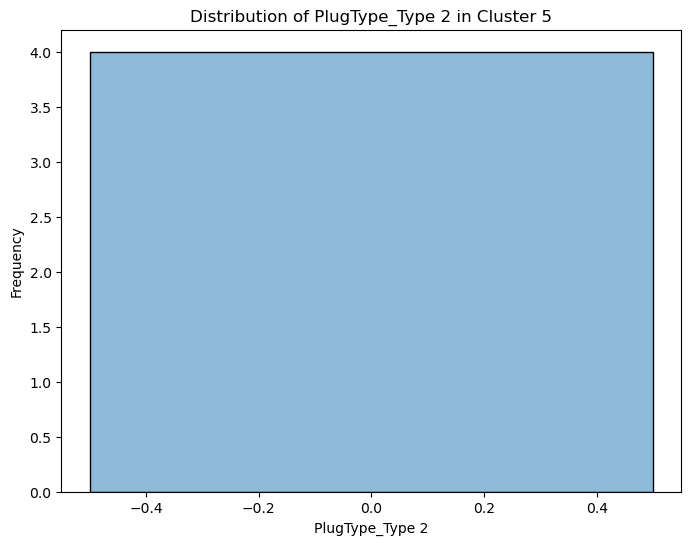

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


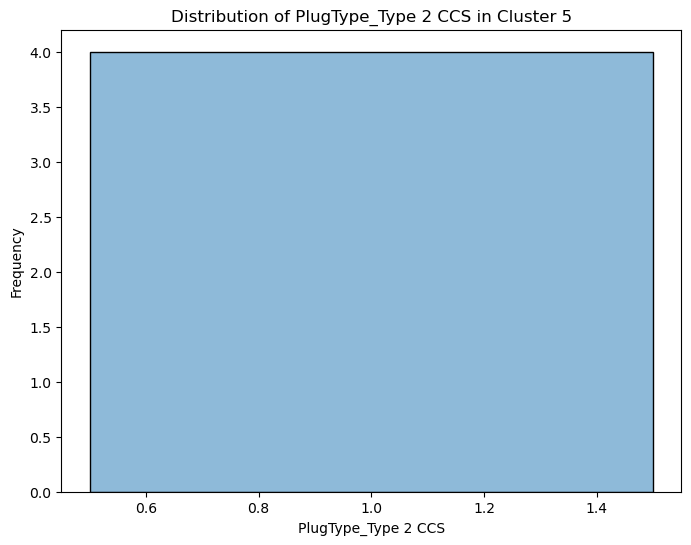

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


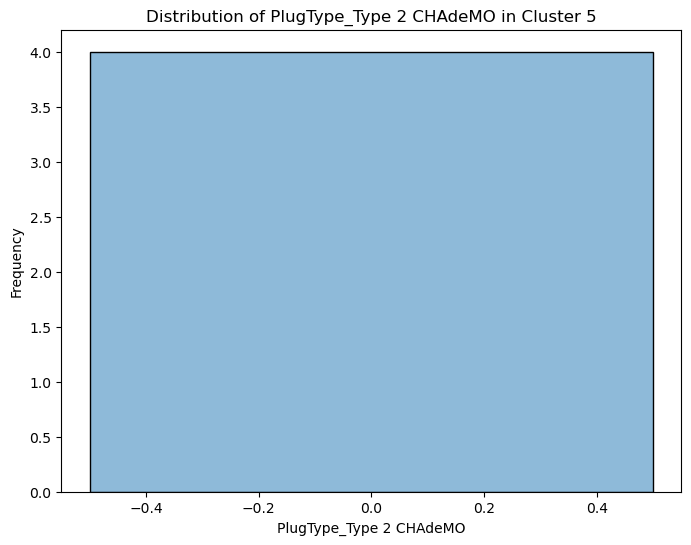

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


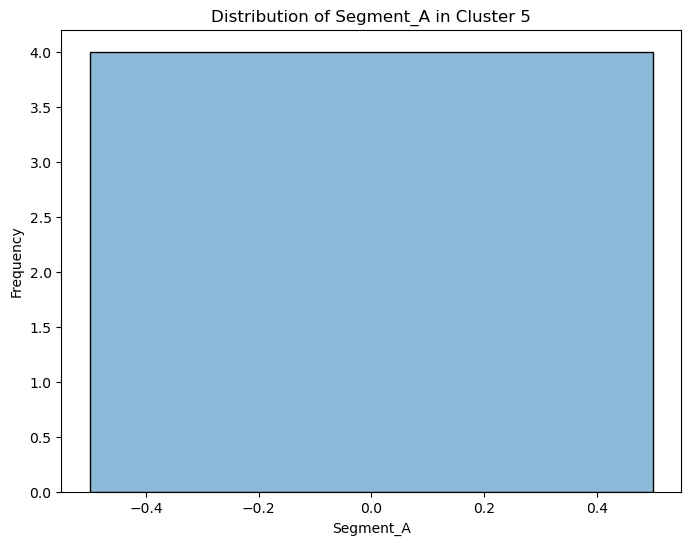

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


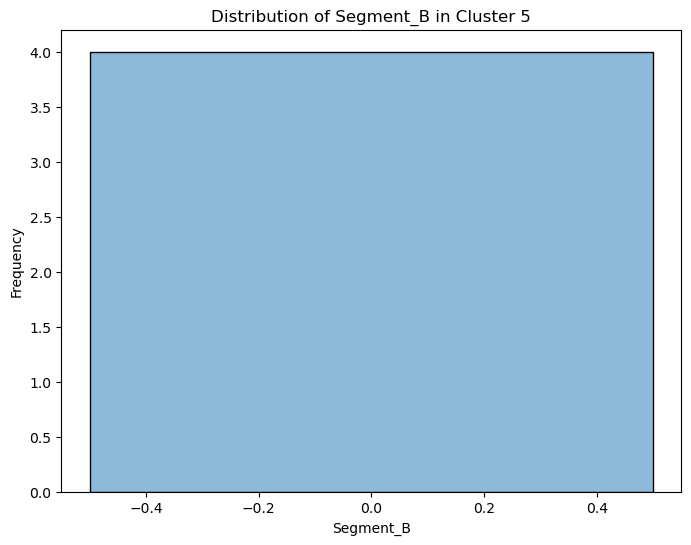

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


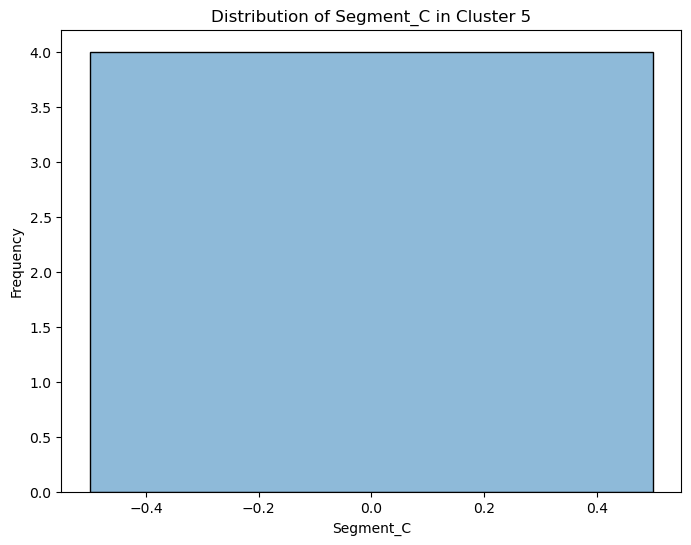

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


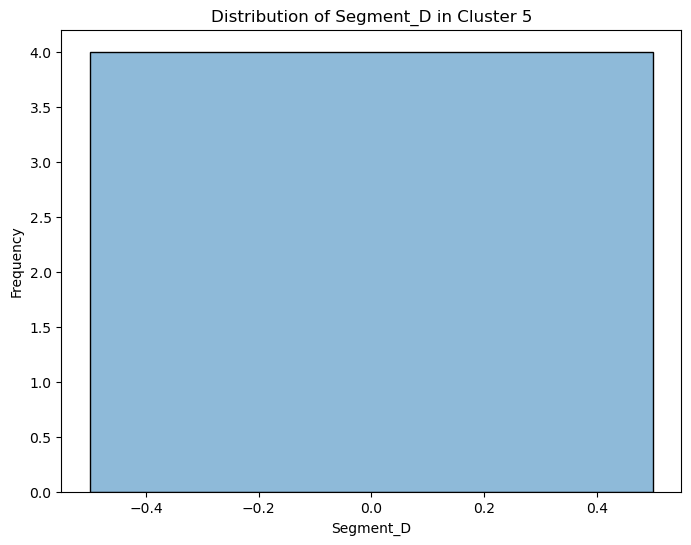

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


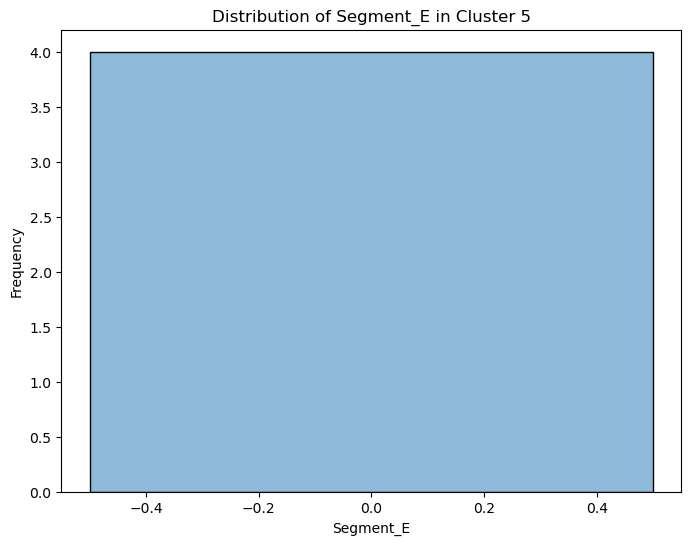

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


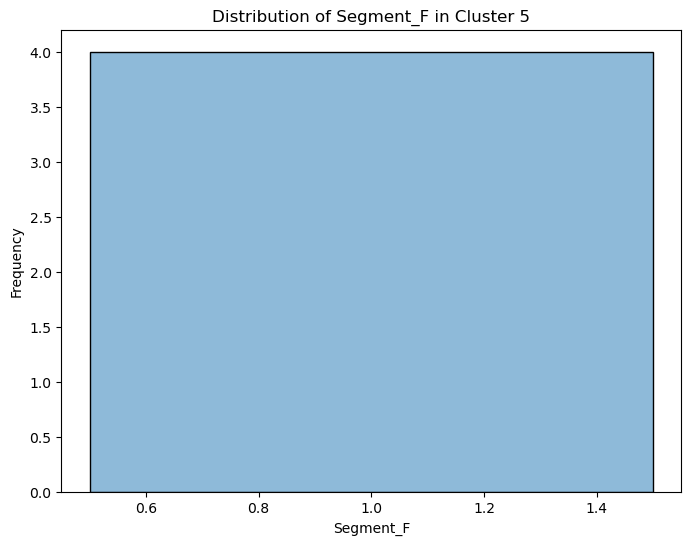

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


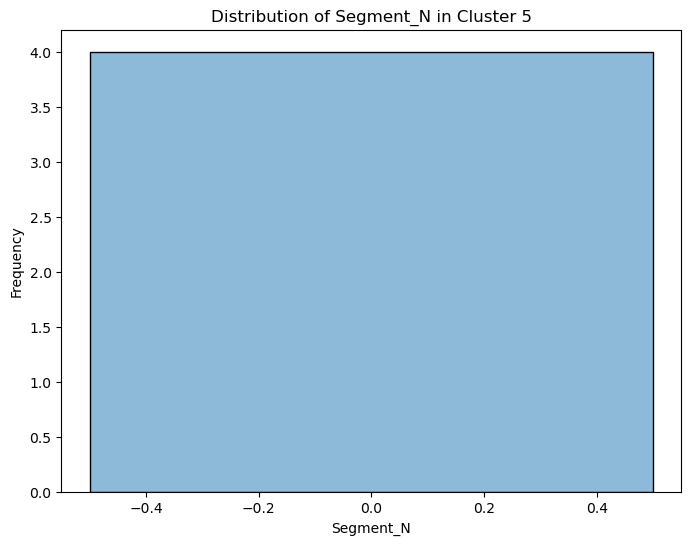

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


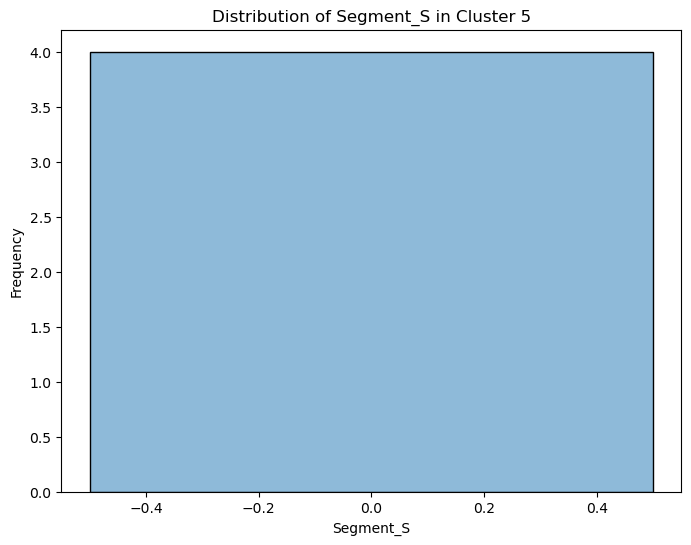

In [142]:
import pandas as pd

# Calculate cluster centroids
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

# Add cluster labels to the centroids
cluster_centroids['Cluster'] = range(1, num_clusters + 1)

# Merge cluster labels with original data
ev_features_df['Cluster'] = cluster_labels + 1  # Adding 1 to labels to match cluster numbers

# Iterate over each cluster
for cluster_num in range(1, num_clusters + 1):
    print(f"Cluster {cluster_num}:")
    cluster_data = ev_features_df[ev_features_df['Cluster'] == cluster_num]
    
    # Calculate descriptive statistics for each feature
    cluster_profile = cluster_data.describe()
    print(cluster_profile)
    
    # Visualize feature distributions
    for column in cluster_data.columns:
        if column != 'Cluster':
            plt.figure(figsize=(8, 6))
            sns.histplot(data=cluster_data, x=column, kde=True)
            plt.title(f'Distribution of {column} in Cluster {cluster_num}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
